# Lecture 13, Algebraic Modeling Languages

Algebraic Modeling Languages (AML) are high-level computer programming languages for describing and solving high complexity problems for large scale mathematical computation (i.e. large scale optimization type problems).  Their syntax mimics the mathematical notation of optimization problems, which allows one to express optimization problems in a familiar, concise and readable way. 

**AMLs do not directly solve the problem, but they call appropriate external solvers to find the solution.**

Examples of AMLs are
* <a href="http://ampl.com/">A Mathematical Programming Language (AMPL)</a>,
* <a href="https://www.gams.com/">General Algebraic Modeling System (GAMS)</a>,


* <a href="https://www.ibm.com/support/knowledgecenter/SSSA5P_12.5.0/ilog.odms.ide.help/OPL_Studio/maps/groupings/opl_Language.html">Optimization Programming Language (OPL)</a>,
* <a href="https://aimms.com/english/developers/resources/manuals/optimization-modeling/">Advanced Interactive Multidimensional Modeling System (AIMMS)</a>,
* <a href="https://developers.google.com/optimization/">Google OR-Tools</a>,
* <a href="http://www.pyomo.org/">Pyomo</a>, and
* <a href="http://www.pyopt.org/">pyOpt</a>.

In addition to the ease of modelling, one of the advantages of AMLs is that you can model the problem once and then solve it with multiple solvers.

## Pyomo

On this course, we use Pyomo as an example of AMLs. Pyomo is a Python-based, open-source optimization modeling language with a diverse set of optimization capabilities.

Pyomo may not be a completely typical AML, because Pyomo's modeling objects are embedded within a full-featured high-level programming language providing a rich set of supporting libraries, which distinguishes Pyomo from other AMLs.

Pyomo supports a wide range of problem types, including:
* Linear programming
* Quadratic programming
* Nonlinear programming
* Mixed-integer linear programming
* Mixed-integer quadratic programming
* Mixed-integer nonlinear programming
* Stochastic programming
* Generalized disjunctive programming
* Differential algebraic equations
* Bilevel programming
* Mathematical programs with equilibrium constraints

# Installing Pyomo

The easiest way to install Pyomo is to call
```
pip install pyomo
```
when pip has been installed on your machine.

## Example 1, linear optimization

Let us start with a very simple linear problem
$$
\begin{align}
\min &\qquad   2x_1+3x_2\\
\text{s.t. }& \qquad 3x_1+4x_2\geq 1\\
& \qquad x_1,x_2\geq 0.
\end{align}
$$

In [14]:
from pyomo.environ import *


model = ConcreteModel()

model.x = Var([1,2], domain=NonNegativeReals) #Non-negative variables x[1] and x[2]

model.OBJ = Objective(expr = 2*model.x[1] + 3*model.x[2]) #Objective function

model.Constraint1 = Constraint(expr = 3*model.x[1] + 4*model.x[2] >= 1) #Constraint

type(model)

pyomo.core.base.PyomoModel.ConcreteModel

Once we have defined the problem, we can solve it. Let us start by using glpk, which is an open source linear programming program.

You need to have glpk installed on your system. For details, see https://www.gnu.org/software/glpk/#TOCdownloading. For many Linux distributions, you can install glpk from the repositories by typing
```
sudo yum install glpk
```
```
sudo apt-get install glpk,
```
or whatever your distribution needs.


In [15]:
from pyomo.opt import SolverFactory #Import interfaces to solvers
opt = SolverFactory("glpk") #Use glpk
res = opt.solve(model, tee=True) #Solve the  problem and print the output
print("Solution:")
print("=========")
model.x.display() #Print values of x

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\jhaka\AppData\Local\Temp\tmpd4lqkmkh.glpk.raw --wglp C:\Users\jhaka\AppData\Local\Temp\tmpv_r0dksn.glpk.glp
 --cpxlp C:\Users\jhaka\AppData\Local\Temp\tmpifiy738i.pyomo.lp
Reading problem data from 'C:\Users\jhaka\AppData\Local\Temp\tmpifiy738i.pyomo.lp'...
2 rows, 3 columns, 3 non-zeros
21 lines were read
Writing problem data to 'C:\Users\jhaka\AppData\Local\Temp\tmpv_r0dksn.glpk.glp'...
15 lines were written
GLPK Simplex Optimizer, v4.65
2 rows, 3 columns, 3 non-zeros
Preprocessing...
1 row, 2 columns, 2 non-zeros
Scaling...
 A: min|aij| =  3.000e+00  max|aij| =  4.000e+00  ratio =  1.333e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 1
      0: obj =   0.000000000e+00 inf =   1.000e+00 (1)
      1: obj =   7.500000000e-01 inf =   0.000e+00 (0)
*     2: obj =   6.666666667e-01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0

Now, if you have other linear solvers installed on your system, you can use them too. Let us use <a href="http://www-03.ibm.com/software/products/en/ibmilogcpleoptistud">Cplex</a>, which is a commercial solver (academic license available).

In [16]:
opt = SolverFactory("cplex")
res = opt.solve(model, tee=True)
print("Solution:")
model.x.display()


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer Community Edition 12.9.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2019.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jhaka\AppData\Local\Temp\tmp1yhxt6hg.cplex.log' open.
CPLEX> Problem 'C:\Users\jhaka\AppData\Local\Temp\tmpd1gj21ss.pyomo.lp' read.
Read time = 0.00 sec. (0.00 ticks)
CPLEX> Problem name         : C:\Users\jhaka\AppData\Local\Temp\tmpd1gj21ss.pyomo.lp
Objective sense      : Minimize
Variables            :       3
Objective nonzeros   :       2
Linear constraints   :       2  [Greater: 1,  Equal: 1]
  Nonzeros           :       3
  RHS nonzeros       :       2

Variables            : Min LB: 0.0000000        Max UB: all infinite   
Objective nonzeros   : Min   : 2.000

We can use also <a href="http://www.gurobi.com/">gurobi</a>, which is another commercial solver with academic license.

In [17]:
opt = SolverFactory("gurobi")
res = opt.solve(model, tee=True)
print("Solution:")
model.x.display()

Using license file c:\MyTemp\local\opt\gurobi901\gurobi.lic
Academic license - for non-commercial use only
Read LP format model from file C:\Users\jhaka\AppData\Local\Temp\tmpbu8z1kdb.pyomo.lp
Reading time = 0.00 seconds
x3: 2 rows, 3 columns, 3 nonzeros
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 2 rows, 3 columns and 3 nonzeros
Model fingerprint: 0x6bb7e864
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  6.666666667e-01
Solution:
x : Size=2, Index=x_index
    Key : Lower : Value              : Upper : Fixed : Stale : Domain
      1 :     0 : 0.3333333333333333 

## Example 2, nonlinear optimization

Let use define optimization problem
$$
\begin{align}
\max &\qquad c_b\\
\text{s.t. }& \qquad c_{af}s_v - s_vc_a-k_1c_a=0\\
&\qquad s_vc_b+k_1c_a-k_2c_b-2k_3c_a^2=0\\
&\qquad s_vc_c+k_2c_b=0\\
&\qquad s_vc_d+k_3c_a^2=0,\\
&\qquad s_v,c_a,c_b,c_c,c_d\geq0
\end{align}
$$
where $k_1=5/6$, $k_2=5/3$, $k_3=1/6000$, and $c_{af}=10000$.

In [4]:
from pyomo.environ import *
# create the concrete model
model = ConcreteModel()
# set the data 
k1 = 5.0/6.0 
k2 = 5.0/3.0 
k3 = 1.0/6000.0 
caf = 10000.0 
# create the variables
model.sv = Var(initialize = 1.0, within=PositiveReals)
model.ca = Var(initialize = 5000.0, within=PositiveReals)
model.cb = Var(initialize = 2000.0, within=PositiveReals)
model.cc = Var(initialize = 2000.0, within=PositiveReals)
model.cd = Var(initialize = 1000.0, within=PositiveReals)

# create the objective
model.obj = Objective(expr = model.cb, sense=maximize)
# create the constraints
model.ca_bal = Constraint(expr = (0 == model.sv * caf \
    - model.sv * model.ca - k1 * model.ca \
    - 2.0 * k3 * model.ca ** 2.0))
model.cb_bal = Constraint(expr=(0 == -model.sv * model.cb \
    + k1 * model.ca - k2 * model.cb))
model.cc_bal = Constraint(expr=(0 == -model.sv * model.cc \
    + k2 * model.cb))
model.cd_bal = Constraint(expr=(0 == -model.sv * model.cd \
    + k3 * model.ca ** 2.0))

## Solving with Baron
Install Baron following https://www.minlp.com/baron-downloads. *Note that Baron does not have a free academic license but only a free demo license that has limitations to the problem size that can be solved.*

In [9]:
opt = SolverFactory("baron",solver_io="nl")

opt.solve(model,tee=True)

print("Solution is ")
sol_b = [model.sv.value,model.ca.value,model.cb.value,model.cc.value,model.cd.value]
print(sol_b)

 BARON version 19.12.7. Built: WIN-64 Sat Dec 7 15:08:51 EST 2019 

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 No BARON license file found in user PATH.  Continuing in demo mode.
 Model size is allowable within BARON demo size.

 If you use this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: ILOG CPLEX                                      
 For NLP: IPOPT, FILTERSD, FILTERSQP
 Starting solution is feasible with a value of     1072.43720335     
 Doing local search
 Unable to find/load CPLEX library cplex12100.dll.
 Using CPLEX library cplex1290.dll.
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration    Open nodes  

## Solving with <a href="https://github.com/coin-or/Ipopt">Ipopt</a>

Install IPopt following https://coin-or.github.io/Ipopt/INSTALL.html.

In [10]:
opt = SolverFactory("ipopt",solver_io="nl")

opt.solve(model,tee=True)

print("Solution is ")
sol_i = [model.sv.value,model.ca.value,model.cb.value,model.cc.value,model.cd.value]
print(sol_i)

Ipopt 3.13.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.1, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:       11
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        5

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        4
Total number of ineq

In [12]:
print(sol_b)
print(sol_i)

[1.3438117605985365, 3874.2588666784955, 1072.4372033508296, 1330.0935338790075, 1861.605199763074]
[1.34381176106728, 3874.25886723171, 1072.43720010863, 1330.09353340888, 1861.60519962539]


# Black-box optimization using scipy.optimize

Often cases, you do not have algebraic formulations of the objective functions, but instead, you have an executable, which gives you the values and you do not know what is happening inside there.

### Example

Executable 'prob4' (which you need to compile before using) includes a script for two variable problem with three inequality constraints (where two of them involve only one variable). The problem is of the form
$$
\min \  f(x)
\\ \text{s.t. }g(x) \leq 2
\\          x\geq 0.
$$
The executable reads in a file 'input.txt', which contains variable values of $x_1$ and $x_2$ on top of each other and outputs a file "output.txt", which contains on top of each other value of f, value of g, gradient of f and gradient of the contraints.

Let us solve this problem using *scipy.optimize*


In [20]:
import csv
def evaluate_prob4(x):
    with open('input.txt','w') as f:
        f.write('%f\n%f'%(x[0],x[1])) #Write x[0] and x[1] to the input.txt file    
    !.\prob4 #Execute prob4
    val = []
    with open('output.txt','r') as f: 
        valuereader = csv.reader(f)
        for row in valuereader:
            val.extend([float(i) for i in row])
    f_val = val[0]
    g_val = [0]*3
    g_val[0] = 2-val[1]
    g_val[1]=val[2]
    g_val[2]=val[3]
    grad_f=[val[4],val[5]]
    grad_g = [[0,0],[0,0],[0,0]]
    grad_g[0] = [-val[6],-val[7]]
    grad_g[1] = [val[8],val[9]]
    grad_g[2] = [val[10],val[11]]
    return f_val,g_val,grad_f,grad_g
        

In [21]:
# test the connection
import math
print(evaluate_prob4([2.,0.]))
print(evaluate_prob4([3.,1.]))

(3.0, [-2.0, 2.0, 0.0], [-6.0, 2.0], [[-4.0, -0.0], [1.0, 1.0], [1.0, 1.0]])
(5.0, [-8.0, 3.0, 1.0], [1.0, 7.0], [[-6.0, -2.0], [1.0, 1.0], [1.0, 1.0]])


In [22]:
from scipy.optimize import minimize

# Formulate constraints for the minimize subroutine. Include also the gradients of the constraint
constraint_tuple=(
    {'type':'ineq','fun':lambda x:evaluate_prob4(x)[1][0],\
     'jac':lambda x:evaluate_prob4(x)[3][0]},
    {'type':'ineq','fun':lambda x:evaluate_prob4(x)[1][1],\
     'jac':lambda x:evaluate_prob4(x)[3][1]},
    {'type':'ineq','fun':lambda x:evaluate_prob4(x)[1][2],\
     'jac':lambda x:evaluate_prob4(x)[3][2]}
)

In [23]:
res = minimize(lambda x: evaluate_prob4(x)[0], [0,0], method='SLSQP'
                        , jac=lambda x: evaluate_prob4(x)[2], 
         constraints = constraint_tuple,options = {'disp':True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.54415
            Iterations: 34
            Function evaluations: 196
            Gradient evaluations: 30


In [25]:
print(res.x)
print(evaluate_prob4(res.x))

[ 1.41421428e+00 -6.64608399e-07]
(7.54415, [-1.000000000139778e-06, 1.414214, -1e-06], [-9.514717, 1.41421], [[-2.828428, 2e-06], [1.0, 1.0], [1.0, 1.0]])


# Example 3, Nonlinear multiobjective optimization

Let us study optimization problem related to a navigation

$$
\begin{align}
\min \ & \left(\sum_{i=1}^{48}\frac{\sqrt{1+x_i^2}}{v_i},\sum_{i=1}^{48}\left(\left(\frac{x_iv_i}{\sqrt{1+x_i^2}}+v_w\right)^2+\frac{v_i^2}{1+x_i^2}\right)\right., \\
&\qquad\left.\sum_{i=1}^{47}\big|x_{i+1}-x_i\big|\right)\\
\text{s.t. } & \sum_{i=1}^{j}x_i\leq -1\text{ for all }j=10,11,12,13,14\\
& \left|\sum_{i=1}^{j}x_i\right|\geq 2\text{ for all }j=20,21,22,23,24\\
& \sum_{i=1}^{j}x_i\geq 1\text{ for all }j=30,31,32,33,34\\
&\sum_{i=1}^{48}\frac{\sqrt{1+x_i^2}}{v_i} \leq 5\\
&\sum_{i=1}^{48}x_i=0\\
&-10\leq\sum_{i=1}^{j}x_i\leq10\text{ for all }j=1,\ldots,48
&0\leq v_i\leq 25\text{ for all }i=1,\ldots,48\\
&-10\leq x_i\leq 10\text{ for all }i=1,\ldots,48\\
\end{align}
$$

In [13]:
# Illustration of the problem
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
def show_problem():
    path = [0 for i in range(6)] +  [-2 for i in range(5,17)] + [-5 for i in range(16,27)] \
        + [3 for i in range(26,42)] + [0 for i in range(41,49)]
    plt.plot(path,'r')
    currentAxis = plt.gca()
    plt.ylim(-10,10) 
    currentAxis.add_patch(Rectangle((10, -1),4,11))
    currentAxis.add_patch(Rectangle((20, -2),4,4))
    currentAxis.add_patch(Rectangle((30, -10),4,11))
    return plt

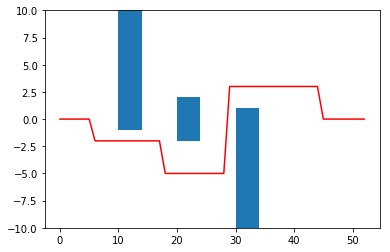

In [14]:
# "Go from point (0,0) to (50,0) avoiding the blue obstacles"
# Red path denotes a feasible solution
show_problem().show()

In [55]:

from pyomo.environ import *
# create the concrete model9
# utilize achievement scalarizing function in computing a PO solution for a given reference point 
def solve_ach(reference,lb,ub):
    model = ConcreteModel()

    vwind = 5.0
    min_speed = 0.01


    #f1, time used
    def f1(model):
        return sum([sqrt(1+model.y[i]**2)/model.v[i] for i in range(48)])
    #f2, wind drag, directly proportional to square of speed wrt. wind
    def f2(model):
        return sum([((model.y[i]*model.v[i])/sqrt(1+model.y[i]**2)+vwind)**2/
                    +model.v[i]**2*((1+model.y[i])**2) for i in range(48)])
    #f3, maximal course changes
    def f3(model):
        return sum([abs(model.y[i+1]-model.y[i]) for i in range(47)])

    def h1_rule(model,i): # first obstacle
        return sum(model.y[j] for j in range(i))<=-1
    def h2_rule(model,i): # second obstacle
        return abs(sum(model.y[j] for j in range(i)))>=2
    def h3_rule(model,i): # third obstacle
        return sum(model.y[j] for j in range(i))>=1
    def h4_rule(model):
        return sum([sqrt(1+model.y[i]**2)/model.v[i] for i in range(48)])<=25
    def h5_rule(model):
        return sum(model.y[i] for i in range(48))==0

    def f_rule(model):
        return t

    def y_init(model,i):
        if i==0:
            return -1
        if i==18:
            return -1
        if i==24:
            return 1
        if i==25:
            return 1
        if i==26:
            return 1
        if i==34:
            return -1
        return 0
    model.y = Var(range(48),bounds = (-10,10),initialize=y_init)
    model.v = Var(range(48),domain=NonNegativeReals,bounds=(min_speed,25),initialize=25)
    model.t = Var()
    model.h1=Constraint(range(9,14),rule=h1_rule) # first obstacle
    model.h2=Constraint(range(19,24),rule=h2_rule) # second obstacle
    model.h3=Constraint(range(29,34),rule=h3_rule) # third obstacle
    model.h4=Constraint(rule=h4_rule)
    model.h5=Constraint(rule=h5_rule)
    
    def h6_rule(model,i):
        return pyomo.environ.inequality(-10, sum([model.y[j] for j in range(i)]),10)
        #return -10<=sum([model.y[j] for j in range(i)])<=10 # gives warning about chained inequalities
    
    model.h6 = Constraint(range(1,48),rule=h6_rule)
    def t_con_f1_rule(model):
        return model.t>=(f1(model)-reference[0]-lb[0])/(ub[0]-lb[0]) # correnponds to first term in max
    model.t_con_f1 = Constraint(rule = t_con_f1_rule)
    def t_con_f2_rule(model):
        return model.t>=(f2(model)-reference[1]-lb[1])/(ub[1]-lb[1]) # correnponds to second term in max
    model.t_con_f2 = Constraint(rule = t_con_f2_rule)
    def t_con_f3_rule(model):
        return model.t>=(f3(model)-reference[2]-lb[2])/(ub[2]-lb[2]) # correnponds to third term in max
    model.t_con_f3 = Constraint(rule = t_con_f3_rule)
    model.f = Objective(expr = model.t+1e-10*(f1(model)+f2(model)+f3(model))) # t + augmentation term
    tee =True
    opt = SolverFactory("ipopt",solver_io="nl")
    opt.options.max_iter=10000
#    opt.options.constr_viol_tol=0.01
    #opt.options.halt_on_ampl_error = "yes"

    opt.solve(model,tee=tee)
    return [[value(f1(model)),value(f2(model)),value(f3(model))],[model.y,model.v]]


In [56]:
# Compute ideal and nadir points
lb_ = [0,0,0]
ub_ = [1,1,1]
values =[]
for i in range(3):
    reference = [1e10,1e10,1e10]
    reference[i]=0
    # use a reference point where f_i is the only one that we are interested in
    values.append(solve_ach(reference,lb_,ub_)[0])
print(values)

Ipopt 3.13.1: max_iter=10000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.1, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:       48
Number of nonzeros in inequality constraint Jacobian.:     1782
Number of nonzeros in Lagrangian Hessian.............:      422

Total number of variables............................:       97
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       96
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total

  18  6.3466204e+00 3.06e-06 2.15e-05  -8.6 1.63e-03    -  1.00e+00 9.91e-01h  1
  19  6.3466194e+00 7.87e-07 6.57e-07  -8.6 4.04e-04    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  6.3466194e+00 1.89e-07 1.60e-07  -8.6 1.99e-04    -  1.00e+00 1.00e+00h  1
  21  6.3466194e+00 4.37e-08 3.84e-08  -8.6 9.77e-05    -  1.00e+00 1.00e+00h  1
  22  6.3466194e+00 7.42e-09 8.26e-09  -8.6 4.53e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 22

                                   (scaled)                 (unscaled)
Objective...............:   6.3466194228962038e+00    6.3466194228962038e+00
Dual infeasibility......:   8.2586829428051553e-09    8.2586829428051553e-09
Constraint violation....:   7.4234715544230310e-09    7.4234715544230310e-09
Complementarity.........:   5.8223269275853517e-09    5.8223269275853517e-09
Overall NLP error.......:   8.2586829428051553e-09    8.2586829428051553e-09


Number of objective funct

 116 -5.6853528e+03 5.75e+03 2.32e+00  -1.0 8.03e+03    -  8.82e-03 1.05e-02f  1
 117 -5.7203167e+03 5.76e+03 2.29e+00  -1.0 5.28e+03    -  7.83e-03 6.63e-03f  1
 118 -5.7578065e+03 5.84e+03 2.36e+00  -1.0 3.43e+03    -  2.47e-03 1.09e-02f  1
 119 -5.8427065e+03 5.93e+03 2.31e+00  -1.0 1.10e+04    -  5.25e-04 1.42e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 -5.9143303e+03 6.00e+03 2.31e+00  -1.0 4.83e+03    -  3.73e-04 1.48e-02f  1
 121 -5.9635287e+03 6.01e+03 2.36e+00  -1.0 6.33e+03    -  1.36e-02 7.77e-03f  1
 122 -5.9862433e+03 6.07e+03 2.28e+00  -1.0 2.16e+03    -  2.72e-04 1.48e-02f  1
 123 -6.0301882e+03 6.09e+03 2.26e+00  -1.0 2.12e+04    -  4.03e-03 3.78e-03f  1
 124 -6.0435254e+03 6.09e+03 2.27e+00  -1.0 6.58e+03    -  4.97e-03 7.84e-03f  1
 125 -6.0995029e+03 6.17e+03 2.27e+00  -1.0 7.32e+03    -  3.89e-03 7.65e-03f  1
 126 -6.1360839e+03 6.19e+03 2.26e+00  -1.0 8.65e+03    -  2.19e-03 7.77e-03f  1
 127 -6.1816942e+03 6.25e+03

 224 -1.0342642e+04 1.04e+04 2.44e+00  -1.0 1.39e+04    -  3.61e-03 2.11e-02h  1
 225 -1.0360334e+04 1.04e+04 2.42e+00  -1.0 1.17e+04    -  5.17e-03 9.96e-03f  1
 226 -1.0308533e+04 1.04e+04 2.54e+00  -1.0 9.26e+03    -  1.19e-03 1.75e-02h  1
 227 -1.0276084e+04 1.04e+04 2.49e+00  -1.0 8.18e+03    -  5.70e-04 9.93e-03h  1
 228 -1.0270399e+04 1.03e+04 2.48e+00  -1.0 2.16e+04    -  9.36e-04 6.44e-03h  1
 229 -1.0005682e+04 1.02e+04 2.55e+00  -1.0 9.20e+03    -  2.02e-02 4.36e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230 -9.9691192e+03 1.01e+04 2.48e+00  -1.0 3.61e+03    -  6.49e-03 2.41e-02h  1
 231 -9.9577497e+03 1.00e+04 2.46e+00  -1.0 6.10e+03    -  5.32e-03 1.37e-02h  1
 232 -9.9135278e+03 9.99e+03 2.47e+00  -1.0 1.09e+04    -  1.33e-02 1.54e-02h  1
 233 -9.8585532e+03 1.00e+04 2.46e+00  -1.0 1.48e+04    -  1.69e-02 2.55e-02h  1
 234 -9.8818849e+03 1.00e+04 2.51e+00  -1.0 2.18e+03    -  1.37e-03 1.41e-02f  1
 235 -9.8917201e+03 9.99e+03

 337 -9.6105589e+03 9.77e+03 2.40e+00  -1.0 1.68e+04    -  1.33e-03 5.84e-03f  1
 338 -9.6286099e+03 9.74e+03 2.38e+00  -1.0 7.27e+03    -  4.54e-03 9.28e-03f  1
 339 -9.6001805e+03 9.69e+03 2.34e+00  -1.0 2.14e+03    -  5.13e-03 1.33e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340 -9.5685432e+03 9.69e+03 2.34e+00  -1.0 3.46e+03    -  9.39e-03 1.91e-02H  1
 341 -9.6087824e+03 9.69e+03 2.25e+00  -1.0 3.97e+03    -  3.79e-03 1.01e-02f  1
 342 -9.6132162e+03 9.70e+03 2.25e+00  -1.0 2.56e+04    -  1.50e-03 2.17e-04f  1
 343 -9.5226655e+03 9.70e+03 2.35e+00  -1.0 5.37e+03    -  2.69e-03 3.16e-02H  1
 344 -9.5497743e+03 9.67e+03 2.34e+00  -1.0 1.79e+04    -  6.62e-03 4.58e-03f  2
 345 -9.5647606e+03 9.65e+03 2.32e+00  -1.0 5.43e+03    -  5.75e-03 7.90e-03f  2
 346 -9.5874338e+03 9.67e+03 2.31e+00  -1.0 1.17e+04    -  2.81e-03 4.10e-03f  1
 347 -9.6072715e+03 9.69e+03 2.34e+00  -1.0 9.12e+03    -  2.39e-03 3.10e-03f  1
 348 -9.5354682e+03 9.63e+03

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 -9.4717367e+03 9.50e+03 2.30e+00  -1.0 5.05e+03    -  8.44e-04 2.76e-03f  1
 461 -9.4795593e+03 9.54e+03 2.33e+00  -1.0 1.16e+04    -  1.05e-02 6.49e-03f  1
 462 -9.4968018e+03 9.53e+03 2.32e+00  -1.0 1.17e+04    -  2.86e-03 1.47e-03f  1
 463 -9.4968178e+03 9.52e+03 2.29e+00  -1.0 7.13e+03    -  2.08e-03 3.62e-03h  1
 464 -9.4982487e+03 9.55e+03 2.33e+00  -1.0 1.00e+04    -  3.18e-03 6.74e-03h  1
 465 -9.5012247e+03 9.53e+03 2.29e+00  -1.0 9.71e+02  -3.3 3.54e-03 4.48e-03h  1
 466 -9.4941690e+03 9.52e+03 2.26e+00  -1.0 1.05e+04    -  1.90e-03 3.97e-03h  1
 467 -9.4976322e+03 9.52e+03 2.28e+00  -1.0 1.07e+04    -  1.06e-02 3.12e-03f  1
 468 -9.4525668e+03 9.52e+03 2.26e+00  -1.0 9.94e+03    -  2.09e-03 1.32e-02h  1
 469 -9.4920064e+03 9.53e+03 2.31e+00  -1.0 8.83e+03    -  1.30e-02 4.80e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470 -9.4964054e+03 9.53e+03

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 590 -1.0404751e+04 1.04e+04 2.35e+00  -1.0 6.32e+03    -  5.68e-03 4.22e-03f  1
 591 -1.0408853e+04 1.04e+04 2.34e+00  -1.0 1.55e+03    -  1.19e-03 3.64e-03h  1
 592 -1.0409570e+04 1.05e+04 2.33e+00  -1.0 1.17e+03    -  1.99e-03 8.36e-03h  1
 593 -1.0450431e+04 1.05e+04 2.34e+00  -1.0 2.09e+04    -  1.95e-03 2.45e-03f  1
 594 -1.0442606e+04 1.05e+04 2.33e+00  -1.0 3.46e+03    -  4.54e-03 4.31e-03h  2
 595 -1.0438344e+04 1.05e+04 2.33e+00  -1.0 5.35e+03    -  3.73e-03 3.23e-03h  1
 596 -1.0439409e+04 1.05e+04 2.33e+00  -1.0 1.12e+04    -  1.42e-03 1.50e-03h  1
 597 -1.0409709e+04 1.04e+04 2.33e+00  -1.0 9.21e+03    -  2.85e-03 6.24e-03h  1
 598 -1.0419210e+04 1.04e+04 2.32e+00  -1.0 5.59e+03    -  1.25e-03 2.86e-03f  3
 599 -1.0404569e+04 1.04e+04 2.32e+00  -1.0 7.94e+03    -  8.57e-03 5.19e-03h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600 -1.0419558e+04 1.04e+04

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710 -5.6594642e+02 6.19e+02 4.62e+02  -1.0 9.28e+05    -  2.14e-03 4.29e-03f  2
 711 -6.6052661e+02 7.21e+02 4.59e+02  -1.0 1.17e+06    -  5.22e-03 4.50e-03f  2
 712 -6.6024697e+02 7.25e+02 4.21e+02  -1.0 1.36e+01  -0.7 5.48e-02 1.24e-01h  1
 713 -6.6057430e+02 7.02e+02 3.72e+02  -1.0 1.73e+01  -1.2 9.84e-02 1.32e-01h  1
 714 -6.6369329e+02 7.78e+02 3.16e+02  -1.0 2.31e+01  -1.6 1.21e-01 1.91e-01h  1
 715 -6.6701286e+02 7.44e+02 2.92e+02  -1.0 7.21e+01  -2.1 1.74e-01 4.60e-02h  2
 716 -6.9926566e+02 8.59e+02 2.44e+02  -1.0 2.02e+02  -2.6 1.80e-01 1.70e-01F  1
 717 -6.9992984e+02 7.93e+02 2.17e+02  -1.0 1.87e+01  -1.3 4.78e-02 1.26e-01h  2
 718 -7.0068082e+02 7.73e+02 2.10e+02  -1.0 6.15e+01  -1.7 1.26e-01 2.50e-02h  3
 719 -7.1841035e+02 8.37e+02 1.75e+02  -1.0 8.47e+01  -2.2 1.38e-01 2.09e-01h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720 -7.7043972e+02 8.84e+02

 804 -7.7579525e+02 1.00e+03 5.26e+01  -1.0 8.17e+04    -  9.36e-04 9.54e-03f  1
 805 -7.7575556e+02 9.83e+02 5.32e+01  -1.0 1.97e+01   0.8 6.29e-03 1.97e-02h  1
 806 -7.7573659e+02 9.75e+02 5.05e+01  -1.0 1.97e+01   0.3 2.82e-02 8.83e-03h  1
 807 -7.7559660e+02 9.06e+02 5.20e+01  -1.0 2.76e+01  -0.1 3.83e-03 1.46e-01f  1
 808 -7.7552647e+02 8.74e+02 5.14e+01  -1.0 2.34e+01   0.3 4.92e-03 4.96e-02h  1
 809 -7.7528059e+02 8.58e+02 4.72e+01  -1.0 1.83e+01   0.7 4.48e-02 2.83e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810 -7.7514229e+02 8.47e+02 5.22e+01  -1.0 1.94e+01   1.1 1.44e-03 2.03e-02h  1
 811 -7.7504333e+02 8.40e+02 5.25e+01  -1.0 2.27e+01   0.7 6.92e-03 1.17e-02h  1
 812 -7.7487423e+02 8.34e+02 5.68e+01  -1.0 2.34e+01   1.1 1.11e-03 1.97e-02h  1
 813 -7.7485331e+02 8.28e+02 5.69e+01  -1.0 1.70e+01   0.6 1.64e-03 6.97e-03h  1
 814 -7.7479449e+02 8.25e+02 5.15e+01  -1.0 2.51e+01   1.0 5.02e-02 6.31e-03h  1
 815 -7.7470962e+02 8.22e+02

 928 -1.3944076e+03 1.43e+03 1.95e+03  -1.0 7.61e+01  -2.0 1.14e-02 3.36e-02h  1
 929 -1.3897887e+03 1.42e+03 1.90e+03  -1.0 1.62e+02  -2.5 5.08e-03 2.84e-02h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930 -1.3862094e+03 1.41e+03 1.88e+03  -1.0 3.81e+02  -2.9 2.58e-02 9.39e-03h  2
 931 -1.3839908e+03 1.40e+03 1.86e+03  -1.0 2.94e+02  -2.5 2.18e-02 7.55e-03h  4
 932 -1.3835352e+03 1.40e+03 1.86e+03  -1.0 3.56e+02  -3.0 7.95e-02 1.28e-03h  6
 933 -1.3832670e+03 1.40e+03 1.86e+03  -1.0 2.25e+02  -2.6 1.31e-02 1.19e-03h  7
 934 -1.3830424e+03 1.40e+03 1.86e+03  -1.0 1.43e+02  -2.1 4.62e-02 1.57e-03h  7
 935 -1.3544336e+03 1.45e+03 1.76e+03  -1.0 3.10e+02  -2.6 6.75e-03 6.97e-02H  1
 936 -1.3543614e+03 1.39e+03 1.67e+03  -1.0 3.86e+01  -1.3 7.58e-02 5.16e-02h  2
 937 -1.3598937e+03 1.40e+03 1.66e+03  -1.0 1.09e+05    -  3.42e-03 1.85e-03f  2
 938 -1.3593481e+03 1.39e+03 1.63e+03  -1.0 8.82e+01  -1.8 9.10e-02 1.82e-02h  1
 939 -1.3565317e+03 1.38e+03

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1050 -5.9947449e+02 6.03e+02 1.39e+02  -1.0 3.24e+04    -  1.54e-01 4.12e-03h  6
1051 -5.8227286e+02 6.00e+02 1.32e+02  -1.0 1.89e+04    -  2.26e-01 5.51e-02w  1
1052 -5.8558041e+02 6.37e+02 1.19e+02  -1.0 3.89e+03    -  8.36e-02 9.86e-02w  1
1053 -6.0990278e+02 6.52e+02 2.60e+03  -1.0 3.05e+05    -  2.01e-02 1.21e-02w  1
1054 -5.9732429e+02 6.01e+02 1.38e+02  -1.0 1.20e+01   1.0 2.26e-01 6.89e-03h  3
1055 -5.9690781e+02 6.00e+02 1.38e+02  -1.0 3.22e+04    -  9.42e-02 2.95e-03h  7
1056 -5.9566307e+02 5.99e+02 1.37e+02  -1.0 3.45e+04    -  1.76e-01 4.19e-03h  7
1057 -5.9464063e+02 5.98e+02 1.37e+02  -1.0 3.88e+04    -  2.15e-01 3.98e-03h  7
1058 -5.9375832e+02 5.97e+02 1.36e+02  -1.0 2.58e+04    -  2.28e-01 5.02e-03h  7
1059 -5.9310467e+02 5.96e+02 1.35e+02  -1.0 3.15e+04    -  2.53e-01 3.60e-03h  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1060 -5.9147024e+02 5.95e+02

1190 -5.1563671e+02 5.19e+02 8.59e+01  -1.0 2.14e+04    -  1.48e-01 7.07e-03h  7
1191 -5.1495981e+02 5.17e+02 8.54e+01  -1.0 2.11e+04    -  5.39e-01 5.81e-03h  6
1192 -5.1407183e+02 5.17e+02 8.50e+01  -1.0 2.97e+04    -  1.30e-01 4.74e-03h  7
1193 -5.1373773e+02 5.17e+02 8.46e+01  -1.0 2.76e+04    -  1.60e-01 5.30e-03h  6
1194 -5.3419367e+02 6.63e+02 7.00e+01  -1.0 2.40e+04    -  1.75e-01 2.05e-01w  1
1195 -5.3672225e+02 6.17e+02 6.52e+02  -1.0 1.55e+01  -1.4 9.91e-02 3.03e-01w  1
1196 -5.3621249e+02 5.69e+02 5.38e+02  -1.0 1.26e+01  -0.1 5.01e-02 1.29e-01w  1
1197 -5.1405736e+02 5.16e+02 8.43e+01  -1.0 1.63e+01  -0.5 1.75e-01 3.20e-03h  6
1198 -5.1342341e+02 5.16e+02 8.40e+01  -1.0 2.78e+04    -  5.95e-01 3.96e-03h  8
1199 -5.1338454e+02 5.15e+02 8.37e+01  -1.0 3.84e+03    -  1.26e-01 2.95e-03h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1200 -5.1295095e+02 5.15e+02 8.34e+01  -1.0 2.70e+04    -  2.00e-01 3.64e-03h  7
1201 -5.1268469e+02 5.15e+02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1330 -1.8220675e+03 1.97e+03 6.25e+02  -1.0 3.55e+01   0.1 3.57e-01 1.05e-03h  8
1331 -1.8220626e+03 1.97e+03 7.69e+02  -1.0 3.60e+01  -0.4 4.74e-02 4.25e-04h  8
1332 -1.8220621e+03 1.97e+03 3.42e+03  -1.0 7.36e+01  -0.9 2.48e-01 9.73e-05h  9
1333 -1.8230596e+03 2.22e+03 1.08e+04  -1.0 4.02e+01  -1.4 4.17e-02 2.60e-01w  1
1334 -1.8230277e+03 2.21e+03 1.09e+04  -1.0 3.40e+01   3.6 3.23e-03 2.49e-03w  1
1335 -1.8230119e+03 2.21e+03 1.18e+04  -1.0 3.42e+01   3.1 5.80e-03 1.22e-03w  1
1336 -1.8220933e+03 1.95e+03 3.49e+03  -1.0 3.42e+01   3.5 4.17e-02 8.14e-03h  5
1337 -1.8220750e+03 1.95e+03 3.72e+03  -1.0 3.26e+01   3.0 5.81e-02 1.40e-03h  2
1338 -1.9774165e+03 2.06e+03 3.71e+03  -1.0 4.93e+05    -  2.81e-03 1.15e-02f  2
1339 -2.1825400e+03 2.37e+03 3.64e+03  -1.0 6.33e+05    -  1.70e-02 2.03e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1340 -2.2402279e+03 2.36e+03

1434 -4.1056126e+03 4.12e+03 2.25e+03  -1.0 1.44e+04    -  1.29e-02 1.35e-03f  2
1435 -4.1248116e+03 4.14e+03 2.22e+03  -1.0 7.14e+04    -  1.35e-02 1.62e-03f  4
1436 -4.1467396e+03 4.16e+03 2.20e+03  -1.0 1.58e+05    -  8.46e-03 1.30e-03f  4
1437 -4.1696599e+03 4.19e+03 2.18e+03  -1.0 1.72e+04    -  1.24e-02 1.34e-03f  4
1438 -4.1940043e+03 4.21e+03 2.16e+03  -1.0 4.50e+04    -  8.81e-03 1.26e-03f  4
1439 -4.2290177e+03 4.26e+03 2.16e+03  -1.0 1.60e+04    -  3.57e-03 2.19e-03f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1440 -4.2501411e+03 4.26e+03 2.14e+03  -1.0 3.47e+04    -  6.12e-03 7.74e-04f  2
1441 -4.2667337e+03 4.28e+03 2.11e+03  -1.0 4.49e+04    -  1.32e-02 1.20e-03f  4
1442 -4.2954999e+03 4.32e+03 2.10e+03  -1.0 4.29e+04    -  7.53e-03 1.57e-03f  1
1443 -4.3129119e+03 4.32e+03 2.09e+03  -1.0 1.78e+05    -  3.41e-03 8.71e-04f  4
1444 -4.3310695e+03 4.35e+03 2.07e+03  -1.0 4.07e+05    -  1.08e-02 1.37e-03f  4
1445 -4.3556145e+03 4.37e+03

1534 -5.7224465e+03 5.73e+03 1.43e+03  -1.0 4.08e+05    -  8.29e-03 7.38e-04f  4
1535 -5.7355897e+03 5.74e+03 1.42e+03  -1.0 1.95e+05    -  4.00e-03 5.91e-04f  4
1536 -5.7554827e+03 5.78e+03 1.42e+03  -1.0 5.99e+04    -  5.99e-03 9.61e-04f  3
1537 -5.7652253e+03 5.78e+03 1.41e+03  -1.0 2.06e+05    -  1.57e-03 2.35e-04f  4
1538 -5.7803003e+03 5.79e+03 1.40e+03  -1.0 3.98e+05    -  8.55e-03 7.56e-04f  4
1539 -5.8635355e+03 5.96e+03 1.40e+03  -1.0 7.29e+04    -  4.45e-03 3.34e-03w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540 -5.9687918e+03 6.03e+03 1.40e+03  -1.0 1.07e+06    -  8.10e-05 6.16e-04w  1
1541 -6.0508512e+03 6.11e+03 1.40e+03  -1.0 6.83e+06    -  4.97e-06 2.22e-04w  1
1542 -5.7907047e+03 5.80e+03 1.40e+03  -1.0 6.09e+06    -  4.45e-03 4.17e-04f  3
1543 -5.8010048e+03 5.82e+03 1.39e+03  -1.0 2.49e+05    -  9.16e-03 9.23e-04f  4
1544 -5.8121755e+03 5.82e+03 1.38e+03  -1.0 1.56e+05    -  3.65e-03 4.21e-04f  4
1545 -5.8249401e+03 5.84e+03

1632 -6.7412037e+03 6.75e+03 1.06e+03  -1.0 1.43e+05    -  5.74e-03 6.18e-04f  3
1633 -6.7523102e+03 6.76e+03 1.06e+03  -1.0 5.74e+04    -  3.01e-03 5.08e-04f  4
1634 -6.8154601e+03 6.89e+03 1.06e+03  -1.0 3.80e+05    -  2.14e-03 2.45e-03w  1
1635 -6.9030815e+03 6.96e+03 1.06e+03  -1.0 3.79e+05    -  5.34e-05 6.97e-04w  1
1636 -6.9871789e+03 7.05e+03 1.06e+03  -1.0 3.37e+05    -  6.37e-05 2.43e-03w  1
1637 -6.7680977e+03 6.78e+03 1.06e+03  -1.0 6.87e+05    -  2.14e-03 6.13e-04f  2
1638 -6.7810337e+03 6.79e+03 1.05e+03  -1.0 4.94e+05    -  5.18e-03 4.54e-04f  3
1639 -6.7897841e+03 6.80e+03 1.05e+03  -1.0 1.42e+05    -  2.45e-03 6.18e-04f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640 -6.8012682e+03 6.81e+03 1.05e+03  -1.0 9.27e+04    -  2.31e-03 5.05e-04f  3
1641 -6.8134013e+03 6.82e+03 1.04e+03  -1.0 1.17e+05    -  5.46e-03 5.66e-04f  3
1642 -6.8267246e+03 6.83e+03 1.04e+03  -1.0 5.87e+05    -  2.46e-03 4.77e-04f  3
1643 -6.8370917e+03 6.85e+03

1740 -7.9422130e+03 8.04e+03 7.88e+02  -1.0 5.98e+05    -  2.02e-04 2.99e-03w  1
1741 -8.1157416e+03 8.23e+03 7.88e+02  -1.0 2.19e+05    -  5.61e-05 2.66e-03w  1
1742 -7.7919234e+03 7.80e+03 7.89e+02  -1.0 1.12e+06    -  1.39e-02 4.77e-04f  2
1743 -7.8078428e+03 7.82e+03 7.87e+02  -1.0 3.39e+05    -  1.98e-03 8.44e-04f  4
1744 -7.8213213e+03 7.83e+03 7.84e+02  -1.0 1.02e+06    -  4.82e-03 5.07e-04f  3
1745 -7.8306273e+03 7.84e+03 7.82e+02  -1.0 1.49e+05    -  3.94e-03 5.06e-04f  5
1746 -7.8429560e+03 7.85e+03 7.74e+02  -1.0 4.07e+05    -  1.01e-02 5.39e-04f  3
1747 -7.8558216e+03 7.87e+03 7.73e+02  -1.0 1.17e+05    -  2.79e-03 5.66e-04f  4
1748 -7.8705414e+03 7.88e+03 7.69e+02  -1.0 2.85e+05    -  5.56e-03 6.07e-04f  3
1749 -7.8830090e+03 7.89e+03 7.67e+02  -1.0 1.54e+05    -  3.63e-03 5.33e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1750 -7.8906398e+03 7.90e+03 7.61e+02  -1.0 3.85e+05    -  8.16e-03 5.58e-04f  4
1751 -7.9069174e+03 7.92e+03

1851 -8.7385709e+03 8.75e+03 5.92e+02  -1.0 2.25e+05    -  3.15e-03 4.70e-04f  2
1852 -8.7483097e+03 8.76e+03 5.91e+02  -1.0 2.29e+05    -  3.22e-03 4.52e-04f  3
1853 -8.7590103e+03 8.77e+03 5.90e+02  -1.0 1.99e+05    -  2.16e-03 4.64e-04f  3
1854 -8.7687849e+03 8.78e+03 5.87e+02  -1.0 2.04e+05    -  5.15e-03 4.44e-04f  3
1855 -8.7792787e+03 8.79e+03 5.86e+02  -1.0 1.95e+05    -  2.44e-03 4.66e-04f  3
1856 -8.7900061e+03 8.80e+03 5.84e+02  -1.0 2.94e+05    -  2.50e-03 4.57e-04f  3
1857 -8.8014216e+03 8.81e+03 5.82e+02  -1.0 3.72e+05    -  3.92e-03 4.64e-04f  3
1858 -8.8121669e+03 8.82e+03 5.81e+02  -1.0 8.29e+05    -  2.39e-03 4.39e-04f  3
1859 -8.8240868e+03 8.83e+03 5.80e+02  -1.0 7.20e+05    -  2.65e-03 4.59e-04f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1860 -8.8347811e+03 8.84e+03 5.78e+02  -1.0 1.06e+06    -  3.60e-03 4.29e-04f  3
1861 -8.8929674e+03 8.99e+03 5.77e+02  -1.0 2.34e+05    -  2.78e-03 3.46e-03w  1
1862 -9.0059232e+03 9.07e+03

1965 -9.7175240e+03 9.79e+03 4.16e+02  -1.0 5.95e+05    -  5.54e-03 2.46e-03w  1
1966 -9.8315785e+03 9.91e+03 4.16e+02  -1.0 1.45e+06    -  3.94e-04 8.55e-04w  1
1967 -9.9621385e+03 1.00e+04 4.16e+02  -1.0 1.76e+06    -  8.47e-05 9.29e-04w  1
1968 -9.6647879e+03 9.67e+03 4.16e+02  -1.0 3.94e+05    -  5.54e-03 3.07e-04f  3
1969 -9.6728262e+03 9.69e+03 4.14e+02  -1.0 6.96e+05    -  4.26e-03 9.29e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1970 -9.6809093e+03 9.69e+03 4.12e+02  -1.0 6.62e+05    -  7.61e-03 3.84e-04f  4
1971 -9.6875959e+03 9.70e+03 4.09e+02  -1.0 2.47e+05    -  1.24e-02 5.18e-04f  4
1972 -9.6989715e+03 9.71e+03 4.07e+02  -1.0 3.13e+05    -  6.35e-03 7.65e-04f  4
1973 -9.7076208e+03 9.71e+03 4.06e+02  -1.0 4.88e+05    -  4.78e-03 4.62e-04f  4
1974 -9.7150881e+03 9.73e+03 4.05e+02  -1.0 1.64e+05    -  3.25e-03 9.82e-04f  4
1975 -9.7308084e+03 9.74e+03 4.03e+02  -1.0 2.09e+05    -  3.43e-03 5.76e-04f  3
1976 -9.7395775e+03 9.75e+03

2066 -1.0381160e+04 1.04e+04 3.17e+02  -1.0 4.08e+05    -  3.56e-03 4.60e-04f  3
2067 -1.0389373e+04 1.04e+04 3.17e+02  -1.0 5.40e+05    -  2.27e-03 5.30e-04f  4
2068 -1.0401638e+04 1.04e+04 3.16e+02  -1.0 3.29e+04    -  2.35e-03 5.79e-04f  3
2069 -1.0458560e+04 1.05e+04 3.14e+02  -1.0 8.15e+05    -  6.85e-03 2.44e-03w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2070 -1.0540287e+04 1.06e+04 3.14e+02  -1.0 7.97e+05    -  3.00e-04 6.15e-04w  1
2071 -1.0620460e+04 1.07e+04 3.14e+02  -1.0 9.64e+05    -  8.70e-05 8.89e-04w  1
2072 -1.0408753e+04 1.04e+04 3.15e+02  -1.0 1.33e+06    -  6.85e-03 3.05e-04f  3
2073 -1.0416752e+04 1.04e+04 3.13e+02  -1.0 1.06e+05    -  5.47e-03 6.46e-04f  3
2074 -1.0425949e+04 1.04e+04 3.13e+02  -1.0 5.76e+05    -  2.32e-03 4.25e-04f  4
2075 -1.0429627e+04 1.04e+04 3.12e+02  -1.0 6.69e+05    -  3.92e-03 2.98e-04f  4
2076 -1.0439133e+04 1.05e+04 3.11e+02  -1.0 1.50e+05    -  3.87e-03 7.61e-04f  3
2077 -1.0447657e+04 1.05e+04

2168 -1.1052560e+04 1.11e+04 2.44e+02  -1.0 7.59e+05    -  5.45e-03 4.37e-04f  3
2169 -1.1061508e+04 1.11e+04 2.43e+02  -1.0 3.35e+05    -  4.70e-03 4.58e-04f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2170 -1.1067958e+04 1.11e+04 2.43e+02  -1.0 2.02e+05    -  2.22e-03 3.16e-04f  4
2171 -1.1073436e+04 1.11e+04 2.42e+02  -1.0 8.03e+04    -  2.41e-03 4.74e-04f  5
2172 -1.1080927e+04 1.11e+04 2.42e+02  -1.0 6.02e+05    -  4.12e-03 3.56e-04f  4
2173 -1.1113267e+04 1.12e+04 2.41e+02  -1.0 4.95e+05    -  5.76e-03 2.10e-03w  1
2174 -1.1188588e+04 1.12e+04 2.41e+02  -1.0 7.97e+04    -  1.05e-04 9.46e-04w  1
2175 -1.1274858e+04 1.13e+04 2.40e+02  -1.0 1.26e+06    -  1.13e-04 1.23e-03w  1
2176 -1.1089012e+04 1.11e+04 2.41e+02  -1.0 4.32e+05    -  5.76e-03 5.25e-04f  2
2177 -1.1102104e+04 1.11e+04 2.40e+02  -1.0 7.13e+05    -  2.10e-03 6.36e-04f  3
2178 -1.1112224e+04 1.11e+04 2.40e+02  -1.0 3.62e+05    -  3.51e-03 4.78e-04f  3
2179 -1.1117743e+04 1.11e+04

2300 -1.1884705e+04 1.19e+04 1.81e+02  -1.0 4.43e+05    -  4.71e-03 3.06e-04f  4
2301 -1.1889555e+04 1.19e+04 1.81e+02  -1.0 4.38e+05    -  3.55e-03 1.59e-04f  5
2302 -1.1895587e+04 1.19e+04 1.81e+02  -1.0 1.14e+05    -  2.58e-03 3.97e-04f  5
2303 -1.1941177e+04 1.20e+04 1.80e+02  -1.0 7.17e+05    -  4.84e-03 1.90e-03w  1
2304 -1.2053889e+04 1.21e+04 1.80e+02  -1.0 1.45e+06    -  7.18e-05 9.53e-04w  1
2305 -1.2183038e+04 1.23e+04 1.80e+02  -1.0 4.08e+06    -  2.37e-05 8.09e-04w  1
2306 -1.1901285e+04 1.19e+04 1.80e+02  -1.0 1.34e+06    -  4.84e-03 2.37e-04f  3
2307 -1.1910212e+04 1.19e+04 1.80e+02  -1.0 5.36e+05    -  3.09e-03 4.66e-04f  3
2308 -1.1915809e+04 1.19e+04 1.80e+02  -1.0 2.02e+04    -  1.79e-03 2.77e-04f  4
2309 -1.1920997e+04 1.19e+04 1.79e+02  -1.0 1.43e+05    -  5.94e-03 3.97e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310 -1.1929865e+04 1.19e+04 1.78e+02  -1.0 6.51e+05    -  7.31e-03 4.65e-04f  3
2311 -1.1937272e+04 1.19e+04

2438 -1.2647081e+04 1.27e+04 1.41e+02  -1.0 6.81e+05    -  2.96e-03 1.48e-04f  5
2439 -1.2651296e+04 1.27e+04 1.41e+02  -1.0 1.06e+06    -  7.87e-03 2.22e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2440 -1.2658065e+04 1.27e+04 1.41e+02  -1.0 7.55e+05    -  2.38e-03 2.89e-04f  5
2441 -1.2663344e+04 1.27e+04 1.40e+02  -1.0 7.66e+05    -  5.35e-03 2.00e-04f  4
2442 -1.2668746e+04 1.27e+04 1.40e+02  -1.0 1.18e+05    -  2.05e-03 4.26e-04f  5
2443 -1.2677739e+04 1.27e+04 1.40e+02  -1.0 2.68e+05    -  1.28e-02 4.18e-04f  3
2444 -1.2682823e+04 1.27e+04 1.39e+02  -1.0 6.35e+05    -  2.50e-03 2.66e-04f  5
2445 -1.2689592e+04 1.27e+04 1.39e+02  -1.0 2.92e+05    -  6.72e-03 3.01e-04f  4
2446 -1.2757007e+04 1.29e+04 1.39e+02  -1.0 6.79e+05    -  3.86e-03 2.65e-03w  1
2447 -1.2847793e+04 1.29e+04 1.39e+02  -1.0 2.19e+06    -  1.95e-04 5.16e-04w  1
2448 -1.2910784e+04 1.30e+04 1.38e+02  -1.0 5.75e+05    -  1.31e-04 1.01e-03w  1
2449 -1.2698019e+04 1.27e+04

2573 -1.3382138e+04 1.34e+04 1.12e+02  -1.0 4.63e+05    -  3.58e-03 3.02e-04f  4
2574 -1.3387927e+04 1.34e+04 1.12e+02  -1.0 8.16e+05    -  3.16e-03 1.62e-04f  5
2575 -1.3394707e+04 1.34e+04 1.12e+02  -1.0 7.45e+05    -  8.29e-03 3.64e-04f  5
2576 -1.3452648e+04 1.35e+04 1.11e+02  -1.0 1.06e+06    -  4.56e-03 1.96e-03w  1
2577 -1.3554728e+04 1.36e+04 1.11e+02  -1.0 7.59e+05    -  2.88e-04 5.70e-04w  1
2578 -1.3653153e+04 1.37e+04 1.11e+02  -1.0 4.11e+06    -  1.15e-05 6.74e-04w  1
2579 -1.3401949e+04 1.34e+04 1.11e+02  -1.0 5.49e+06    -  4.56e-03 2.45e-04f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580 -1.3406730e+04 1.34e+04 1.11e+02  -1.0 5.39e+04    -  8.01e-03 3.21e-04f  4
2581 -1.3414641e+04 1.34e+04 1.11e+02  -1.0 4.41e+05    -  4.53e-03 3.03e-04f  5
2582 -1.3424115e+04 1.34e+04 1.11e+02  -1.0 1.19e+06    -  2.77e-03 3.04e-04f  5
2583 -1.3431429e+04 1.34e+04 1.11e+02  -1.0 1.10e+06    -  8.75e-03 2.69e-04f  4
2584 -1.3438200e+04 1.34e+04

2677 -1.3886445e+04 1.39e+04 9.90e+01  -1.0 9.24e+05    -  3.13e-03 1.75e-04f  5
2678 -1.3893678e+04 1.39e+04 9.87e+01  -1.0 4.38e+05    -  6.97e-03 3.26e-04f  5
2679 -1.3901307e+04 1.39e+04 9.87e+01  -1.0 1.35e+06    -  4.26e-03 2.08e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680 -1.3943654e+04 1.40e+04 9.84e+01  -1.0 1.91e+05    -  2.66e-03 2.74e-03w  1
2681 -1.4046006e+04 1.41e+04 9.84e+01  -1.0 1.41e+06    -  4.09e-04 6.73e-04w  1
2682 -1.4136115e+04 1.42e+04 9.83e+01  -1.0 3.10e+06    -  1.33e-04 9.11e-04w  1
2683 -1.3906600e+04 1.39e+04 9.86e+01  -1.0 1.11e+06    -  2.66e-03 3.42e-04f  3
2684 -1.3912983e+04 1.39e+04 9.85e+01  -1.0 1.76e+05    -  3.69e-03 2.50e-04f  4
2685 -1.3918203e+04 1.39e+04 9.84e+01  -1.0 6.73e+05    -  6.20e-03 2.55e-04f  5
2686 -1.3925814e+04 1.39e+04 9.83e+01  -1.0 2.77e+05    -  2.91e-03 2.70e-04f  4
2687 -1.3929947e+04 1.39e+04 9.83e+01  -1.0 1.12e+06    -  2.71e-03 1.52e-04f  5
2688 -1.3934704e+04 1.39e+04

2793 -1.4426006e+04 1.44e+04 8.82e+01  -1.0 6.17e+05    -  1.92e-03 2.28e-04f  6
2794 -1.4430530e+04 1.44e+04 8.83e+01  -1.0 1.15e+06    -  9.45e-03 3.18e-04f  4
2795 -1.4436459e+04 1.44e+04 8.82e+01  -1.0 9.40e+05    -  1.82e-03 3.03e-04f  5
2796 -1.4443106e+04 1.45e+04 8.82e+01  -1.0 9.44e+05    -  2.50e-03 2.67e-04f  4
2797 -1.4505225e+04 1.46e+04 8.78e+01  -1.0 7.89e+05    -  5.61e-03 2.32e-03w  1
2798 -1.4623796e+04 1.47e+04 8.77e+01  -1.0 1.14e+06    -  1.16e-04 6.63e-04w  1
2799 -1.4766532e+04 1.49e+04 8.77e+01  -1.0 1.31e+06    -  7.16e-05 9.43e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2800 -1.4450871e+04 1.45e+04 8.79e+01  -1.0 2.28e+06    -  5.61e-03 2.90e-04f  3
2801 -1.4455005e+04 1.45e+04 8.79e+01  -1.0 9.26e+05    -  2.86e-03 1.37e-04f  5
2802 -1.4459170e+04 1.45e+04 8.78e+01  -1.0 4.74e+05    -  3.50e-03 2.63e-04f  4
2803 -1.4465676e+04 1.45e+04 8.78e+01  -1.0 5.56e+05    -  2.99e-03 2.57e-04f  4
2804 -1.4472184e+04 1.45e+04

2930 -1.5031075e+04 1.50e+04 7.92e+01  -1.0 1.27e+05    -  7.39e-03 3.06e-04f  3
2931 -1.5038836e+04 1.50e+04 7.91e+01  -1.0 4.43e+05    -  4.15e-03 3.61e-04f  4
2932 -1.5047773e+04 1.51e+04 7.91e+01  -1.0 4.22e+05    -  3.43e-03 2.98e-04f  4
2933 -1.5056120e+04 1.51e+04 7.89e+01  -1.0 1.61e+05    -  6.67e-03 3.46e-04f  4
2934 -1.5064242e+04 1.51e+04 7.89e+01  -1.0 9.92e+04    -  4.38e-03 2.76e-04f  4
2935 -1.5068029e+04 1.51e+04 7.88e+01  -1.0 6.80e+05    -  3.30e-03 1.77e-04f  5
2936 -1.5071307e+04 1.51e+04 7.89e+01  -1.0 7.02e+05    -  6.41e-03 1.94e-04f  6
2937 -1.5075284e+04 1.51e+04 7.88e+01  -1.0 1.09e+05    -  7.55e-03 2.45e-04f  4
2938 -1.5081367e+04 1.51e+04 7.89e+01  -1.0 6.09e+05    -  2.79e-03 3.28e-04f  5
2939 -1.5086827e+04 1.51e+04 7.85e+01  -1.0 8.26e+05    -  8.45e-03 2.58e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2940 -1.5184526e+04 1.54e+04 7.80e+01  -1.0 8.89e+05    -  3.16e-03 5.72e-03w  1
2941 -1.5395143e+04 1.55e+04

3052 -1.5533986e+04 1.55e+04 7.50e+01  -1.0 4.58e+05    -  2.22e-03 4.86e-04f  5
3053 -1.5541043e+04 1.55e+04 7.48e+01  -1.0 1.17e+05    -  7.65e-03 4.29e-04f  3
3054 -1.5550254e+04 1.56e+04 7.48e+01  -1.0 8.86e+04    -  2.30e-03 4.94e-04f  5
3055 -1.5558802e+04 1.56e+04 7.47e+01  -1.0 1.65e+05    -  3.53e-03 3.00e-04f  4
3056 -1.5562813e+04 1.56e+04 7.43e+01  -1.0 9.12e+05    -  8.81e-03 5.33e-04f  3
3057 -1.5662560e+04 1.58e+04 7.40e+01  -1.0 1.74e+05    -  2.93e-03 3.67e-03w  1
3058 -1.5835123e+04 1.59e+04 7.39e+01  -1.0 3.25e+06    -  1.84e-05 9.04e-04w  1
3059 -1.5951455e+04 1.61e+04 7.38e+01  -1.0 7.85e+05    -  3.37e-04 1.76e-03w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3060 -1.5569047e+04 1.56e+04 7.43e+01  -1.0 4.90e+06    -  2.93e-03 2.29e-04f  4
3061 -1.5572612e+04 1.56e+04 7.43e+01  -1.0 2.24e+05    -  6.46e-03 1.80e-04f  6
3062 -1.5575993e+04 1.56e+04 7.43e+01  -1.0 6.55e+05    -  2.50e-03 1.66e-04f  6
3063 -1.5582809e+04 1.56e+04

3187 -1.6090148e+04 1.61e+04 7.01e+01  -1.0 5.79e+05    -  2.39e-03 1.90e-03w  1
3188 -1.6156503e+04 1.62e+04 7.00e+01  -1.0 4.98e+05    -  2.04e-04 7.97e-04w  1
3189 -1.6257735e+04 1.63e+04 6.99e+01  -1.0 1.27e+06    -  6.30e-04 9.86e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3190 -1.6068970e+04 1.61e+04 7.01e+01  -1.0 2.04e+06    -  2.39e-03 4.76e-04f  2
3191 -1.6076037e+04 1.61e+04 7.01e+01  -1.0 5.20e+05    -  2.32e-03 3.18e-04f  4
3192 -1.6081013e+04 1.61e+04 6.99e+01  -1.0 8.31e+05    -  6.03e-03 2.59e-04f  4
3193 -1.6085400e+04 1.61e+04 7.00e+01  -1.0 1.11e+06    -  2.68e-03 1.69e-04f  5
3194 -1.6089087e+04 1.61e+04 6.99e+01  -1.0 1.72e+05    -  7.54e-03 1.77e-04f  5
3195 -1.6094300e+04 1.61e+04 7.00e+01  -1.0 7.93e+05    -  3.16e-03 2.43e-04f  4
3196 -1.6101545e+04 1.61e+04 6.99e+01  -1.0 1.12e+06    -  2.58e-03 2.99e-04f  4
3197 -1.6105192e+04 1.61e+04 7.00e+01  -1.0 1.07e+06    -  5.83e-03 1.18e-04f  5
3198 -1.6109082e+04 1.61e+04

3296 -1.6455518e+04 1.65e+04 6.69e+01  -1.0 5.11e+05    -  7.82e-03 2.87e-04f  4
3297 -1.6463194e+04 1.65e+04 6.67e+01  -1.0 6.49e+05    -  3.71e-03 3.72e-04f  5
3298 -1.6470044e+04 1.65e+04 6.69e+01  -1.0 8.80e+05    -  6.01e-03 2.42e-04f  4
3299 -1.6473978e+04 1.65e+04 6.67e+01  -1.0 1.32e+06    -  3.84e-03 3.99e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3300 -1.6479059e+04 1.65e+04 6.68e+01  -1.0 5.93e+05    -  3.42e-03 2.74e-04f  4
3301 -1.6483753e+04 1.65e+04 6.66e+01  -1.0 1.15e+06    -  4.51e-03 3.63e-04f  5
3302 -1.6490740e+04 1.65e+04 6.67e+01  -1.0 1.24e+06    -  5.35e-03 2.93e-04f  4
3303 -1.6495498e+04 1.65e+04 6.67e+01  -1.0 1.98e+05    -  6.05e-03 3.42e-04f  4
3304 -1.6557398e+04 1.67e+04 6.66e+01  -1.0 1.40e+06    -  4.26e-03 2.23e-03w  1
3305 -1.6680412e+04 1.68e+04 6.65e+01  -1.0 2.74e+06    -  7.86e-05 6.29e-04w  1
3306 -1.6779802e+04 1.69e+04 6.65e+01  -1.0 2.41e+06    -  3.80e-05 8.06e-04w  1
3307 -1.6503236e+04 1.65e+04

3402 -1.6831382e+04 1.68e+04 6.40e+01  -1.0 1.52e+06    -  7.43e-03 3.99e-04f  4
3403 -1.6836397e+04 1.68e+04 6.41e+01  -1.0 1.38e+06    -  2.76e-03 2.07e-04f  4
3404 -1.6842222e+04 1.69e+04 6.44e+01  -1.0 1.44e+06    -  7.63e-03 3.01e-04f  4
3405 -1.6846620e+04 1.69e+04 6.45e+01  -1.0 5.58e+05    -  3.61e-03 1.39e-04f  5
3406 -1.6849402e+04 1.69e+04 6.45e+01  -1.0 1.70e+05    -  1.79e-03 1.90e-04f  6
3407 -1.6852481e+04 1.69e+04 6.47e+01  -1.0 1.20e+06    -  7.24e-03 1.99e-04f  4
3408 -1.6937100e+04 1.71e+04 6.45e+01  -1.0 2.62e+05    -  2.51e-03 3.66e-03w  1
3409 -1.7061432e+04 1.71e+04 6.45e+01  -1.0 3.30e+06    -  1.84e-04 3.40e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3410 -1.7168406e+04 1.73e+04 6.44e+01  -1.0 1.23e+06    -  4.55e-04 1.14e-03w  1
3411 -1.6857770e+04 1.69e+04 6.47e+01  -1.0 6.92e+06    -  2.51e-03 2.29e-04f  4
3412 -1.6864745e+04 1.69e+04 6.48e+01  -1.0 1.22e+06    -  3.93e-03 2.23e-04f  4
3413 -1.6869703e+04 1.69e+04

3532 -1.7276114e+04 1.73e+04 6.35e+01  -1.0 1.80e+05    -  2.40e-03 1.53e-04f  5
3533 -1.7277900e+04 1.73e+04 6.34e+01  -1.0 5.58e+04    -  8.38e-03 2.44e-04h  5
3534 -1.7284265e+04 1.73e+04 6.35e+01  -1.0 1.68e+06    -  2.53e-03 3.22e-04f  4
3535 -1.7287857e+04 1.73e+04 6.36e+01  -1.0 6.79e+05    -  3.40e-03 1.26e-04f  5
3536 -1.7289705e+04 1.73e+04 6.34e+01  -1.0 2.36e+04    -  1.08e-02 2.84e-04h  4
3537 -1.7295059e+04 1.73e+04 6.34e+01  -1.0 5.80e+05    -  2.61e-03 3.21e-04f  4
3538 -1.7347785e+04 1.74e+04 6.32e+01  -1.0 2.95e+04    -  3.34e-03 2.15e-03w  1
3539 -1.7481358e+04 1.76e+04 6.32e+01  -1.0 2.00e+06    -  9.65e-05 7.73e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3540 -1.7593663e+04 1.77e+04 6.30e+01  -1.0 6.71e+05    -  9.90e-05 1.71e-03w  1
3541 -1.7301650e+04 1.73e+04 6.33e+01  -1.0 3.86e+06    -  3.34e-03 2.69e-04f  3
3542 -1.7306385e+04 1.73e+04 6.31e+01  -1.0 1.18e+06    -  4.36e-03 1.57e-04f  5
3543 -1.7309826e+04 1.73e+04

3651 -1.7658718e+04 1.77e+04 6.26e+01  -1.0 2.90e+05    -  7.55e-03 2.18e-04h  4
3652 -1.7661873e+04 1.77e+04 6.26e+01  -1.0 2.09e+05    -  2.28e-03 1.94e-04f  6
3653 -1.7667221e+04 1.77e+04 6.24e+01  -1.0 9.97e+05    -  5.11e-03 2.27e-04f  4
3654 -1.7673606e+04 1.77e+04 6.24e+01  -1.0 6.29e+05    -  2.47e-03 1.91e-04f  5
3655 -1.7826632e+04 1.81e+04 6.21e+01  -1.0 8.68e+05    -  7.12e-03 4.79e-03w  1
3656 -1.7971877e+04 1.81e+04 6.19e+01  -1.0 1.32e+06    -  1.12e-04 6.94e-04w  1
3657 -1.8031382e+04 1.81e+04 6.19e+01  -1.0 1.47e+06    -  1.15e-04 4.51e-04w  1
3658 -1.7678388e+04 1.77e+04 6.21e+01  -1.0 1.51e+06    -  7.12e-03 1.50e-04f  5
3659 -1.7682603e+04 1.77e+04 6.22e+01  -1.0 1.63e+06    -  3.35e-03 1.31e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3660 -1.7684773e+04 1.77e+04 6.22e+01  -1.0 2.33e+05    -  7.77e-03 1.09e-04f  5
3661 -1.7687447e+04 1.77e+04 6.23e+01  -1.0 1.26e+06    -  4.09e-03 1.42e-04f  5
3662 -1.7692837e+04 1.77e+04

3774 -1.8298311e+04 1.84e+04 6.10e+01  -1.0 2.88e+06    -  3.39e-04 9.42e-04w  1
3775 -1.8022363e+04 1.80e+04 6.12e+01  -1.0 1.23e+06    -  3.65e-03 1.43e-04f  4
3776 -1.8025707e+04 1.80e+04 6.11e+01  -1.0 4.95e+04    -  6.23e-03 1.41e-04f  5
3777 -1.8028891e+04 1.80e+04 6.11e+01  -1.0 2.23e+05    -  3.48e-03 1.43e-04f  5
3778 -1.8034658e+04 1.80e+04 6.10e+01  -1.0 2.04e+05    -  6.60e-03 2.87e-04f  4
3779 -1.8038281e+04 1.80e+04 6.10e+01  -1.0 1.45e+05    -  2.81e-03 1.33e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3780 -1.8041556e+04 1.80e+04 6.07e+01  -1.0 1.42e+06    -  6.43e-03 1.52e-04f  5
3781 -1.8045590e+04 1.81e+04 6.08e+01  -1.0 1.46e+06    -  2.91e-03 1.42e-04f  5
3782 -1.8050251e+04 1.81e+04 6.06e+01  -1.0 1.38e+06    -  6.74e-03 1.53e-04f  5
3783 -1.8056279e+04 1.81e+04 6.06e+01  -1.0 1.37e+06    -  1.82e-03 1.55e-04f  6
3784 -1.8061128e+04 1.81e+04 6.05e+01  -1.0 1.38e+06    -  3.51e-03 1.18e-04f  5
3785 -1.8228106e+04 1.85e+04

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3890 -1.8553052e+04 1.86e+04 5.87e+01  -1.0 3.61e+06    -  7.69e-05 4.48e-04w  1
3891 -1.8736320e+04 1.89e+04 5.86e+01  -1.0 4.53e+06    -  3.60e-05 8.86e-04w  1
3892 -1.8364126e+04 1.84e+04 5.89e+01  -1.0 3.09e+06    -  4.77e-03 1.44e-04f  4
3893 -1.8367607e+04 1.84e+04 5.88e+01  -1.0 2.50e+05    -  4.12e-03 1.41e-04f  5
3894 -1.8371530e+04 1.84e+04 5.85e+01  -1.0 1.65e+06    -  6.18e-03 1.52e-04f  5
3895 -1.8375901e+04 1.84e+04 5.86e+01  -1.0 1.53e+06    -  1.92e-03 1.53e-04f  6
3896 -1.8380327e+04 1.84e+04 5.85e+01  -1.0 1.64e+06    -  2.71e-03 1.29e-04f  5
3897 -1.8382553e+04 1.84e+04 5.87e+01  -1.0 1.78e+06    -  4.96e-03 6.86e-05f  6
3898 -1.8384771e+04 1.84e+04 5.90e+01  -1.0 1.41e+06    -  7.49e-03 2.59e-04f  5
3899 -1.8388069e+04 1.84e+04 5.90e+01  -1.0 2.06e+05    -  2.98e-03 1.39e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3900 -1.8391495e+04 1.84e+04

3998 -1.8668019e+04 1.87e+04 5.73e+01  -1.0 1.18e+06    -  4.69e-03 1.29e-04f  5
3999 -1.8671487e+04 1.87e+04 5.73e+01  -1.0 4.82e+05    -  6.84e-03 1.56e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4000 -1.8675115e+04 1.87e+04 5.74e+01  -1.0 1.33e+06    -  3.24e-03 1.26e-04f  5
4001 -1.8678103e+04 1.87e+04 5.71e+01  -1.0 7.13e+05    -  6.28e-03 2.09e-04f  4
4002 -1.8683972e+04 1.87e+04 5.72e+01  -1.0 9.28e+05    -  2.94e-03 2.50e-04f  5
4003 -1.8688436e+04 1.87e+04 5.72e+01  -1.0 7.66e+05    -  1.76e-03 1.54e-04f  6
4004 -1.8690928e+04 1.87e+04 5.74e+01  -1.0 2.33e+06    -  4.36e-03 1.49e-04f  5
4005 -1.8694538e+04 1.87e+04 5.76e+01  -1.0 8.64e+05    -  5.29e-03 1.19e-04f  5
4006 -1.8766066e+04 1.89e+04 5.74e+01  -1.0 8.14e+05    -  2.79e-03 2.39e-03w  1
4007 -1.8865141e+04 1.89e+04 5.74e+01  -1.0 2.85e+06    -  6.55e-05 3.36e-04w  1
4008 -1.8946535e+04 1.90e+04 5.73e+01  -1.0 1.52e+05    -  1.21e-03 1.33e-03w  1
4009 -1.8699008e+04 1.87e+04

4110 -1.9117392e+04 1.93e+04 5.53e+01  -1.0 9.92e+05    -  2.46e-03 4.66e-03w  1
4111 -1.9425686e+04 1.96e+04 5.52e+01  -1.0 5.49e+06    -  2.02e-05 1.61e-03w  1
4112 -1.9592658e+04 1.97e+04 5.52e+01  -1.0 9.04e+06    -  1.26e-04 6.12e-04w  1
4113 -1.8992342e+04 1.90e+04 5.57e+01  -1.0 6.07e+06    -  2.46e-03 1.46e-04f  5
4114 -1.8995485e+04 1.90e+04 5.58e+01  -1.0 8.70e+05    -  8.51e-03 2.54e-04f  5
4115 -1.8999499e+04 1.90e+04 5.58e+01  -1.0 7.36e+05    -  3.17e-03 1.71e-04f  5
4116 -1.9003515e+04 1.90e+04 5.57e+01  -1.0 7.62e+05    -  3.42e-03 2.70e-04f  4
4117 -1.9007666e+04 1.90e+04 5.58e+01  -1.0 8.54e+04    -  5.45e-03 1.67e-04f  5
4118 -1.9010588e+04 1.90e+04 5.54e+01  -1.0 1.28e+06    -  6.99e-03 1.96e-04f  5
4119 -1.9016770e+04 1.90e+04 5.56e+01  -1.0 1.22e+06    -  3.57e-03 2.44e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4120 -1.9022055e+04 1.90e+04 5.55e+01  -1.0 1.15e+06    -  2.45e-03 1.73e-04f  5
4121 -1.9024147e+04 1.90e+04

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4240 -1.9413651e+04 1.95e+04 5.38e+01  -1.0 1.81e+06    -  4.79e-03 2.30e-03w  1
4241 -1.9582698e+04 1.97e+04 5.38e+01  -1.0 4.59e+06    -  2.02e-04 5.68e-04w  1
4242 -1.9714598e+04 1.98e+04 5.37e+01  -1.0 6.94e+05    -  3.76e-05 1.07e-03w  1
4243 -1.9343062e+04 1.93e+04 5.41e+01  -1.0 7.79e+06    -  4.79e-03 1.44e-04f  4
4244 -1.9345666e+04 1.93e+04 5.38e+01  -1.0 1.35e+06    -  6.81e-03 8.88e-05f  6
4245 -1.9346983e+04 1.94e+04 5.38e+01  -1.0 5.86e+04    -  2.19e-03 1.95e-04h  6
4246 -1.9351971e+04 1.94e+04 5.38e+01  -1.0 3.59e+05    -  3.02e-03 2.59e-04f  4
4247 -1.9355443e+04 1.94e+04 5.38e+01  -1.0 8.36e+05    -  6.01e-03 1.48e-04f  5
4248 -1.9358534e+04 1.94e+04 5.37e+01  -1.0 7.74e+04    -  1.00e-02 1.80e-04f  5
4249 -1.9362438e+04 1.94e+04 5.37e+01  -1.0 4.14e+05    -  3.77e-03 1.35e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4250 -1.9364224e+04 1.94e+04

4371 -1.9835927e+04 1.99e+04 5.38e+01  -1.0 3.63e+06    -  8.39e-05 5.11e-04w  1
4372 -1.9918816e+04 2.00e+04 5.38e+01  -1.0 3.42e+06    -  1.08e-04 5.18e-04w  1
4373 -1.9683326e+04 1.97e+04 5.41e+01  -1.0 7.31e+05    -  2.56e-03 1.53e-04f  4
4374 -1.9686025e+04 1.97e+04 5.38e+01  -1.0 1.20e+06    -  5.89e-03 1.22e-04f  5
4375 -1.9689347e+04 1.97e+04 5.36e+01  -1.0 9.17e+05    -  2.79e-03 1.59e-04f  5
4376 -1.9694045e+04 1.97e+04 5.38e+01  -1.0 1.03e+06    -  3.41e-03 1.16e-04f  5
4377 -1.9699376e+04 1.97e+04 5.37e+01  -1.0 1.42e+06    -  2.22e-03 1.61e-04f  6
4378 -1.9702531e+04 1.97e+04 5.39e+01  -1.0 1.29e+06    -  5.06e-03 9.43e-05f  5
4379 -1.9704480e+04 1.97e+04 5.39e+01  -1.0 1.88e+05    -  8.25e-03 1.08e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4380 -1.9708169e+04 1.97e+04 5.40e+01  -1.0 1.28e+06    -  2.86e-03 1.42e-04f  6
4381 -1.9711941e+04 1.97e+04 5.38e+01  -1.0 1.08e+06    -  5.77e-03 1.35e-04f  5
4382 -1.9715209e+04 1.97e+04

4494 -2.0004406e+04 2.00e+04 5.26e+01  -1.0 1.22e+06    -  6.32e-03 1.18e-04f  5
4495 -2.0008271e+04 2.00e+04 5.27e+01  -1.0 1.69e+06    -  2.73e-03 1.41e-04f  5
4496 -2.0012328e+04 2.00e+04 5.24e+01  -1.0 1.98e+06    -  6.06e-03 1.25e-04f  5
4497 -2.0014582e+04 2.00e+04 5.25e+01  -1.0 1.70e+06    -  1.82e-03 8.14e-05f  7
4498 -2.0017644e+04 2.00e+04 5.22e+01  -1.0 1.66e+06    -  6.71e-03 2.48e-04f  4
4499 -2.0020980e+04 2.00e+04 5.23e+01  -1.0 2.18e+06    -  2.34e-03 1.41e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4500 -2.0062042e+04 2.02e+04 5.23e+01  -1.0 1.90e+06    -  5.13e-03 2.52e-03w  1
4501 -2.0159031e+04 2.02e+04 5.23e+01  -1.0 2.92e+06    -  1.96e-04 5.82e-04w  1
4502 -2.0228419e+04 2.03e+04 5.22e+01  -1.0 1.87e+06    -  1.23e-04 5.18e-04w  1
4503 -2.0023547e+04 2.00e+04 5.25e+01  -1.0 1.10e+06    -  5.13e-03 1.57e-04f  4
4504 -2.0026648e+04 2.00e+04 5.24e+01  -1.0 1.23e+06    -  3.04e-03 1.28e-04f  5
4505 -2.0029972e+04 2.00e+04

4594 -2.0254233e+04 2.03e+04 5.06e+01  -1.0 1.54e+06    -  8.42e-03 1.49e-04f  5
4595 -2.0259248e+04 2.03e+04 5.07e+01  -1.0 9.42e+05    -  4.42e-03 1.74e-04f  4
4596 -2.0263906e+04 2.03e+04 5.07e+01  -1.0 1.30e+06    -  1.97e-03 1.52e-04f  6
4597 -2.0266778e+04 2.03e+04 5.09e+01  -1.0 1.34e+06    -  5.86e-03 7.42e-05f  6
4598 -2.0269332e+04 2.03e+04 5.10e+01  -1.0 6.09e+05    -  2.94e-03 2.35e-04f  4
4599 -2.0275303e+04 2.03e+04 5.09e+01  -1.0 3.14e+05    -  1.87e-03 2.23e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4600 -2.0277865e+04 2.03e+04 5.08e+01  -1.0 8.65e+05    -  3.96e-03 7.68e-05f  7
4601 -2.0280458e+04 2.03e+04 5.09e+01  -1.0 8.90e+05    -  4.20e-03 1.25e-04f  5
4602 -2.0284629e+04 2.03e+04 5.09e+01  -1.0 1.15e+06    -  2.04e-03 1.30e-04f  5
4603 -2.0288113e+04 2.03e+04 5.10e+01  -1.0 1.84e+06    -  3.22e-03 1.07e-04f  5
4604 -2.0342378e+04 2.04e+04 5.09e+01  -1.0 9.47e+05    -  2.87e-03 2.22e-03w  1
4605 -2.0435824e+04 2.05e+04

4718 -2.0561900e+04 2.06e+04 5.12e+01  -1.0 1.58e+06    -  5.62e-03 1.32e-04f  5
4719 -2.0564369e+04 2.06e+04 5.13e+01  -1.0 1.19e+06    -  2.84e-03 7.41e-05f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4720 -2.0567189e+04 2.06e+04 5.13e+01  -1.0 1.21e+05    -  8.03e-03 1.93e-04f  5
4721 -2.0621100e+04 2.07e+04 5.13e+01  -1.0 1.78e+06    -  3.92e-03 1.69e-03w  1
4722 -2.0748138e+04 2.08e+04 5.13e+01  -1.0 3.15e+06    -  3.15e-04 6.99e-04w  1
4723 -2.0853285e+04 2.09e+04 5.12e+01  -1.0 5.33e+05    -  1.44e-04 6.06e-04w  1
4724 -2.0570558e+04 2.06e+04 5.15e+01  -1.0 2.25e+06    -  3.92e-03 1.05e-04f  4
4725 -2.0572135e+04 2.06e+04 5.15e+01  -1.0 9.00e+05    -  3.99e-03 1.49e-04f  5
4726 -2.0576682e+04 2.06e+04 5.15e+01  -1.0 1.11e+05    -  3.76e-03 2.50e-04f  4
4727 -2.0581943e+04 2.06e+04 5.15e+01  -1.0 1.53e+05    -  5.92e-03 2.12e-04f  4
4728 -2.0583879e+04 2.06e+04 5.15e+01  -1.0 2.55e+04    -  1.58e-03 7.77e-05f  7
4729 -2.0587367e+04 2.06e+04

4836 -2.0833954e+04 2.08e+04 5.00e+01  -1.0 2.06e+06    -  5.84e-03 7.81e-05f  5
4837 -2.0835572e+04 2.08e+04 5.05e+01  -1.0 1.90e+06    -  1.00e-02 2.30e-04h  5
4838 -2.0956400e+04 2.12e+04 5.03e+01  -1.0 6.99e+05    -  4.23e-03 4.89e-03w  1
4839 -2.1186987e+04 2.13e+04 5.02e+01  -1.0 7.69e+06    -  3.92e-05 6.07e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4840 -2.1283216e+04 2.14e+04 5.01e+01  -1.0 3.67e+06    -  9.92e-05 4.95e-04w  1
4841 -2.0839348e+04 2.08e+04 5.05e+01  -1.0 8.25e+06    -  4.23e-03 1.53e-04f  5
4842 -2.0843640e+04 2.08e+04 5.06e+01  -1.0 8.87e+05    -  2.46e-03 1.51e-04f  6
4843 -2.0846495e+04 2.08e+04 5.03e+01  -1.0 1.22e+06    -  5.76e-03 8.86e-05f  5
4844 -2.0847572e+04 2.09e+04 5.02e+01  -1.0 1.29e+06    -  2.64e-03 1.52e-04h  5
4845 -2.0851313e+04 2.09e+04 5.03e+01  -1.0 8.49e+05    -  2.71e-03 2.10e-04f  4
4846 -2.0853895e+04 2.09e+04 5.00e+01  -1.0 1.31e+06    -  6.66e-03 1.40e-04f  5
4847 -2.0855034e+04 2.09e+04

4972 -2.1134592e+04 2.11e+04 4.99e+01  -1.0 1.68e+06    -  1.96e-03 1.09e-04f  5
4973 -2.1137419e+04 2.11e+04 5.02e+01  -1.0 1.01e+06    -  6.12e-03 1.37e-04f  5
4974 -2.1140568e+04 2.11e+04 5.01e+01  -1.0 1.43e+06    -  2.81e-03 1.32e-04f  5
4975 -2.1142913e+04 2.11e+04 5.04e+01  -1.0 2.19e+06    -  6.65e-03 9.07e-05f  5
4976 -2.1145607e+04 2.12e+04 5.03e+01  -1.0 1.93e+06    -  2.82e-03 1.54e-04f  5
4977 -2.1148851e+04 2.12e+04 5.04e+01  -1.0 1.79e+06    -  2.82e-03 1.09e-04f  5
4978 -2.1151101e+04 2.12e+04 5.03e+01  -1.0 1.59e+06    -  2.71e-03 1.63e-04f  6
4979 -2.1155388e+04 2.12e+04 5.05e+01  -1.0 1.98e+06    -  5.48e-03 1.72e-04f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4980 -2.1159638e+04 2.12e+04 5.05e+01  -1.0 1.69e+06    -  1.58e-03 1.64e-04f  6
4981 -2.1190759e+04 2.12e+04 5.03e+01  -1.0 3.18e+05    -  7.15e-03 1.17e-03w  1
4982 -2.1400278e+04 2.16e+04 5.01e+01  -1.0 8.69e+04    -  2.10e-04 3.32e-03w  1
4983 -2.1740642e+04 2.19e+04

5128 -2.1468038e+04 2.15e+04 4.96e+01  -1.0 1.27e+06    -  1.78e-03 1.02e-04f  6
5129 -2.1472088e+04 2.15e+04 4.98e+01  -1.0 1.99e+06    -  3.37e-03 1.15e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5130 -2.1474638e+04 2.15e+04 4.96e+01  -1.0 1.20e+06    -  3.40e-03 7.15e-05f  6
5131 -2.1476255e+04 2.15e+04 4.99e+01  -1.0 1.72e+06    -  6.35e-03 1.45e-04f  4
5132 -2.1478964e+04 2.15e+04 4.98e+01  -1.0 1.66e+06    -  2.13e-03 1.41e-04f  5
5133 -2.1481265e+04 2.15e+04 4.98e+01  -1.0 4.05e+05    -  1.92e-03 1.45e-04f  6
5134 -2.1484393e+04 2.15e+04 5.01e+01  -1.0 1.30e+06    -  4.57e-03 1.32e-04f  5
5135 -2.1486771e+04 2.15e+04 5.01e+01  -1.0 4.57e+05    -  3.56e-03 1.14e-04f  5
5136 -2.1489182e+04 2.15e+04 5.01e+01  -1.0 3.49e+04    -  5.71e-03 8.47e-05f  5
5137 -2.1569480e+04 2.18e+04 4.97e+01  -1.0 1.72e+06    -  1.63e-03 4.70e-03w  1
5138 -2.1759483e+04 2.19e+04 4.97e+01  -1.0 8.10e+06    -  5.09e-05 5.09e-04w  1
5139 -2.1922513e+04 2.20e+04

5220 -2.1659582e+04 2.17e+04 4.91e+01  -1.0 1.73e+06    -  2.65e-03 1.20e-04h  5
5221 -2.1662021e+04 2.17e+04 4.88e+01  -1.0 1.32e+06    -  6.21e-03 1.14e-04f  5
5222 -2.1665446e+04 2.17e+04 4.87e+01  -1.0 7.05e+05    -  2.84e-03 1.22e-04f  5
5223 -2.1669286e+04 2.17e+04 4.88e+01  -1.0 7.02e+05    -  4.88e-03 1.17e-04f  5
5224 -2.1671621e+04 2.17e+04 4.88e+01  -1.0 8.18e+05    -  1.91e-03 7.96e-05f  7
5225 -2.1673120e+04 2.17e+04 4.89e+01  -1.0 8.42e+05    -  1.01e-02 1.33e-04f  6
5226 -2.1675966e+04 2.17e+04 4.89e+01  -1.0 5.21e+05    -  3.02e-03 1.26e-04f  5
5227 -2.1678837e+04 2.17e+04 4.89e+01  -1.0 7.58e+05    -  2.32e-03 1.25e-04f  5
5228 -2.1715879e+04 2.18e+04 4.88e+01  -1.0 1.22e+05    -  5.60e-03 1.92e-03w  1
5229 -2.1833450e+04 2.19e+04 4.87e+01  -1.0 2.09e+06    -  1.15e-04 4.89e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5230 -2.1949726e+04 2.20e+04 4.87e+01  -1.0 7.24e+06    -  4.06e-06 4.39e-04w  1
5231 -2.1681152e+04 2.17e+04

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5370 -2.1967541e+04 2.20e+04 4.98e+01  -1.0 2.04e+06    -  4.94e-03 1.20e-04f  5
5371 -2.2018919e+04 2.21e+04 4.96e+01  -1.0 2.36e+06    -  3.30e-03 2.40e-03w  1
5372 -2.2148055e+04 2.22e+04 4.95e+01  -1.0 3.77e+06    -  8.11e-05 3.36e-04w  1
5373 -2.2230572e+04 2.23e+04 4.95e+01  -1.0 2.36e+06    -  2.85e-05 7.81e-04w  1
5374 -2.1970752e+04 2.20e+04 4.95e+01  -1.0 1.33e+06    -  3.30e-03 1.50e-04f  4
5375 -2.1973381e+04 2.20e+04 5.00e+01  -1.0 2.01e+06    -  7.45e-03 1.22e-04f  5
5376 -2.1975895e+04 2.20e+04 4.98e+01  -1.0 1.62e+06    -  3.21e-03 1.31e-04f  5
5377 -2.1979072e+04 2.20e+04 4.99e+01  -1.0 1.88e+06    -  2.57e-03 1.30e-04f  6
5378 -2.1980738e+04 2.20e+04 4.96e+01  -1.0 1.92e+06    -  5.40e-03 6.69e-05f  6
5379 -2.1982031e+04 2.20e+04 4.91e+01  -1.0 1.87e+06    -  6.23e-03 1.03e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5380 -2.1984866e+04 2.20e+04

5520 -2.2249485e+04 2.23e+04 4.62e+01  -1.0 4.57e+05    -  4.29e-03 1.25e-04f  5
5521 -2.2251099e+04 2.23e+04 4.61e+01  -1.0 3.44e+05    -  6.40e-03 8.71e-05f  5
5522 -2.2253779e+04 2.23e+04 4.61e+01  -1.0 2.92e+05    -  2.05e-03 1.48e-04f  6
5523 -2.2256324e+04 2.23e+04 4.63e+01  -1.0 2.00e+06    -  2.80e-03 6.54e-05f  6
5524 -2.2258311e+04 2.23e+04 4.63e+01  -1.0 2.32e+05    -  6.92e-03 1.92e-04f  4
5525 -2.2261022e+04 2.23e+04 4.63e+01  -1.0 1.64e+05    -  2.31e-03 1.62e-04f  6
5526 -2.2263754e+04 2.23e+04 4.63e+01  -1.0 2.03e+05    -  4.24e-03 1.27e-04f  6
5527 -2.2308744e+04 2.24e+04 4.60e+01  -1.0 2.19e+06    -  4.91e-03 1.53e-03w  1
5528 -2.2430657e+04 2.25e+04 4.60e+01  -1.0 7.29e+05    -  3.11e-04 5.98e-04w  1
5529 -2.2544533e+04 2.26e+04 4.60e+01  -1.0 6.60e+06    -  5.40e-06 3.97e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5530 -2.2266566e+04 2.23e+04 4.60e+01  -1.0 4.40e+05    -  4.91e-03 9.54e-05f  4
5531 -2.2268515e+04 2.23e+04

5674 -2.2536915e+04 2.25e+04 4.58e+01  -1.0 3.76e+05    -  4.40e-03 9.91e-05f  5
5675 -2.2539993e+04 2.25e+04 4.58e+01  -1.0 6.08e+05    -  2.38e-03 1.22e-04f  6
5676 -2.2541965e+04 2.25e+04 4.59e+01  -1.0 6.00e+05    -  6.26e-03 6.35e-05f  6
5677 -2.2543383e+04 2.25e+04 4.59e+01  -1.0 1.82e+05    -  3.16e-03 1.28e-04f  5
5678 -2.2545762e+04 2.25e+04 4.61e+01  -1.0 2.60e+06    -  2.49e-03 1.23e-04f  5
5679 -2.2548497e+04 2.26e+04 4.64e+01  -1.0 2.03e+06    -  5.02e-03 1.23e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5680 -2.2550560e+04 2.26e+04 4.62e+01  -1.0 1.19e+06    -  2.86e-03 6.33e-05f  6
5681 -2.2551354e+04 2.26e+04 4.57e+01  -1.0 2.09e+06    -  7.04e-03 1.86e-04h  6
5682 -2.2553297e+04 2.26e+04 4.58e+01  -1.0 2.67e+05    -  6.64e-03 1.78e-04f  6
5683 -2.2590771e+04 2.27e+04 4.56e+01  -1.0 6.58e+05    -  4.48e-03 3.73e-03w  1
5684 -2.2680816e+04 2.27e+04 4.55e+01  -1.0 9.30e+06    -  5.01e-05 2.31e-04w  1
5685 -2.2714253e+04 2.28e+04

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5830 -2.2807835e+04 2.28e+04 4.41e+01  -1.0 2.35e+06    -  4.25e-03 1.05e-04f  5
5831 -2.2809663e+04 2.28e+04 4.40e+01  -1.0 4.12e+05    -  5.98e-03 2.03e-04f  4
5832 -2.2813677e+04 2.28e+04 4.40e+01  -1.0 5.42e+05    -  2.50e-03 1.38e-04f  6
5833 -2.2815598e+04 2.28e+04 4.37e+01  -1.0 1.40e+06    -  5.20e-03 7.46e-05f  7
5834 -2.2818303e+04 2.28e+04 4.37e+01  -1.0 1.80e+04    -  1.85e-03 1.50e-04f  6
5835 -2.2821193e+04 2.28e+04 4.38e+01  -1.0 5.19e+05    -  6.04e-03 8.39e-05f  5
5836 -2.2822805e+04 2.28e+04 4.41e+01  -1.0 1.30e+06    -  4.88e-03 1.01e-04f  5
5837 -2.2824629e+04 2.28e+04 4.39e+01  -1.0 1.78e+06    -  2.62e-03 7.46e-05f  7
5838 -2.2827582e+04 2.28e+04 4.43e+01  -1.0 2.11e+06    -  5.53e-03 1.44e-04f  6
5839 -2.2871527e+04 2.29e+04 4.41e+01  -1.0 2.43e+06    -  4.05e-03 1.34e-03w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5840 -2.3013921e+04 2.31e+04

5953 -2.3027008e+04 2.30e+04 4.43e+01  -1.0 1.19e+06    -  2.51e-03 1.27e-04f  5
5954 -2.3029970e+04 2.30e+04 4.43e+01  -1.0 2.47e+05    -  3.58e-03 1.16e-04f  5
5955 -2.3032027e+04 2.30e+04 4.40e+01  -1.0 1.57e+06    -  3.73e-03 6.50e-05f  6
5956 -2.3049865e+04 2.32e+04 4.38e+01  -1.0 8.37e+05    -  2.65e-03 6.09e-03w  1
5957 -2.3215046e+04 2.33e+04 4.37e+01  -1.0 2.55e+06    -  1.70e-04 9.84e-04w  1
5958 -2.3362103e+04 2.35e+04 4.36e+01  -1.0 1.39e+06    -  1.27e-04 1.06e-03w  1
5959 -2.3032584e+04 2.30e+04 4.40e+01  -1.0 4.55e+06    -  2.65e-03 1.90e-04h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5960 -2.3036355e+04 2.30e+04 4.41e+01  -1.0 8.56e+05    -  3.83e-03 1.36e-04f  5
5961 -2.3039899e+04 2.30e+04 4.37e+01  -1.0 1.78e+06    -  4.98e-03 1.75e-04f  4
5962 -2.3043321e+04 2.30e+04 4.39e+01  -1.0 2.23e+06    -  2.19e-03 8.95e-05f  6
5963 -2.3044979e+04 2.30e+04 4.41e+01  -1.0 2.04e+06    -  3.78e-03 6.75e-05f  7
5964 -2.3046691e+04 2.31e+04

6090 -2.3263346e+04 2.33e+04 4.30e+01  -1.0 1.48e+06    -  1.98e-03 6.78e-05f  7
6091 -2.3265821e+04 2.33e+04 4.28e+01  -1.0 1.88e+06    -  2.80e-03 1.16e-04f  5
6092 -2.3267808e+04 2.33e+04 4.32e+01  -1.0 1.96e+06    -  5.20e-03 6.74e-05f  6
6093 -2.3269016e+04 2.33e+04 4.32e+01  -1.0 1.92e+05    -  5.78e-03 7.82e-05f  6
6094 -2.3271074e+04 2.33e+04 4.34e+01  -1.0 1.96e+06    -  3.23e-03 1.04e-04f  5
6095 -2.3274417e+04 2.33e+04 4.32e+01  -1.0 1.88e+06    -  2.22e-03 1.36e-04f  5
6096 -2.3277787e+04 2.33e+04 4.37e+01  -1.0 1.95e+06    -  5.68e-03 9.99e-05f  5
6097 -2.3279276e+04 2.33e+04 4.35e+01  -1.0 1.34e+06    -  1.62e-03 6.83e-05f  7
6098 -2.3280626e+04 2.33e+04 4.39e+01  -1.0 1.32e+06    -  4.87e-03 5.48e-05f  6
6099 -2.3325651e+04 2.34e+04 4.37e+01  -1.0 1.74e+06    -  3.06e-03 1.98e-03w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6100 -2.3473296e+04 2.36e+04 4.37e+01  -1.0 1.92e+06    -  6.95e-05 5.01e-04w  1
6101 -2.3696855e+04 2.39e+04

6246 -2.3519656e+04 2.35e+04 4.40e+01  -1.0 1.79e+06    -  5.59e-03 1.05e-04f  5
6247 -2.3522191e+04 2.35e+04 4.41e+01  -1.0 2.04e+06    -  1.38e-03 7.34e-05f  7
6248 -2.3522445e+04 2.35e+04 4.41e+01  -1.0 4.07e+05    -  3.94e-03 1.75e-04h  4
6249 -2.3525747e+04 2.35e+04 4.40e+01  -1.0 2.61e+05    -  1.89e-03 1.37e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6250 -2.3528717e+04 2.35e+04 4.36e+01  -1.0 1.73e+06    -  5.37e-03 9.17e-05f  5
6251 -2.3530610e+04 2.35e+04 4.36e+01  -1.0 2.10e+05    -  2.06e-03 6.72e-05f  6
6252 -2.3532905e+04 2.35e+04 4.36e+01  -1.0 4.98e+05    -  1.83e-03 6.78e-05f  7
6253 -2.3534814e+04 2.35e+04 4.35e+01  -1.0 9.14e+05    -  4.47e-03 6.67e-05f  6
6254 -2.3537309e+04 2.35e+04 4.37e+01  -1.0 5.00e+05    -  4.96e-03 9.38e-05f  5
6255 -2.3607379e+04 2.37e+04 4.36e+01  -1.0 3.30e+05    -  1.93e-03 1.96e-03w  1
6256 -2.3750951e+04 2.38e+04 4.35e+01  -1.0 4.88e+06    -  4.12e-05 3.64e-04w  1
6257 -2.3892885e+04 2.40e+04

6406 -2.3789078e+04 2.38e+04 4.21e+01  -1.0 1.83e+06    -  2.60e-03 6.85e-05f  6
6407 -2.3790338e+04 2.38e+04 4.22e+01  -1.0 1.12e+06    -  6.10e-03 8.50e-05f  5
6408 -2.3792654e+04 2.38e+04 4.22e+01  -1.0 1.22e+06    -  2.56e-03 7.95e-05f  6
6409 -2.3794471e+04 2.38e+04 4.20e+01  -1.0 2.15e+06    -  2.11e-03 6.78e-05f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6410 -2.3796409e+04 2.38e+04 4.24e+01  -1.0 1.39e+06    -  4.56e-03 7.22e-05f  6
6411 -2.3850404e+04 2.39e+04 4.21e+01  -1.0 1.43e+06    -  4.48e-03 1.67e-03w  1
6412 -2.4009748e+04 2.41e+04 4.20e+01  -1.0 2.76e+06    -  1.32e-04 5.57e-04w  1
6413 -2.4225788e+04 2.44e+04 4.20e+01  -1.0 3.23e+06    -  1.82e-05 2.15e-03w  1
6414 -2.3799784e+04 2.38e+04 4.21e+01  -1.0 1.11e+07    -  4.48e-03 1.04e-04f  4
6415 -2.3802692e+04 2.38e+04 4.22e+01  -1.0 1.85e+06    -  2.46e-03 6.92e-05f  6
6416 -2.3803585e+04 2.38e+04 4.19e+01  -1.0 2.32e+06    -  4.01e-03 6.61e-05h  7
6417 -2.3804984e+04 2.38e+04

6570 -2.4047002e+04 2.41e+04 4.00e+01  -1.0 6.33e+06    -  1.68e-03 1.26e-04f  5
6571 -2.4048351e+04 2.41e+04 3.98e+01  -1.0 2.35e+06    -  2.74e-03 5.70e-05f  6
6572 -2.4049614e+04 2.41e+04 3.94e+01  -1.0 1.31e+06    -  5.58e-03 6.45e-05f  6
6573 -2.4051999e+04 2.41e+04 3.96e+01  -1.0 2.22e+06    -  2.65e-03 1.14e-04f  5
6574 -2.4054527e+04 2.41e+04 3.94e+01  -1.0 2.07e+06    -  2.37e-03 1.23e-04f  5
6575 -2.4055984e+04 2.41e+04 3.98e+01  -1.0 2.18e+06    -  4.52e-03 5.55e-05f  6
6576 -2.4056965e+04 2.41e+04 4.05e+01  -1.0 2.57e+06    -  6.68e-03 1.22e-04h  5
6577 -2.4059087e+04 2.41e+04 4.05e+01  -1.0 3.82e+05    -  1.69e-03 1.50e-04f  6
6578 -2.4061520e+04 2.41e+04 4.06e+01  -1.0 4.65e+05    -  2.52e-03 1.17e-04f  5
6579 -2.4062975e+04 2.41e+04 4.05e+01  -1.0 1.70e+05    -  2.77e-03 7.96e-05f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6580 -2.4097297e+04 2.42e+04 4.05e+01  -1.0 5.34e+05    -  4.87e-03 1.98e-03w  1
6581 -2.4209768e+04 2.43e+04

6722 -2.4283656e+04 2.43e+04 4.15e+01  -1.0 7.83e+04    -  3.39e-03 6.01e-05f  6
6723 -2.4350266e+04 2.45e+04 4.13e+01  -1.0 5.58e+05    -  7.00e-03 5.15e-03w  1
6724 -2.4521491e+04 2.46e+04 4.11e+01  -1.0 2.07e+06    -  1.93e-04 1.27e-03w  1
6725 -2.4657087e+04 2.48e+04 4.10e+01  -1.0 1.24e+06    -  5.95e-05 1.09e-03w  1
6726 -2.4284697e+04 2.43e+04 4.14e+01  -1.0 1.21e+06    -  7.00e-03 8.05e-05f  6
6727 -2.4286867e+04 2.43e+04 4.14e+01  -1.0 1.22e+06    -  3.16e-03 1.21e-04f  5
6728 -2.4289958e+04 2.43e+04 4.14e+01  -1.0 7.10e+05    -  2.16e-03 1.23e-04f  5
6729 -2.4291534e+04 2.43e+04 4.16e+01  -1.0 1.63e+06    -  5.53e-03 5.50e-05f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6730 -2.4292538e+04 2.43e+04 4.16e+01  -1.0 1.44e+05    -  5.91e-03 1.07e-04h  5
6731 -2.4295767e+04 2.43e+04 4.17e+01  -1.0 2.46e+06    -  1.62e-03 1.32e-04f  6
6732 -2.4298929e+04 2.43e+04 4.14e+01  -1.0 2.32e+06    -  3.32e-03 8.89e-05f  5
6733 -2.4300723e+04 2.43e+04

6850 -2.4474978e+04 2.45e+04 4.03e+01  -1.0 9.33e+05    -  3.86e-03 1.11e-04f  5
6851 -2.4477512e+04 2.45e+04 4.03e+01  -1.0 8.19e+05    -  2.52e-03 6.08e-05f  6
6852 -2.4478443e+04 2.45e+04 4.01e+01  -1.0 4.37e+05    -  6.68e-03 1.47e-04h  6
6853 -2.4525311e+04 2.46e+04 4.01e+01  -1.0 8.59e+05    -  2.99e-03 1.60e-03w  1
6854 -2.4714570e+04 2.48e+04 4.01e+01  -1.0 3.42e+06    -  2.72e-04 7.48e-04w  1
6855 -2.4955981e+04 2.51e+04 4.00e+01  -1.0 7.05e+06    -  7.58e-05 8.62e-04w  1
6856 -2.4481372e+04 2.45e+04 4.02e+01  -1.0 1.18e+07    -  2.99e-03 9.97e-05f  4
6857 -2.4484091e+04 2.45e+04 3.98e+01  -1.0 2.16e+06    -  4.36e-03 9.72e-05f  5
6858 -2.4485591e+04 2.45e+04 4.01e+01  -1.0 2.40e+06    -  2.73e-03 5.96e-05f  7
6859 -2.4487289e+04 2.45e+04 4.00e+01  -1.0 8.73e+05    -  5.11e-03 7.85e-05f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6860 -2.4490238e+04 2.45e+04 4.00e+01  -1.0 3.41e+05    -  3.48e-03 9.58e-05f  5
6861 -2.4492710e+04 2.45e+04

7017 -2.4711042e+04 2.47e+04 3.95e+01  -1.0 2.58e+06    -  5.60e-03 6.77e-05f  7
7018 -2.4712301e+04 2.47e+04 3.99e+01  -1.0 2.81e+06    -  4.43e-03 9.81e-05f  6
7019 -2.4715066e+04 2.47e+04 3.97e+01  -1.0 1.89e+06    -  2.42e-03 1.18e-04f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7020 -2.4717057e+04 2.47e+04 4.00e+01  -1.0 2.04e+06    -  2.68e-03 6.06e-05f  6
7021 -2.4717249e+04 2.47e+04 3.97e+01  -1.0 2.65e+06    -  2.99e-03 1.40e-04h  6
7022 -2.4767052e+04 2.49e+04 3.96e+01  -1.0 2.90e+06    -  2.29e-03 2.40e-03w  1
7023 -2.4953018e+04 2.51e+04 3.95e+01  -1.0 7.47e+06    -  7.00e-05 6.45e-04w  1
7024 -2.5094751e+04 2.52e+04 3.95e+01  -1.0 4.39e+06    -  1.36e-04 8.73e-04w  1
7025 -2.4720362e+04 2.47e+04 3.99e+01  -1.0 6.23e+06    -  2.29e-03 1.50e-04f  4
7026 -2.4723107e+04 2.47e+04 3.94e+01  -1.0 2.84e+06    -  5.26e-03 9.90e-05f  5
7027 -2.4725438e+04 2.47e+04 3.98e+01  -1.0 2.84e+06    -  4.42e-03 8.28e-05f  5
7028 -2.4726986e+04 2.47e+04

7180 -2.5337568e+04 2.55e+04 3.93e+01  -1.0 1.08e+07    -  9.66e-05 6.88e-04w  1
7181 -2.4938862e+04 2.49e+04 3.96e+01  -1.0 4.21e+06    -  5.76e-03 1.23e-04f  4
7182 -2.4941432e+04 2.49e+04 3.95e+01  -1.0 2.80e+05    -  3.28e-03 1.21e-04f  5
7183 -2.4943021e+04 2.49e+04 3.96e+01  -1.0 9.42e+05    -  2.88e-03 6.30e-05f  6
7184 -2.4945032e+04 2.49e+04 3.96e+01  -1.0 1.08e+06    -  2.56e-03 1.11e-04f  6
7185 -2.4946796e+04 2.49e+04 3.97e+01  -1.0 1.26e+06    -  4.23e-03 6.41e-05f  6
7186 -2.4948132e+04 2.50e+04 4.02e+01  -1.0 3.22e+06    -  4.87e-03 9.57e-05f  5
7187 -2.4950023e+04 2.50e+04 4.00e+01  -1.0 2.62e+06    -  2.14e-03 1.42e-04f  6
7188 -2.4952500e+04 2.50e+04 4.02e+01  -1.0 2.27e+06    -  2.25e-03 1.47e-04f  5
7189 -2.4954184e+04 2.50e+04 3.97e+01  -1.0 2.34e+06    -  4.90e-03 1.09e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7190 -2.4955396e+04 2.50e+04 3.97e+01  -1.0 4.18e+05    -  2.53e-03 1.42e-04h  5
7191 -2.4981379e+04 2.50e+04

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7350 -2.5177842e+04 2.52e+04 4.12e+01  -1.0 4.86e+06    -  3.90e-03 6.50e-05f  5
7351 -2.5179370e+04 2.52e+04 4.12e+01  -1.0 4.03e+04    -  4.88e-03 3.81e-05f  7
7352 -2.5180336e+04 2.52e+04 4.05e+01  -1.0 2.00e+06    -  6.15e-03 1.24e-04h  5
7353 -2.5181878e+04 2.52e+04 4.09e+01  -1.0 2.52e+06    -  3.46e-03 7.45e-05f  6
7354 -2.5183417e+04 2.52e+04 4.14e+01  -1.0 3.17e+06    -  4.96e-03 5.77e-05f  7
7355 -2.5185230e+04 2.52e+04 4.10e+01  -1.0 1.99e+06    -  4.04e-03 1.13e-04f  5
7356 -2.5188390e+04 2.52e+04 4.12e+01  -1.0 2.58e+06    -  2.43e-03 7.79e-05f  6
7357 -2.5189620e+04 2.52e+04 4.11e+01  -1.0 1.02e+06    -  4.40e-03 5.75e-05f  7
7358 -2.5191361e+04 2.52e+04 4.06e+01  -1.0 2.38e+06    -  4.73e-03 1.07e-04f  5
7359 -2.5193803e+04 2.52e+04 4.08e+01  -1.0 1.30e+06    -  2.15e-03 7.85e-05f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7360 -2.5243931e+04 2.54e+04

7519 -2.5403727e+04 2.54e+04 3.87e+01  -1.0 4.82e+06    -  4.04e-03 8.19e-05f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7520 -2.5406266e+04 2.54e+04 3.85e+01  -1.0 3.17e+06    -  2.40e-03 1.08e-04f  5
7521 -2.5408699e+04 2.54e+04 3.87e+01  -1.0 2.73e+06    -  2.57e-03 8.79e-05f  5
7522 -2.5410387e+04 2.54e+04 3.86e+01  -1.0 2.26e+06    -  1.55e-03 5.19e-05f  7
7523 -2.5411859e+04 2.54e+04 3.92e+01  -1.0 3.35e+06    -  5.30e-03 6.10e-05f  6
7524 -2.5412933e+04 2.54e+04 3.88e+01  -1.0 2.89e+06    -  3.12e-03 4.90e-05f  6
7525 -2.5413919e+04 2.54e+04 3.96e+01  -1.0 2.42e+06    -  6.89e-03 1.12e-04h  5
7526 -2.5415608e+04 2.54e+04 3.94e+01  -1.0 2.44e+06    -  1.29e-03 6.51e-05f  7
7527 -2.5417049e+04 2.54e+04 3.93e+01  -1.0 2.75e+06    -  1.32e-03 7.34e-05f  7
7528 -2.5420155e+04 2.54e+04 3.93e+01  -1.0 3.90e+05    -  5.65e-03 9.67e-05f  5
7529 -2.5501159e+04 2.56e+04 3.92e+01  -1.0 1.75e+06    -  1.76e-03 1.93e-03w  1
iter    objective    inf_pr 

7658 -2.5587034e+04 2.56e+04 3.86e+01  -1.0 1.96e+06    -  5.47e-03 7.38e-05f  5
7659 -2.5661342e+04 2.59e+04 3.86e+01  -1.0 1.39e+06    -  1.81e-03 4.35e-03w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7660 -2.5872543e+04 2.60e+04 3.85e+01  -1.0 8.59e+06    -  9.16e-05 5.58e-04w  1
7661 -2.6028963e+04 2.62e+04 3.84e+01  -1.0 2.28e+06    -  6.46e-05 1.57e-03w  1
7662 -2.5588195e+04 2.56e+04 3.86e+01  -1.0 8.70e+06    -  1.81e-03 6.80e-05f  6
7663 -2.5591241e+04 2.56e+04 3.83e+01  -1.0 2.13e+06    -  2.64e-03 9.85e-05f  5
7664 -2.5593464e+04 2.56e+04 3.88e+01  -1.0 2.19e+06    -  4.30e-03 5.74e-05f  6
7665 -2.5594148e+04 2.56e+04 3.80e+01  -1.0 2.84e+06    -  5.89e-03 6.81e-05h  7
7666 -2.5595842e+04 2.56e+04 3.83e+01  -1.0 2.02e+06    -  2.61e-03 5.03e-05f  6
7667 -2.5597565e+04 2.56e+04 3.78e+01  -1.0 2.86e+06    -  4.95e-03 7.85e-05f  5
7668 -2.5599861e+04 2.56e+04 3.80e+01  -1.0 2.73e+06    -  1.95e-03 6.48e-05f  7
7669 -2.5601204e+04 2.56e+04

7804 -2.5919338e+04 2.61e+04 3.76e+01  -1.0 3.27e+06    -  7.57e-05 2.29e-03w  1
7805 -2.5769711e+04 2.58e+04 3.76e+01  -1.0 1.89e+06    -  5.69e-03 1.58e-04h  3
7806 -2.5772420e+04 2.58e+04 3.75e+01  -1.0 7.25e+05    -  1.36e-03 1.29e-04f  5
7807 -2.5774975e+04 2.58e+04 3.74e+01  -1.0 8.38e+04    -  3.81e-03 7.69e-05f  5
7808 -2.5776736e+04 2.58e+04 3.75e+01  -1.0 3.94e+05    -  1.77e-03 6.70e-05f  6
7809 -2.5778500e+04 2.58e+04 3.67e+01  -1.0 3.29e+06    -  5.74e-03 8.18e-05f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7810 -2.5780687e+04 2.58e+04 3.69e+01  -1.0 2.69e+06    -  1.68e-03 6.58e-05f  6
7811 -2.5783418e+04 2.58e+04 3.65e+01  -1.0 2.66e+06    -  3.44e-03 8.15e-05f  5
7812 -2.5786288e+04 2.58e+04 3.65e+01  -1.0 1.08e+06    -  1.98e-03 6.37e-05f  6
7813 -2.5787726e+04 2.58e+04 3.66e+01  -1.0 6.86e+05    -  5.69e-03 8.61e-05f  7
7814 -2.5790076e+04 2.58e+04 3.65e+01  -1.0 2.02e+05    -  4.85e-03 6.59e-05f  7
7815 -2.5861923e+04 2.61e+04

7955 -2.5966548e+04 2.60e+04 3.68e+01  -1.0 2.00e+06    -  2.25e-03 6.92e-05f  6
7956 -2.5967642e+04 2.60e+04 3.68e+01  -1.0 2.72e+05    -  4.78e-03 5.54e-05f  6
7957 -2.5969402e+04 2.60e+04 3.65e+01  -1.0 2.82e+06    -  2.53e-03 6.54e-05f  6
7958 -2.6035662e+04 2.61e+04 3.67e+01  -1.0 3.12e+06    -  3.18e-03 1.67e-03w  1
7959 -2.6261142e+04 2.64e+04 3.66e+01  -1.0 5.71e+06    -  5.76e-05 7.90e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7960 -2.6505519e+04 2.66e+04 3.65e+01  -1.0 6.42e+06    -  9.31e-05 5.45e-04w  1
7961 -2.5971473e+04 2.60e+04 3.69e+01  -1.0 1.09e+07    -  3.18e-03 5.23e-05f  5
7962 -2.5972671e+04 2.60e+04 3.66e+01  -1.0 1.94e+06    -  3.41e-03 3.13e-05f  7
7963 -2.5973938e+04 2.60e+04 3.68e+01  -1.0 3.04e+06    -  2.33e-03 6.13e-05f  7
7964 -2.5975189e+04 2.60e+04 3.64e+01  -1.0 3.30e+06    -  4.36e-03 3.23e-05f  7
7965 -2.5976279e+04 2.60e+04 3.64e+01  -1.0 5.18e+05    -  5.12e-03 4.71e-05f  6
7966 -2.5977925e+04 2.60e+04

8115 -2.6280957e+04 2.63e+04 3.91e+01  -1.0 5.80e+06    -  7.87e-05 7.51e-04w  1
8116 -2.6360239e+04 2.64e+04 3.90e+01  -1.0 1.66e+06    -  6.43e-04 9.55e-04w  1
8117 -2.6163865e+04 2.62e+04 3.93e+01  -1.0 3.91e+06    -  2.40e-03 5.60e-05f  5
8118 -2.6164549e+04 2.62e+04 3.93e+01  -1.0 6.05e+05    -  5.19e-03 7.93e-05h  5
8119 -2.6165891e+04 2.62e+04 3.95e+01  -1.0 3.47e+06    -  1.37e-03 6.14e-05f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8120 -2.6167029e+04 2.62e+04 3.88e+01  -1.0 3.48e+06    -  5.32e-03 6.27e-05f  7
8121 -2.6169124e+04 2.62e+04 3.88e+01  -1.0 1.25e+06    -  4.69e-03 7.04e-05f  6
8122 -2.6171596e+04 2.62e+04 3.86e+01  -1.0 3.46e+06    -  2.26e-03 5.69e-05f  7
8123 -2.6174351e+04 2.62e+04 3.88e+01  -1.0 3.64e+06    -  1.57e-03 5.85e-05f  7
8124 -2.6175618e+04 2.62e+04 3.82e+01  -1.0 3.82e+06    -  4.36e-03 2.59e-05f  7
8125 -2.6176400e+04 2.62e+04 3.79e+01  -1.0 1.14e+06    -  6.44e-03 7.71e-05h  5
8126 -2.6178436e+04 2.62e+04

8282 -2.6365964e+04 2.64e+04 3.58e+01  -1.0 3.96e+05    -  6.11e-03 1.38e-04h  6
8283 -2.6391967e+04 2.65e+04 3.57e+01  -1.0 6.23e+05    -  3.09e-03 1.43e-03w  1
8284 -2.6486192e+04 2.65e+04 3.56e+01  -1.0 1.17e+06    -  3.58e-04 6.01e-04w  1
8285 -2.6618623e+04 2.67e+04 3.56e+01  -1.0 2.29e+06    -  1.17e-04 6.38e-04w  1
8286 -2.6367589e+04 2.64e+04 3.57e+01  -1.0 8.82e+06    -  3.09e-03 8.96e-05f  4
8287 -2.6369239e+04 2.64e+04 3.51e+01  -1.0 2.46e+06    -  5.30e-03 8.25e-05f  5
8288 -2.6371441e+04 2.64e+04 3.50e+01  -1.0 1.52e+05    -  1.71e-03 6.72e-05f  7
8289 -2.6374267e+04 2.64e+04 3.52e+01  -1.0 3.18e+05    -  4.53e-03 8.81e-05f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8290 -2.6376974e+04 2.64e+04 3.51e+01  -1.0 3.97e+05    -  5.02e-03 7.78e-05f  5
8291 -2.6378227e+04 2.64e+04 3.52e+01  -1.0 3.28e+06    -  1.10e-03 5.05e-05f  7
8292 -2.6379878e+04 2.64e+04 3.59e+01  -1.0 3.54e+06    -  5.22e-03 6.25e-05f  7
8293 -2.6380973e+04 2.64e+04

8432 -2.6541179e+04 2.65e+04 3.37e+01  -1.0 8.46e+05    -  1.79e-03 6.66e-05h  7
8433 -2.6543532e+04 2.65e+04 3.37e+01  -1.0 6.05e+05    -  2.50e-03 1.07e-04f  5
8434 -2.6546098e+04 2.65e+04 3.38e+01  -1.0 1.17e+06    -  5.42e-03 8.30e-05f  5
8435 -2.6547475e+04 2.66e+04 3.38e+01  -1.0 7.34e+05    -  1.81e-03 6.12e-05f  6
8436 -2.6548737e+04 2.66e+04 3.39e+01  -1.0 1.29e+06    -  3.18e-03 4.31e-05f  6
8437 -2.6549773e+04 2.66e+04 3.38e+01  -1.0 1.95e+06    -  1.49e-03 7.35e-05f  7
8438 -2.6551961e+04 2.66e+04 3.33e+01  -1.0 2.64e+06    -  4.82e-03 9.59e-05f  5
8439 -2.6604915e+04 2.67e+04 3.33e+01  -1.0 2.39e+06    -  2.29e-03 1.95e-03w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8440 -2.6784969e+04 2.69e+04 3.32e+01  -1.0 5.58e+06    -  1.27e-04 5.23e-04w  1
8441 -2.7014937e+04 2.72e+04 3.31e+01  -1.0 7.59e+06    -  2.08e-04 8.60e-04w  1
8442 -2.6553616e+04 2.66e+04 3.36e+01  -1.0 4.35e+02   1.6 2.29e-03 6.09e-05f  5
8443 -2.6555321e+04 2.66e+04

8615 -2.6757009e+04 2.68e+04 3.26e+01  -1.0 1.08e+06    -  4.19e-03 2.77e-05f  7
8616 -2.6757669e+04 2.68e+04 3.25e+01  -1.0 1.33e+06    -  4.80e-03 5.07e-05h  6
8617 -2.6759224e+04 2.68e+04 3.25e+01  -1.0 1.51e+06    -  1.46e-03 5.07e-05f  7
8618 -2.6760743e+04 2.68e+04 3.24e+01  -1.0 1.33e+06    -  2.83e-03 4.53e-05f  6
8619 -2.6761841e+04 2.68e+04 3.25e+01  -1.0 1.80e+06    -  1.77e-03 6.61e-05f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8620 -2.6762851e+04 2.68e+04 3.24e+01  -1.0 8.34e+05    -  5.58e-03 5.00e-05f  6
8621 -2.6780186e+04 2.68e+04 3.19e+01  -1.0 2.75e+06    -  4.77e-03 1.36e-03w  1
8622 -2.6921564e+04 2.71e+04 3.18e+01  -1.0 4.29e+05    -  5.35e-04 1.21e-03w  1
8623 -2.7093856e+04 2.72e+04 3.18e+01  -1.0 6.23e+06    -  2.82e-05 7.21e-04w  1
8624 -2.6763935e+04 2.68e+04 3.18e+01  -1.0 3.67e+05    -  4.77e-03 8.48e-05f  4
8625 -2.6765350e+04 2.68e+04 3.21e+01  -1.0 2.53e+06    -  2.11e-03 6.18e-05f  7
8626 -2.6765878e+04 2.68e+04

8786 -2.6941357e+04 2.69e+04 3.16e+01  -1.0 4.03e+06    -  3.88e-03 3.11e-05f  7
8787 -2.6942242e+04 2.69e+04 3.22e+01  -1.0 3.20e+06    -  4.62e-03 5.40e-05f  6
8788 -2.6943948e+04 2.69e+04 3.19e+01  -1.0 3.86e+06    -  2.48e-03 5.92e-05f  6
8789 -2.6945020e+04 2.69e+04 3.18e+01  -1.0 3.69e+05    -  3.35e-03 2.60e-05f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8790 -2.6960608e+04 2.71e+04 3.16e+01  -1.0 1.24e+06    -  7.25e-03 5.77e-03w  1
8791 -2.7048037e+04 2.72e+04 3.16e+01  -1.0 7.94e+06    -  1.88e-04 4.23e-04w  1
8792 -2.7180438e+04 2.73e+04 3.15e+01  -1.0 5.53e+06    -  1.60e-04 4.65e-04w  1
8793 -2.6945263e+04 2.69e+04 3.20e+01  -1.0 1.40e+07    -  7.25e-03 9.02e-05h  6
8794 -2.6946419e+04 2.69e+04 3.19e+01  -1.0 7.20e+05    -  5.76e-03 7.55e-05f  6
8795 -2.6947513e+04 2.70e+04 3.17e+01  -1.0 2.34e+06    -  2.05e-03 5.68e-05f  7
8796 -2.6949204e+04 2.70e+04 3.20e+01  -1.0 3.50e+06    -  1.96e-03 5.76e-05f  7
8797 -2.6950763e+04 2.70e+04

8947 -2.7471695e+04 2.76e+04 3.03e+01  -1.0 5.99e+06    -  1.70e-05 5.58e-04w  1
8948 -2.7566090e+04 2.76e+04 3.02e+01  -1.0 4.10e+05    -  3.73e-05 2.44e-04w  1
8949 -2.7107667e+04 2.71e+04 3.04e+01  -1.0 1.33e+06    -  1.48e-03 4.70e-05f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8950 -2.7108573e+04 2.71e+04 3.02e+01  -1.0 3.93e+06    -  1.66e-03 7.87e-05h  7
8951 -2.7109888e+04 2.71e+04 3.09e+01  -1.0 4.17e+06    -  4.78e-03 5.01e-05f  6
8952 -2.7110681e+04 2.71e+04 3.08e+01  -1.0 4.17e+06    -  1.22e-03 1.08e-04h  6
8953 -2.7112561e+04 2.71e+04 3.12e+01  -1.0 2.83e+06    -  3.27e-03 6.68e-05f  5
8954 -2.7113231e+04 2.71e+04 3.12e+01  -1.0 1.03e+05    -  5.33e-03 1.25e-04h  4
8955 -2.7114819e+04 2.71e+04 3.15e+01  -1.0 3.88e+06    -  1.88e-03 1.29e-04f  6
8956 -2.7116028e+04 2.71e+04 3.09e+01  -1.0 3.04e+06    -  4.79e-03 6.66e-05f  7
8957 -2.7116757e+04 2.71e+04 3.10e+01  -1.0 7.18e+05    -  3.07e-03 1.84e-04h  4
8958 -2.7118013e+04 2.71e+04

9096 -2.7253994e+04 2.73e+04 3.07e+01  -1.0 3.95e+06    -  2.53e-03 5.58e-05f  6
9097 -2.7255895e+04 2.73e+04 3.08e+01  -1.0 6.85e+05    -  2.51e-03 4.77e-05f  6
9098 -2.7257453e+04 2.73e+04 3.07e+01  -1.0 6.32e+05    -  3.64e-03 5.47e-05f  6
9099 -2.7258898e+04 2.73e+04 3.09e+01  -1.0 6.86e+05    -  3.91e-03 4.60e-05f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9100 -2.7260234e+04 2.73e+04 3.09e+01  -1.0 2.65e+05    -  1.41e-03 6.08e-05f  7
9101 -2.7261425e+04 2.73e+04 3.10e+01  -1.0 9.78e+04    -  4.08e-03 2.40e-05f  7
9102 -2.7294594e+04 2.74e+04 3.05e+01  -1.0 3.98e+06    -  5.05e-03 1.14e-03w  1
9103 -2.7488693e+04 2.77e+04 3.03e+01  -1.0 2.64e+06    -  5.68e-04 1.35e-03w  1
9104 -2.7739581e+04 2.79e+04 3.03e+01  -1.0 1.21e+07    -  5.32e-05 6.93e-04w  1
9105 -2.7262461e+04 2.73e+04 3.04e+01  -1.0 4.15e+06    -  5.05e-03 3.57e-05f  5
9106 -2.7263370e+04 2.73e+04 3.06e+01  -1.0 3.91e+06    -  1.38e-03 2.65e-05f  8
9107 -2.7263695e+04 2.73e+04

9251 -2.7410203e+04 2.74e+04 2.94e+01  -1.0 4.08e+06    -  3.97e-03 5.42e-05f  6
9252 -2.7411659e+04 2.74e+04 2.99e+01  -1.0 3.45e+06    -  3.31e-03 5.56e-05f  6
9253 -2.7412811e+04 2.74e+04 2.95e+01  -1.0 3.77e+06    -  2.69e-03 2.62e-05f  7
9254 -2.7413598e+04 2.74e+04 2.96e+01  -1.0 4.28e+05    -  4.66e-03 7.25e-05h  6
9255 -2.7415521e+04 2.74e+04 2.99e+01  -1.0 4.31e+06    -  1.79e-03 6.08e-05f  7
9256 -2.7417042e+04 2.74e+04 2.99e+01  -1.0 8.90e+05    -  1.61e-03 5.15e-05f  7
9257 -2.7418366e+04 2.74e+04 2.99e+01  -1.0 9.83e+05    -  3.48e-03 5.45e-05f  6
9258 -2.7458791e+04 2.76e+04 2.99e+01  -1.0 1.40e+06    -  3.29e-03 1.81e-03w  1
9259 -2.7641225e+04 2.78e+04 2.98e+01  -1.0 5.93e+06    -  1.63e-04 6.35e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9260 -2.7828431e+04 2.80e+04 2.98e+01  -1.0 7.03e+06    -  7.11e-05 6.72e-04w  1
9261 -2.7419629e+04 2.74e+04 3.00e+01  -1.0 1.03e+07    -  3.29e-03 5.64e-05f  5
9262 -2.7420710e+04 2.74e+04

9417 -2.7572684e+04 2.76e+04 3.05e+01  -1.0 6.42e+06    -  2.17e-03 9.24e-05f  4
9418 -2.7574753e+04 2.76e+04 3.04e+01  -1.0 2.19e+04    -  3.48e-03 9.95e-05f  5
9419 -2.7576152e+04 2.76e+04 3.05e+01  -1.0 2.66e+05    -  2.74e-03 4.64e-05f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9420 -2.7577017e+04 2.76e+04 3.06e+01  -1.0 1.20e+06    -  1.46e-03 6.13e-05h  7
9421 -2.7578860e+04 2.76e+04 3.05e+01  -1.0 1.97e+05    -  4.27e-03 6.44e-05f  5
9422 -2.7580890e+04 2.76e+04 3.05e+01  -1.0 5.41e+04    -  1.25e-03 6.21e-05f  7
9423 -2.7583075e+04 2.76e+04 3.04e+01  -1.0 2.17e+05    -  4.52e-03 6.07e-05f  5
9424 -2.7584079e+04 2.76e+04 3.05e+01  -1.0 8.24e+05    -  2.01e-03 3.04e-05f  7
9425 -2.7584483e+04 2.76e+04 3.05e+01  -1.0 1.23e+05    -  1.58e-03 7.13e-05h  7
9426 -2.7586074e+04 2.76e+04 3.12e+01  -1.0 4.59e+06    -  4.87e-03 5.30e-05f  6
9427 -2.7614239e+04 2.77e+04 3.13e+01  -1.0 6.34e+05    -  3.23e-03 9.88e-04w  1
9428 -2.7751325e+04 2.79e+04

9512 -2.7672579e+04 2.77e+04 3.19e+01  -1.0 3.70e+06    -  2.42e-03 4.28e-05f  6
9513 -2.7673527e+04 2.77e+04 3.17e+01  -1.0 3.19e+06    -  1.29e-03 5.62e-05f  7
9514 -2.7675112e+04 2.77e+04 3.24e+01  -1.0 2.83e+06    -  4.60e-03 4.63e-05f  6
9515 -2.7676219e+04 2.77e+04 3.21e+01  -1.0 3.17e+06    -  2.11e-03 2.45e-05f  7
9516 -2.7677098e+04 2.77e+04 3.21e+01  -1.0 1.86e+04    -  4.88e-03 4.85e-05f  6
9517 -2.7679472e+04 2.77e+04 3.23e+01  -1.0 4.65e+06    -  1.64e-03 4.73e-05f  7
9518 -2.7753574e+04 2.79e+04 3.22e+01  -1.0 3.43e+06    -  2.05e-03 1.47e-03w  1
9519 -2.7893441e+04 2.79e+04 3.21e+01  -1.0 1.16e+06    -  6.46e-05 3.67e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9520 -2.8004756e+04 2.81e+04 3.21e+01  -1.0 2.51e+06    -  2.40e-04 4.66e-04w  1
9521 -2.7680629e+04 2.77e+04 3.20e+01  -1.0 3.02e+06    -  2.05e-03 2.30e-05f  6
9522 -2.7681001e+04 2.77e+04 3.21e+01  -1.0 8.05e+05    -  3.77e-03 9.01e-05h  5
9523 -2.7682211e+04 2.77e+04

9621 -2.7778025e+04 2.78e+04 3.43e+01  -1.0 3.88e+06    -  4.64e-03 6.87e-05f  5
9622 -2.7873007e+04 2.81e+04 3.42e+01  -1.0 1.03e+06    -  2.45e-03 3.13e-03w  1
9623 -2.7982476e+04 2.81e+04 3.41e+01  -1.0 2.03e+07    -  1.05e-05 1.25e-04w  1
9624 -2.8137440e+04 2.82e+04 3.40e+01  -1.0 7.80e+06    -  3.63e-05 4.53e-04w  1
9625 -2.7779509e+04 2.78e+04 3.42e+01  -1.0 5.79e+02  -1.4 2.45e-03 4.89e-05f  6
9626 -2.7780663e+04 2.78e+04 3.45e+01  -1.0 4.64e+06    -  1.57e-03 6.61e-05f  7
9627 -2.7782519e+04 2.78e+04 3.44e+01  -1.0 6.66e+05    -  4.23e-03 4.61e-05f  6
9628 -2.7783403e+04 2.78e+04 3.45e+01  -1.0 7.38e+05    -  5.45e-03 5.22e-05f  6
9629 -2.7784473e+04 2.78e+04 3.45e+01  -1.0 6.76e+05    -  1.33e-03 2.63e-05f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9630 -2.7785358e+04 2.78e+04 3.44e+01  -1.0 3.39e+05    -  2.43e-03 8.98e-05h  5
9631 -2.7787585e+04 2.78e+04 3.45e+01  -1.0 1.36e+06    -  3.67e-03 1.02e-04f  5
9632 -2.7788947e+04 2.78e+04

9779 -2.8141171e+04 2.83e+04 3.40e+01  -1.0 1.05e+07    -  5.82e-05 5.44e-04w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9780 -2.8311644e+04 2.84e+04 3.39e+01  -1.0 1.40e+07    -  3.01e-05 5.01e-04w  1
9781 -2.7922559e+04 2.79e+04 3.47e+01  -1.0 1.96e+07    -  3.23e-03 5.49e-05h  6
9782 -2.7923511e+04 2.79e+04 3.40e+01  -1.0 3.67e+06    -  4.47e-03 5.18e-05f  6
9783 -2.7924967e+04 2.79e+04 3.39e+01  -1.0 2.14e+05    -  2.22e-03 5.97e-05f  6
9784 -2.7926294e+04 2.79e+04 3.41e+01  -1.0 1.12e+06    -  3.76e-03 5.12e-05f  6
9785 -2.7926979e+04 2.79e+04 3.40e+01  -1.0 8.44e+05    -  1.82e-03 6.17e-05h  7
9786 -2.7928630e+04 2.79e+04 3.42e+01  -1.0 9.54e+05    -  3.70e-03 5.43e-05f  6
9787 -2.7930244e+04 2.79e+04 3.35e+01  -1.0 4.17e+06    -  3.34e-03 5.90e-05f  6
9788 -2.7931518e+04 2.79e+04 3.40e+01  -1.0 3.55e+06    -  2.63e-03 2.53e-05f  7
9789 -2.7932241e+04 2.79e+04 3.40e+01  -1.0 1.18e+04    -  5.70e-03 6.26e-05h  6
iter    objective    inf_pr 

9939 -2.8073983e+04 2.81e+04 3.13e+01  -1.0 9.78e+05    -  4.33e-03 6.23e-05f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9940 -2.8075228e+04 2.81e+04 3.12e+01  -1.0 6.55e+05    -  3.24e-03 2.78e-05f  7
9941 -2.8076350e+04 2.81e+04 3.11e+01  -1.0 3.33e+05    -  5.17e-03 4.56e-05f  7
9942 -2.8077966e+04 2.81e+04 3.13e+01  -1.0 8.50e+05    -  3.91e-03 4.34e-05f  6
9943 -2.8079363e+04 2.81e+04 3.12e+01  -1.0 2.65e+05    -  1.69e-03 3.51e-05f  7
9944 -2.8080291e+04 2.81e+04 3.14e+01  -1.0 1.07e+06    -  4.36e-03 2.63e-05f  8
9945 -2.8080832e+04 2.81e+04 3.13e+01  -1.0 3.11e+05    -  4.48e-03 4.39e-05h  6
9946 -2.8081916e+04 2.81e+04 3.14e+01  -1.0 1.01e+06    -  1.73e-03 6.39e-05f  6
9947 -2.8113374e+04 2.82e+04 3.12e+01  -1.0 2.85e+05    -  5.58e-03 1.27e-03w  1
9948 -2.8282465e+04 2.84e+04 3.11e+01  -1.0 1.72e+06    -  1.06e-04 8.90e-04w  1
9949 -2.8420703e+04 2.85e+04 3.10e+01  -1.0 1.86e+07    -  2.79e-05 1.72e-04w  1
iter    objective    inf_pr 

In [57]:
#Use a payoff table to compute ideal and nadir 
lb = [0,0,0]
ub = [1,1,1]
# Compute ideal and nadir
for i in range(3):
    lb[i] = min([values[j][i] for j in range(3)])
    ub[i] = max([values[j][i] for j in range(3)])
print(lb) # ideal
print(ub) # nadir

[1.9538705310550135, 6.346619459285959, 1.1777777820870714]
[139.34916157656357, 70463.26929265796, 130.72155894954554]


In [58]:
# use solve_ach to compute different Pareto optimal solutions based on a given reference point
[f,x] = solve_ach([(a+b)/2 for (a,b) in zip(lb,ub)],lb,ub) #Compromise solution

Ipopt 3.13.1: max_iter=10000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.1, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:       48
Number of nonzeros in inequality constraint Jacobian.:     1782
Number of nonzeros in Lagrangian Hessian.............:      422

Total number of variables............................:       97
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       96
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total

 103 -4.9759643e-01 5.10e-01 6.76e-04  -2.5 5.24e+00    -  1.00e+00 1.00e+00h  1
 104 -4.9841724e-01 5.78e-01 7.07e-04  -2.5 6.35e+00    -  1.00e+00 1.00e+00h  1
 105 -4.9902779e-01 6.13e-01 6.26e-04  -2.5 6.62e+00    -  1.00e+00 1.00e+00h  1
 106 -4.9926486e-01 6.35e-01 6.62e-04  -2.5 6.80e+00    -  1.00e+00 1.00e+00h  1
 107 -4.9946075e-01 6.35e-01 6.08e-04  -2.5 6.65e+00    -  1.00e+00 1.00e+00h  1
 108 -4.9946740e-01 1.84e-01 4.41e-03  -2.5 6.45e+00    -  1.00e+00 5.00e-01h  2
 109 -4.9704509e-01 2.06e-01 9.63e-02  -2.5 2.53e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 -4.9381271e-01 3.32e-01 7.53e-04  -2.5 1.88e+00    -  1.00e+00 1.00e+00h  1
 111 -4.9502244e-01 1.46e-01 7.92e-02  -2.5 3.21e+00    -  1.00e+00 5.00e-01h  2
 112 -4.9270209e-01 2.78e-01 8.53e-04  -2.5 1.95e+00    -  1.00e+00 1.00e+00h  1
 113 -4.9378985e-01 1.39e-01 7.17e-02  -2.5 3.10e+00    -  1.00e+00 5.00e-01h  2
 114 -4.9290768e-01 1.49e-01

 209 -4.9144885e-01 6.99e-02 4.65e-03  -2.5 2.89e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 -4.9144511e-01 6.91e-02 6.48e-03  -2.5 2.85e+00    -  1.00e+00 3.12e-02h  6
 211 -4.9144397e-01 6.80e-02 3.57e-03  -2.5 3.14e+00    -  1.00e+00 1.56e-02h  7
 212 -4.9144385e-01 6.78e-02 4.91e-03  -2.5 3.09e+00    -  1.00e+00 1.56e-02h  7
 213 -4.9144200e-01 6.77e-02 5.64e-03  -2.5 2.92e+00    -  1.00e+00 1.56e-02h  7
 214 -4.9155193e-01 2.01e-01 1.19e-03  -2.5 2.96e+00    -  1.00e+00 1.00e+00w  1
 215 -4.9290530e-01 1.70e-01 3.43e-04  -2.5 3.89e+00    -  1.00e+00 1.00e+00h  1
 216 -4.9249529e-01 1.72e-01 1.06e-02  -2.5 2.61e+00    -  1.00e+00 5.00e-01h  2
 217 -4.9229266e-01 1.77e-01 4.53e-03  -2.5 2.54e+00    -  1.00e+00 5.00e-01h  2
 218 -4.9227360e-01 1.27e-01 7.89e-03  -2.5 1.74e+00    -  1.00e+00 2.50e-01h  3
 219 -4.9214435e-01 1.22e-01 1.50e-02  -2.5 2.96e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr 

 314 -4.9534844e-01 4.06e-01 5.75e-04  -2.5 3.02e+00    -  1.00e+00 1.00e+00w  1
 315 -4.9151004e-01 8.27e-02 1.88e-03  -2.5 3.33e+00    -  1.00e+00 1.25e-01h  3
 316 -4.9150272e-01 8.45e-02 4.39e-03  -2.5 2.62e+00    -  1.00e+00 1.25e-01h  4
 317 -4.9150000e-01 7.94e-02 2.64e-03  -2.5 3.05e+00    -  1.00e+00 6.25e-02h  5
 318 -4.9149900e-01 8.03e-02 4.36e-03  -2.5 2.71e+00    -  1.00e+00 1.25e-01h  4
 319 -4.9150626e-01 8.12e-02 2.69e-03  -2.5 2.59e+00    -  1.00e+00 1.25e-01h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320 -4.9150481e-01 7.87e-02 1.78e-03  -2.5 2.59e+00    -  1.00e+00 6.25e-02h  5
 321 -4.9150077e-01 8.14e-02 1.14e-03  -2.5 2.26e+00    -  1.00e+00 6.25e-02h  5
 322 -4.9151421e-01 7.77e-02 9.49e-03  -2.5 2.41e+00    -  1.00e+00 1.25e-01h  4
 323 -4.9150247e-01 8.48e-02 5.50e-03  -2.5 2.93e+00    -  1.00e+00 1.25e-01h  4
 324 -4.9149666e-01 7.64e-02 8.60e-03  -2.5 2.63e+00    -  1.00e+00 6.25e-02h  5
 325 -4.9147796e-01 2.58e-01

 440 -4.9165048e-01 1.14e-01 4.17e-03  -2.5 2.07e+00    -  1.00e+00 2.50e-01h  3
 441 -4.9162735e-01 1.13e-01 4.01e-03  -2.5 2.39e+00    -  1.00e+00 2.50e-01h  3
 442 -4.9166038e-01 1.07e-01 6.38e-03  -2.5 2.34e+00    -  1.00e+00 2.50e-01h  3
 443 -4.9167231e-01 1.02e-01 2.63e-03  -2.5 2.43e+00    -  1.00e+00 2.50e-01h  3
 444 -4.9166074e-01 8.89e-02 4.19e-03  -2.5 2.49e+00    -  1.00e+00 1.25e-01h  4
 445 -4.9159892e-01 1.18e-01 7.74e-03  -2.5 2.47e+00    -  1.00e+00 2.50e-01h  3
 446 -4.9163018e-01 9.60e-02 9.28e-03  -2.5 3.00e+00    -  1.00e+00 1.25e-01h  4
 447 -4.9163360e-01 9.91e-02 3.89e-03  -2.5 1.89e+00    -  1.00e+00 2.50e-01h  3
 448 -4.9165015e-01 8.89e-02 6.43e-03  -2.5 2.05e+00    -  1.00e+00 1.25e-01h  4
 449 -4.9149615e-01 2.63e-01 1.04e-03  -2.5 2.61e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450 -4.9517456e-01 3.92e-01 8.04e-04  -2.5 4.36e+00    -  1.00e+00 1.00e+00w  1
 451 -4.9576342e-01 3.73e-01

 571 -4.9166296e-01 1.03e-01 4.72e-03  -2.5 2.10e+00    -  1.00e+00 2.50e-01h  3
 572 -4.9159395e-01 3.30e-01 9.21e-04  -2.5 2.49e+00    -  1.00e+00 1.00e+00w  1
 573 -4.9525660e-01 3.66e-01 8.87e-04  -2.5 3.60e+00    -  1.00e+00 1.00e+00w  1
 574 -4.9557408e-01 3.73e-01 7.42e-04  -2.5 3.14e+00    -  1.00e+00 1.00e+00w  1
 575 -4.9165434e-01 9.33e-02 4.99e-03  -2.5 3.85e+00    -  1.00e+00 1.25e-01h  3
 576 -4.9165049e-01 8.87e-02 3.43e-03  -2.5 2.82e+00    -  1.00e+00 1.25e-01h  4
 577 -4.9162869e-01 8.47e-02 6.59e-03  -2.5 3.14e+00    -  1.00e+00 1.25e-01h  4
 578 -4.9161776e-01 8.17e-02 1.58e-03  -2.5 2.65e+00    -  1.00e+00 1.25e-01h  4
 579 -4.9159698e-01 8.49e-02 8.04e-03  -2.5 2.51e+00    -  1.00e+00 1.25e-01h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580 -4.9157790e-01 8.67e-02 5.33e-03  -2.5 3.06e+00    -  1.00e+00 1.25e-01h  4
 581 -4.9157645e-01 8.00e-02 2.89e-03  -2.5 3.06e+00    -  1.00e+00 1.25e-01h  4
 582 -4.9155840e-01 8.84e-02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700 -4.9192662e-01 1.15e-01 1.70e-02  -2.5 2.18e+00    -  1.00e+00 2.50e-01h  3
 701 -4.9184730e-01 1.16e-01 1.48e-02  -2.5 2.70e+00    -  1.00e+00 2.50e-01h  3
 702 -4.9178313e-01 2.93e-01 1.10e-03  -2.5 2.75e+00    -  1.00e+00 1.00e+00w  1
 703 -4.9528189e-01 3.88e-01 7.10e-04  -2.5 3.58e+00    -  1.00e+00 1.00e+00h  1
 704 -4.9527194e-01 4.01e-01 6.09e-04  -2.5 2.48e+00    -  1.00e+00 1.00e+00h  1
 705 -4.9623947e-01 4.20e-01 6.78e-04  -2.5 3.14e+00    -  1.00e+00 1.00e+00h  1
 706 -4.9686550e-01 1.89e-01 4.31e-02  -2.5 4.48e+00    -  1.00e+00 5.00e-01h  2
 707 -4.9555759e-01 1.74e-01 8.95e-02  -2.5 1.45e+00    -  1.00e+00 5.00e-01h  2
 708 -4.9437874e-01 1.73e-01 8.36e-02  -2.5 1.85e+00    -  1.00e+00 5.00e-01h  2
 709 -4.9393507e-01 1.23e-01 7.93e-02  -2.5 2.37e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710 -4.9339782e-01 1.22e-01

 830 -4.9634312e-01 3.62e-01 8.87e-04  -2.5 5.33e+00    -  1.00e+00 1.00e+00w  1
 831 -4.9147670e-01 7.33e-02 5.90e-03  -2.5 4.94e+00    -  1.00e+00 3.12e-02h  5
 832 -4.9147301e-01 7.35e-02 2.25e-03  -2.5 3.20e+00    -  1.00e+00 6.25e-02h  5
 833 -4.9146912e-01 7.25e-02 7.17e-03  -2.5 2.91e+00    -  1.00e+00 3.12e-02h  6
 834 -4.9146988e-01 7.26e-02 5.38e-03  -2.5 2.74e+00    -  1.00e+00 6.25e-02h  5
 835 -4.9147164e-01 7.17e-02 2.96e-03  -2.5 2.71e+00    -  1.00e+00 6.25e-02h  5
 836 -4.9146530e-01 7.48e-02 3.21e-03  -2.5 2.53e+00    -  1.00e+00 6.25e-02h  5
 837 -4.9145968e-01 7.15e-02 6.67e-03  -2.5 2.60e+00    -  1.00e+00 6.25e-02h  5
 838 -4.9145900e-01 7.03e-02 2.97e-03  -2.5 2.95e+00    -  1.00e+00 3.12e-02h  6
 839 -4.9145692e-01 6.97e-02 2.40e-03  -2.5 3.11e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840 -4.9145554e-01 6.89e-02 4.81e-03  -2.5 3.07e+00    -  1.00e+00 3.12e-02h  6
 841 -4.9149406e-01 2.94e-01

 982 -4.9579845e-01 4.03e-01 8.92e-04  -2.5 5.85e+00    -  1.00e+00 1.00e+00w  1
 983 -4.9643953e-01 3.76e-01 9.03e-04  -2.5 5.73e+00    -  1.00e+00 1.00e+00w  1
 984 -4.9149745e-01 7.56e-02 2.60e-03  -2.5 4.86e+00    -  1.00e+00 6.25e-02h  4
 985 -4.9149000e-01 7.57e-02 4.14e-03  -2.5 3.11e+00    -  1.00e+00 6.25e-02h  5
 986 -4.9148146e-01 7.59e-02 5.55e-03  -2.5 2.80e+00    -  1.00e+00 6.25e-02h  5
 987 -4.9148094e-01 7.28e-02 4.29e-03  -2.5 2.97e+00    -  1.00e+00 6.25e-02h  5
 988 -4.9147782e-01 7.58e-02 1.11e-03  -2.5 2.36e+00    -  1.00e+00 6.25e-02h  5
 989 -4.9147698e-01 7.48e-02 4.19e-03  -2.5 2.92e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 990 -4.9147437e-01 7.41e-02 2.63e-03  -2.5 3.05e+00    -  1.00e+00 3.12e-02h  6
 991 -4.9147006e-01 7.32e-02 5.37e-03  -2.5 2.81e+00    -  1.00e+00 3.12e-02h  6
 992 -4.9146757e-01 7.31e-02 2.44e-03  -2.5 3.16e+00    -  1.00e+00 3.12e-02h  6
 993 -4.9146760e-01 7.44e-02

1104 -4.9166868e-01 1.15e-01 5.02e-03  -2.5 1.98e+00    -  1.00e+00 2.50e-01h  3
1105 -4.9164273e-01 1.12e-01 4.63e-03  -2.5 2.45e+00    -  1.00e+00 2.50e-01h  3
1106 -4.9166921e-01 1.06e-01 5.54e-03  -2.5 2.38e+00    -  1.00e+00 2.50e-01h  3
1107 -4.9167707e-01 1.03e-01 2.15e-03  -2.5 2.41e+00    -  1.00e+00 2.50e-01h  3
1108 -4.9164788e-01 1.18e-01 5.78e-03  -2.5 2.15e+00    -  1.00e+00 2.50e-01h  3
1109 -4.9166163e-01 1.07e-01 2.12e-03  -2.5 2.94e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1110 -4.9166950e-01 1.09e-01 2.42e-03  -2.5 2.80e+00    -  1.00e+00 2.50e-01h  3
1111 -4.9163204e-01 2.72e-01 9.64e-04  -2.5 2.46e+00    -  1.00e+00 1.00e+00w  1
1112 -4.9496383e-01 4.06e-01 7.12e-04  -2.5 3.68e+00    -  1.00e+00 1.00e+00w  1
1113 -4.9574027e-01 3.94e-01 6.18e-04  -2.5 2.52e+00    -  1.00e+00 1.00e+00w  1
1114 -4.9166014e-01 1.02e-01 2.41e-03  -2.5 3.48e+00    -  1.00e+00 2.50e-01h  2
1115 -4.9166160e-01 8.79e-02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240 -4.9390272e-01 1.67e-01 8.70e-02  -2.5 1.93e+00    -  1.00e+00 5.00e-01h  2
1241 -4.9310849e-01 1.71e-01 2.38e-02  -2.5 2.50e+00    -  1.00e+00 5.00e-01h  2
1242 -4.9261995e-01 1.73e-01 2.39e-02  -2.5 2.36e+00    -  1.00e+00 5.00e-01h  2
1243 -4.9247226e-01 1.53e-01 7.79e-03  -2.5 3.11e+00    -  1.00e+00 5.00e-01h  2
1244 -4.9233298e-01 1.58e-01 4.40e-03  -2.5 2.21e+00    -  1.00e+00 5.00e-01h  2
1245 -4.9225068e-01 1.70e-01 3.55e-03  -2.5 2.50e+00    -  1.00e+00 5.00e-01h  2
1246 -4.9216842e-01 1.58e-01 3.35e-03  -2.5 2.05e+00    -  1.00e+00 5.00e-01h  2
1247 -4.9219269e-01 1.14e-01 6.83e-03  -2.5 2.48e+00    -  1.00e+00 2.50e-01h  3
1248 -4.9204525e-01 1.25e-01 2.05e-02  -2.5 2.21e+00    -  1.00e+00 2.50e-01h  3
1249 -4.9173387e-01 2.80e-01 9.21e-04  -2.5 2.17e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250 -4.9502143e-01 4.10e-01

1382 -4.9554137e-01 3.68e-01 8.48e-04  -2.5 3.73e+00    -  1.00e+00 1.00e+00w  1
1383 -4.9554215e-01 4.08e-01 6.20e-04  -2.5 2.76e+00    -  1.00e+00 1.00e+00w  1
1384 -4.9157466e-01 8.84e-02 3.65e-03  -2.5 3.40e+00    -  1.00e+00 1.25e-01h  3
1385 -4.9155066e-01 9.18e-02 8.39e-03  -2.5 2.40e+00    -  1.00e+00 1.25e-01h  4
1386 -4.9154064e-01 8.78e-02 3.46e-03  -2.5 2.68e+00    -  1.00e+00 1.25e-01h  4
1387 -4.9154137e-01 8.54e-02 3.40e-03  -2.5 2.71e+00    -  1.00e+00 1.25e-01h  4
1388 -4.9152767e-01 8.57e-02 4.30e-03  -2.5 2.55e+00    -  1.00e+00 1.25e-01h  4
1389 -4.9152380e-01 8.14e-02 2.31e-03  -2.5 3.20e+00    -  1.00e+00 1.25e-01h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390 -4.9151454e-01 8.69e-02 1.93e-03  -2.5 2.69e+00    -  1.00e+00 1.25e-01h  4
1391 -4.9152046e-01 8.54e-02 5.26e-03  -2.5 2.72e+00    -  1.00e+00 1.25e-01h  4
1392 -4.9153005e-01 8.51e-02 3.43e-03  -2.5 2.49e+00    -  1.00e+00 1.25e-01h  4
1393 -4.9151737e-01 8.63e-02

1496 -4.9547365e-01 4.18e-01 6.55e-04  -2.5 2.68e+00    -  1.00e+00 1.00e+00w  1
1497 -4.9164565e-01 8.81e-02 3.06e-03  -2.5 3.39e+00    -  1.00e+00 1.25e-01h  3
1498 -4.9163170e-01 8.77e-02 3.68e-03  -2.5 2.72e+00    -  1.00e+00 1.25e-01h  4
1499 -4.9161914e-01 8.79e-02 2.89e-03  -2.5 2.69e+00    -  1.00e+00 1.25e-01h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1500 -4.9159492e-01 8.44e-02 7.83e-03  -2.5 2.74e+00    -  1.00e+00 1.25e-01h  4
1501 -4.9158476e-01 8.39e-02 2.20e-03  -2.5 2.76e+00    -  1.00e+00 1.25e-01h  4
1502 -4.9156760e-01 8.82e-02 6.79e-03  -2.5 2.50e+00    -  1.00e+00 1.25e-01h  4
1503 -4.9155836e-01 8.96e-02 2.46e-03  -2.5 3.05e+00    -  1.00e+00 1.25e-01h  4
1504 -4.9156249e-01 8.01e-02 4.27e-03  -2.5 3.04e+00    -  1.00e+00 1.25e-01h  4
1505 -4.9155228e-01 8.19e-02 1.57e-03  -2.5 2.64e+00    -  1.00e+00 1.25e-01h  4
1506 -4.9154191e-01 8.71e-02 2.73e-03  -2.5 2.67e+00    -  1.00e+00 1.25e-01h  4
1507 -4.9147216e-01 2.60e-01

1639 -4.9771225e-01 5.53e-01 6.29e-04  -2.5 4.49e+00    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640 -4.9881762e-01 6.08e-01 6.24e-04  -2.5 5.33e+00    -  1.00e+00 1.00e+00h  1
1641 -4.9937993e-01 6.49e-01 6.05e-04  -2.5 5.71e+00    -  1.00e+00 1.00e+00h  1
1642 -4.9964316e-01 6.77e-01 5.68e-04  -2.5 5.69e+00    -  1.00e+00 1.00e+00h  1
1643 -4.9959566e-01 6.87e-01 5.82e-04  -2.5 5.63e+00    -  1.00e+00 1.00e+00h  1
1644 -4.9963702e-01 6.58e-01 5.75e-04  -2.5 5.58e+00    -  1.00e+00 1.00e+00h  1
1645 -4.9967939e-01 1.81e-01 5.85e-03  -2.5 5.63e+00    -  1.00e+00 5.00e-01h  2
1646 -4.9720377e-01 2.02e-01 9.16e-02  -2.5 2.71e+00    -  1.00e+00 5.00e-01h  2
1647 -4.9398292e-01 3.33e-01 7.67e-04  -2.5 1.96e+00    -  1.00e+00 1.00e+00h  1
1648 -4.9514841e-01 1.54e-01 7.75e-02  -2.5 3.40e+00    -  1.00e+00 5.00e-01h  2
1649 -4.9394949e-01 1.74e-01 9.09e-02  -2.5 2.08e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr 

1762 -4.9202564e-01 1.13e-01 2.39e-02  -2.5 3.05e+00    -  1.00e+00 2.50e-01h  2
1763 -4.9196002e-01 1.05e-01 8.09e-03  -2.5 2.27e+00    -  1.00e+00 2.50e-01h  3
1764 -4.9188238e-01 1.10e-01 1.06e-02  -2.5 2.26e+00    -  1.00e+00 2.50e-01h  3
1765 -4.9181321e-01 1.18e-01 9.98e-03  -2.5 2.27e+00    -  1.00e+00 2.50e-01h  3
1766 -4.9176789e-01 1.13e-01 7.98e-03  -2.5 2.58e+00    -  1.00e+00 2.50e-01h  3
1767 -4.9175192e-01 1.09e-01 1.07e-03  -2.5 2.30e+00    -  1.00e+00 2.50e-01h  3
1768 -4.9173211e-01 1.13e-01 2.06e-03  -2.5 2.22e+00    -  1.00e+00 2.50e-01h  3
1769 -4.9171007e-01 9.94e-02 4.72e-03  -2.5 2.48e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1770 -4.9169638e-01 8.98e-02 3.52e-03  -2.5 2.56e+00    -  1.00e+00 1.25e-01h  4
1771 -4.9166946e-01 9.64e-02 7.50e-03  -2.5 2.74e+00    -  1.00e+00 1.25e-01h  4
1772 -4.9151829e-01 2.96e-01 1.00e-03  -2.5 2.57e+00    -  1.00e+00 1.00e+00w  1
1773 -4.9559950e-01 3.94e-01

1856 -4.9219270e-01 1.14e-01 1.09e-02  -2.5 1.57e+00    -  1.00e+00 1.25e-01h  4
1857 -4.9206666e-01 1.16e-01 1.61e-02  -2.5 2.18e+00    -  1.00e+00 2.50e-01h  3
1858 -4.9171449e-01 2.72e-01 9.96e-04  -2.5 1.98e+00    -  1.00e+00 1.00e+00w  1
1859 -4.9463671e-01 3.71e-01 6.73e-04  -2.5 3.13e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1860 -4.9524408e-01 3.56e-01 6.45e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00w  1
1861 -4.9197862e-01 1.16e-01 1.13e-02  -2.5 3.00e+00    -  1.00e+00 2.50e-01h  2
1862 -4.9191599e-01 1.06e-01 8.37e-03  -2.5 2.87e+00    -  1.00e+00 2.50e-01h  3
1863 -4.9184125e-01 1.09e-01 1.09e-02  -2.5 2.73e+00    -  1.00e+00 2.50e-01h  3
1864 -4.9178115e-01 1.08e-01 9.32e-03  -2.5 2.71e+00    -  1.00e+00 2.50e-01h  3
1865 -4.9173135e-01 1.10e-01 6.72e-03  -2.5 2.60e+00    -  1.00e+00 2.50e-01h  3
1866 -4.9173140e-01 1.04e-01 3.46e-03  -2.5 3.32e+00    -  1.00e+00 2.50e-01h  3
1867 -4.9170372e-01 1.01e-01

2000 -4.9201718e-01 1.03e-01 7.53e-03  -2.5 2.45e+00    -  1.00e+00 2.50e-01h  3
2001 -4.9191884e-01 1.09e-01 1.25e-02  -2.5 2.70e+00    -  1.00e+00 2.50e-01h  3
2002 -4.9185769e-01 1.14e-01 7.84e-03  -2.5 2.47e+00    -  1.00e+00 2.50e-01h  3
2003 -4.9182922e-01 1.26e-01 2.83e-03  -2.5 2.05e+00    -  1.00e+00 5.00e-01h  2
2004 -4.9192496e-01 1.10e-01 1.12e-02  -2.5 2.93e+00    -  1.00e+00 2.50e-01h  3
2005 -4.9185070e-01 1.15e-01 1.07e-02  -2.5 2.51e+00    -  1.00e+00 2.50e-01h  3
2006 -4.9179598e-01 1.08e-01 9.22e-03  -2.5 2.80e+00    -  1.00e+00 2.50e-01h  3
2007 -4.9174035e-01 1.12e-01 6.86e-03  -2.5 2.32e+00    -  1.00e+00 2.50e-01h  3
2008 -4.9165197e-01 2.70e-01 1.02e-03  -2.5 2.60e+00    -  1.00e+00 1.00e+00w  1
2009 -4.9524177e-01 4.17e-01 7.93e-04  -2.5 4.10e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2010 -4.9584833e-01 3.70e-01 7.63e-04  -2.5 3.60e+00    -  1.00e+00 1.00e+00w  1
2011 -4.9171826e-01 1.02e-01

2126 -4.9144732e-01 7.50e-02 3.37e-03  -2.5 2.88e+00    -  1.00e+00 6.25e-02h  5
2127 -4.9144821e-01 7.63e-02 3.83e-03  -2.5 2.79e+00    -  1.00e+00 6.25e-02h  5
2128 -4.9145413e-01 7.41e-02 7.16e-03  -2.5 2.88e+00    -  1.00e+00 6.25e-02h  5
2129 -4.9146192e-01 2.65e-01 1.26e-03  -2.5 2.97e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130 -4.9515605e-01 2.90e-01 5.87e-04  -2.5 5.19e+00    -  1.00e+00 1.00e+00w  1
2131 -4.9420303e-01 3.58e-01 7.95e-04  -2.5 4.07e+00    -  1.00e+00 1.00e+00w  1
2132 -4.9145462e-01 7.54e-02 4.57e-03  -2.5 3.60e+00    -  1.00e+00 6.25e-02h  4
2133 -4.9145291e-01 7.15e-02 1.63e-03  -2.5 3.12e+00    -  1.00e+00 6.25e-02h  5
2134 -4.9145131e-01 7.59e-02 5.09e-04  -2.5 2.55e+00    -  1.00e+00 6.25e-02h  5
2135 -4.9144637e-01 7.57e-02 5.66e-03  -2.5 2.57e+00    -  1.00e+00 6.25e-02h  5
2136 -4.9145249e-01 7.29e-02 8.31e-03  -2.5 2.37e+00    -  1.00e+00 6.25e-02h  5
2137 -4.9145027e-01 7.07e-02

2281 -4.9142009e-01 6.27e-02 4.36e-03  -2.5 2.95e+00    -  1.00e+00 3.91e-03h  9
2282 -4.9142000e-01 6.28e-02 1.53e-03  -2.5 2.69e+00    -  1.00e+00 1.95e-03h 10
2283 -4.9141988e-01 6.27e-02 2.75e-03  -2.5 3.18e+00    -  1.00e+00 1.95e-03h 10
2284 -4.9142014e-01 6.28e-02 1.66e-02  -2.5 3.19e+00    -  1.00e+00 3.91e-03h  9
2285 -4.9134578e-01 2.84e-01 1.07e-03  -2.5 2.98e+00    -  1.00e+00 1.00e+00w  1
2286 -4.9596267e-01 3.44e-01 1.02e-03  -2.5 6.37e+00    -  1.00e+00 1.00e+00w  1
2287 -4.9690599e-01 3.40e-01 9.92e-04  -2.5 6.80e+00    -  1.00e+00 1.00e+00w  1
2288 -4.9141999e-01 6.28e-02 6.62e-03  -2.5 7.80e+00    -  1.00e+00 1.95e-03h  9
2289 -4.9141996e-01 6.28e-02 7.71e-04  -2.5 3.08e+00    -  1.00e+00 1.95e-03h 10
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2290 -4.9142019e-01 6.28e-02 6.62e-03  -2.5 2.61e+00    -  1.00e+00 3.91e-03h  9
2291 -4.9141993e-01 6.27e-02 3.06e-03  -2.5 3.07e+00    -  1.00e+00 3.91e-03h  9
2292 -4.9142013e-01 6.26e-02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2430 -4.9144548e-01 7.40e-02 2.29e-03  -2.5 2.58e+00    -  1.00e+00 6.25e-02h  5
2431 -4.9144348e-01 7.27e-02 3.95e-03  -2.5 2.91e+00    -  1.00e+00 3.12e-02h  6
2432 -4.9144332e-01 7.28e-02 4.06e-03  -2.5 2.86e+00    -  1.00e+00 3.12e-02h  6
2433 -4.9138551e-01 2.48e-01 1.11e-03  -2.5 2.91e+00    -  1.00e+00 1.00e+00w  1
2434 -4.9556716e-01 3.92e-01 8.47e-04  -2.5 5.79e+00    -  1.00e+00 1.00e+00w  1
2435 -4.9595061e-01 3.58e-01 9.15e-04  -2.5 5.49e+00    -  1.00e+00 1.00e+00w  1
2436 -4.9144151e-01 7.08e-02 2.62e-03  -2.5 3.99e+00    -  1.00e+00 3.12e-02h  5
2437 -4.9144620e-01 7.14e-02 8.59e-03  -2.5 2.58e+00    -  1.00e+00 6.25e-02h  5
2438 -4.9144425e-01 6.98e-02 4.78e-03  -2.5 2.56e+00    -  1.00e+00 3.12e-02h  6
2439 -4.9144392e-01 6.95e-02 2.21e-03  -2.5 2.81e+00    -  1.00e+00 1.56e-02h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2440 -4.9144217e-01 6.94e-02

2587 -4.9146116e-01 6.75e-02 2.45e-03  -2.5 3.32e+00    -  1.00e+00 3.12e-02h  6
2588 -4.9145712e-01 6.71e-02 7.50e-03  -2.5 2.91e+00    -  1.00e+00 3.12e-02h  6
2589 -4.9145300e-01 6.80e-02 7.35e-03  -2.5 2.94e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590 -4.9145077e-01 7.39e-02 8.36e-04  -2.5 2.77e+00    -  1.00e+00 6.25e-02h  5
2591 -4.9145113e-01 7.17e-02 2.75e-03  -2.5 3.12e+00    -  1.00e+00 6.25e-02h  5
2592 -4.9144922e-01 7.01e-02 2.15e-03  -2.5 3.08e+00    -  1.00e+00 3.12e-02h  6
2593 -4.9145247e-01 7.12e-02 5.09e-03  -2.5 2.22e+00    -  1.00e+00 6.25e-02h  5
2594 -4.9134749e-01 3.08e-01 9.71e-04  -2.5 2.53e+00    -  1.00e+00 1.00e+00w  1
2595 -4.9545050e-01 3.97e-01 8.42e-04  -2.5 3.92e+00    -  1.00e+00 1.00e+00h  1
2596 -4.9572187e-01 4.00e-01 7.35e-04  -2.5 3.39e+00    -  1.00e+00 1.00e+00h  1
2597 -4.9655632e-01 4.94e-01 6.12e-04  -2.5 3.43e+00    -  1.00e+00 1.00e+00h  1
2598 -4.9789046e-01 5.51e-01

2752 -4.9263508e-01 1.54e-01 9.60e-03  -2.5 2.17e+00    -  1.00e+00 5.00e-01h  2
2753 -4.9237083e-01 1.97e-01 9.65e-03  -2.5 2.34e+00    -  1.00e+00 5.00e-01h  2
2754 -4.9228893e-01 1.60e-01 3.71e-03  -2.5 1.87e+00    -  1.00e+00 5.00e-01h  2
2755 -4.9228593e-01 1.41e-01 4.41e-03  -2.5 1.40e+00    -  1.00e+00 6.25e-02h  5
2756 -4.9221294e-01 1.12e-01 8.16e-03  -2.5 1.43e+00    -  1.00e+00 2.50e-01h  3
2757 -4.9207585e-01 1.16e-01 1.72e-02  -2.5 2.45e+00    -  1.00e+00 2.50e-01h  3
2758 -4.9196501e-01 1.15e-01 1.47e-02  -2.5 2.22e+00    -  1.00e+00 2.50e-01h  3
2759 -4.9187505e-01 1.15e-01 1.18e-02  -2.5 2.41e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2760 -4.9172337e-01 2.68e-01 1.06e-03  -2.5 2.35e+00    -  1.00e+00 1.00e+00w  1
2761 -4.9503967e-01 3.73e-01 7.72e-04  -2.5 3.36e+00    -  1.00e+00 1.00e+00w  1
2762 -4.9552432e-01 4.05e-01 5.85e-04  -2.5 2.43e+00    -  1.00e+00 1.00e+00w  1
2763 -4.9185609e-01 9.78e-02

2882 -4.9222983e-01 1.36e-01 6.44e-03  -2.5 3.74e+00    -  1.00e+00 5.00e-01h  1
2883 -4.9220333e-01 1.81e-01 2.30e-03  -2.5 2.30e+00    -  1.00e+00 5.00e-01h  2
2884 -4.9219011e-01 1.41e-01 3.53e-03  -2.5 2.60e+00    -  1.00e+00 5.00e-01h  2
2885 -4.9215297e-01 1.10e-01 2.14e-03  -2.5 2.19e+00    -  1.00e+00 2.50e-01h  3
2886 -4.9198972e-01 1.26e-01 2.13e-02  -2.5 2.03e+00    -  1.00e+00 2.50e-01h  3
2887 -4.9191666e-01 1.12e-01 9.02e-03  -2.5 2.30e+00    -  1.00e+00 2.50e-01h  3
2888 -4.9184349e-01 1.18e-01 7.99e-03  -2.5 2.06e+00    -  1.00e+00 2.50e-01h  3
2889 -4.9177292e-01 1.17e-01 9.46e-03  -2.5 2.10e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2890 -4.9172668e-01 1.12e-01 6.92e-03  -2.5 2.52e+00    -  1.00e+00 2.50e-01h  3
2891 -4.9172155e-01 1.12e-01 2.14e-03  -2.5 2.65e+00    -  1.00e+00 2.50e-01h  3
2892 -4.9168873e-01 1.09e-01 5.30e-03  -2.5 2.49e+00    -  1.00e+00 2.50e-01h  3
2893 -4.9179162e-01 2.23e-01

3043 -4.9573416e-01 4.09e-01 7.24e-04  -2.5 3.69e+00    -  1.00e+00 1.00e+00w  1
3044 -4.9150570e-01 8.85e-02 5.30e-03  -2.5 3.54e+00    -  1.00e+00 1.25e-01h  3
3045 -4.9150602e-01 8.69e-02 1.85e-03  -2.5 2.57e+00    -  1.00e+00 1.25e-01h  4
3046 -4.9149876e-01 8.44e-02 3.29e-03  -2.5 2.56e+00    -  1.00e+00 1.25e-01h  4
3047 -4.9149091e-01 8.54e-02 3.41e-03  -2.5 2.81e+00    -  1.00e+00 1.25e-01h  4
3048 -4.9148338e-01 8.79e-02 1.84e-03  -2.5 2.60e+00    -  1.00e+00 1.25e-01h  4
3049 -4.9149016e-01 8.56e-02 3.55e-03  -2.5 2.33e+00    -  1.00e+00 1.25e-01h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3050 -4.9149418e-01 8.75e-02 4.36e-03  -2.5 2.70e+00    -  1.00e+00 1.25e-01h  4
3051 -4.9149520e-01 8.00e-02 8.04e-04  -2.5 2.80e+00    -  1.00e+00 1.25e-01h  4
3052 -4.9149656e-01 7.66e-02 2.24e-03  -2.5 1.83e+00    -  1.00e+00 6.25e-02h  5
3053 -4.9149288e-01 7.64e-02 2.14e-03  -2.5 2.38e+00    -  1.00e+00 6.25e-02h  5
3054 -4.9140962e-01 3.28e-01

3209 -4.9172466e-01 1.07e-01 5.26e-03  -2.5 2.46e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3210 -4.9180185e-01 8.62e-02 6.62e-03  -2.5 3.39e+00    -  1.00e+00 2.50e-01h  3
3211 -4.9176552e-01 8.99e-02 1.08e-02  -2.5 2.94e+00    -  1.00e+00 1.25e-01h  4
3212 -4.9172787e-01 8.37e-02 1.33e-02  -2.5 3.20e+00    -  1.00e+00 1.25e-01h  4
3213 -4.9169034e-01 8.94e-02 1.04e-02  -2.5 2.65e+00    -  1.00e+00 1.25e-01h  4
3214 -4.9143003e-01 3.12e-01 1.05e-03  -2.5 2.93e+00    -  1.00e+00 1.00e+00w  1
3215 -4.9604213e-01 4.02e-01 9.01e-04  -2.5 5.15e+00    -  1.00e+00 1.00e+00w  1
3216 -4.9618636e-01 3.92e-01 8.45e-04  -2.5 4.77e+00    -  1.00e+00 1.00e+00w  1
3217 -4.9165781e-01 8.45e-02 1.12e-02  -2.5 3.28e+00    -  1.00e+00 1.25e-01h  3
3218 -4.9163396e-01 8.47e-02 5.78e-03  -2.5 2.63e+00    -  1.00e+00 1.25e-01h  4
3219 -4.9159099e-01 1.18e-01 4.18e-03  -2.5 2.33e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3370 -4.9143775e-01 6.44e-02 3.05e-03  -2.5 2.91e+00    -  1.00e+00 7.81e-03h  8
3371 -4.9143937e-01 6.46e-02 1.04e-02  -2.5 3.47e+00    -  1.00e+00 1.56e-02h  7
3372 -4.9143881e-01 6.41e-02 2.16e-03  -2.5 2.88e+00    -  1.00e+00 7.81e-03h  8
3373 -4.9143805e-01 6.51e-02 1.82e-03  -2.5 2.60e+00    -  1.00e+00 1.56e-02h  7
3374 -4.9136696e-01 2.36e-01 1.15e-03  -2.5 2.93e+00    -  1.00e+00 1.00e+00w  1
3375 -4.9509889e-01 3.43e-01 7.70e-04  -2.5 5.65e+00    -  1.00e+00 1.00e+00w  1
3376 -4.9500448e-01 2.88e-01 9.49e-04  -2.5 4.93e+00    -  1.00e+00 1.00e+00w  1
3377 -4.9143694e-01 6.51e-02 3.55e-03  -2.5 3.30e+00    -  1.00e+00 1.56e-02h  6
3378 -4.9143701e-01 6.50e-02 3.20e-03  -2.5 2.78e+00    -  1.00e+00 1.56e-02h  7
3379 -4.9143783e-01 6.46e-02 8.21e-03  -2.5 3.46e+00    -  1.00e+00 1.56e-02h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3380 -4.9143757e-01 6.43e-02

3524 -4.9335629e-01 1.75e-01 5.75e-02  -2.5 2.35e+00    -  1.00e+00 5.00e-01h  2
3525 -4.9282821e-01 1.61e-01 3.00e-02  -2.5 2.68e+00    -  1.00e+00 5.00e-01h  2
3526 -4.9248256e-01 1.79e-01 1.75e-02  -2.5 2.49e+00    -  1.00e+00 5.00e-01h  2
3527 -4.9229456e-01 1.59e-01 8.89e-03  -2.5 2.50e+00    -  1.00e+00 5.00e-01h  2
3528 -4.9213873e-01 1.66e-01 6.94e-03  -2.5 2.40e+00    -  1.00e+00 5.00e-01h  2
3529 -4.9218462e-01 1.60e-01 2.54e-03  -2.5 2.37e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3530 -4.9211540e-01 3.68e-01 8.15e-04  -2.5 2.36e+00    -  1.00e+00 1.00e+00w  1
3531 -4.9530849e-01 3.54e-01 6.80e-04  -2.5 2.76e+00    -  1.00e+00 1.00e+00w  1
3532 -4.9564665e-01 3.87e-01 6.60e-04  -2.5 2.52e+00    -  1.00e+00 1.00e+00h  1
3533 -4.9711755e-01 5.05e-01 6.46e-04  -2.5 3.78e+00    -  1.00e+00 1.00e+00h  1
3534 -4.9833368e-01 5.79e-01 6.39e-04  -2.5 4.98e+00    -  1.00e+00 1.00e+00h  1
3535 -4.9918287e-01 6.33e-01

3648 -4.9146919e-01 6.69e-02 2.12e-03  -2.5 4.96e+00    -  1.00e+00 3.12e-02h  5
3649 -4.9146653e-01 6.74e-02 2.41e-03  -2.5 2.74e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3650 -4.9146354e-01 6.61e-02 5.89e-03  -2.5 3.16e+00    -  1.00e+00 3.12e-02h  6
3651 -4.9145369e-01 7.49e-02 9.30e-03  -2.5 2.74e+00    -  1.00e+00 6.25e-02h  5
3652 -4.9144715e-01 7.06e-02 1.03e-02  -2.5 2.55e+00    -  1.00e+00 6.25e-02h  5
3653 -4.9144998e-01 7.04e-02 5.04e-03  -2.5 2.26e+00    -  1.00e+00 6.25e-02h  5
3654 -4.9144906e-01 6.96e-02 1.36e-03  -2.5 3.29e+00    -  1.00e+00 6.25e-02h  5
3655 -4.9145055e-01 6.82e-02 2.59e-03  -2.5 2.40e+00    -  1.00e+00 3.12e-02h  6
3656 -4.9144708e-01 6.83e-02 5.59e-03  -2.5 3.15e+00    -  1.00e+00 3.12e-02h  6
3657 -4.9144350e-01 6.95e-02 9.10e-03  -2.5 2.39e+00    -  1.00e+00 3.12e-02h  6
3658 -4.9149482e-01 2.14e-01 9.34e-04  -2.5 2.40e+00    -  1.00e+00 1.00e+00w  1
3659 -4.9351094e-01 2.51e-01

3793 -4.9562114e-01 4.01e-01 8.69e-04  -2.5 5.28e+00    -  1.00e+00 1.00e+00w  1
3794 -4.9611189e-01 3.72e-01 8.54e-04  -2.5 4.86e+00    -  1.00e+00 1.00e+00w  1
3795 -4.9150752e-01 8.72e-02 2.49e-03  -2.5 3.78e+00    -  1.00e+00 1.25e-01h  3
3796 -4.9150248e-01 8.01e-02 3.55e-03  -2.5 2.88e+00    -  1.00e+00 1.25e-01h  4
3797 -4.9149240e-01 8.73e-02 1.80e-03  -2.5 2.48e+00    -  1.00e+00 1.25e-01h  4
3798 -4.9148556e-01 8.88e-02 4.42e-03  -2.5 2.64e+00    -  1.00e+00 1.25e-01h  4
3799 -4.9148173e-01 8.81e-02 1.82e-03  -2.5 2.67e+00    -  1.00e+00 1.25e-01h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3800 -4.9148935e-01 8.32e-02 4.02e-03  -2.5 2.53e+00    -  1.00e+00 1.25e-01h  4
3801 -4.9147786e-01 8.76e-02 4.29e-03  -2.5 2.36e+00    -  1.00e+00 1.25e-01h  4
3802 -4.9147771e-01 8.15e-02 1.13e-03  -2.5 2.98e+00    -  1.00e+00 1.25e-01h  4
3803 -4.9147575e-01 7.79e-02 1.50e-03  -2.5 2.70e+00    -  1.00e+00 6.25e-02h  5
3804 -4.9147740e-01 7.93e-02

3944 -4.9307674e-01 1.72e-01 3.93e-02  -2.5 1.77e+00    -  1.00e+00 5.00e-01h  2
3945 -4.9274440e-01 1.49e-01 6.71e-03  -2.5 1.35e+00    -  1.00e+00 5.00e-01h  2
3946 -4.9249143e-01 1.78e-01 8.06e-03  -2.5 2.01e+00    -  1.00e+00 5.00e-01h  2
3947 -4.9233860e-01 1.60e-01 6.94e-03  -2.5 2.44e+00    -  1.00e+00 5.00e-01h  2
3948 -4.9229455e-01 1.40e-01 1.55e-03  -2.5 1.46e+00    -  1.00e+00 5.00e-01h  2
3949 -4.9224629e-01 1.20e-01 6.92e-03  -2.5 2.01e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3950 -4.9208396e-01 1.16e-01 2.28e-02  -2.5 2.30e+00    -  1.00e+00 2.50e-01h  3
3951 -4.9197683e-01 1.16e-01 1.36e-02  -2.5 2.37e+00    -  1.00e+00 2.50e-01h  3
3952 -4.9188347e-01 1.09e-01 1.33e-02  -2.5 2.38e+00    -  1.00e+00 2.50e-01h  3
3953 -4.9168611e-01 2.83e-01 1.04e-03  -2.5 2.39e+00    -  1.00e+00 1.00e+00w  1
3954 -4.9508451e-01 3.84e-01 7.25e-04  -2.5 3.05e+00    -  1.00e+00 1.00e+00w  1
3955 -4.9539253e-01 4.15e-01

4096 -4.9146256e-01 7.22e-02 3.64e-03  -2.5 2.83e+00    -  1.00e+00 6.25e-02h  5
4097 -4.9146048e-01 7.16e-02 2.34e-03  -2.5 2.88e+00    -  1.00e+00 3.12e-02h  6
4098 -4.9146438e-01 7.07e-02 7.28e-03  -2.5 2.33e+00    -  1.00e+00 6.25e-02h  5
4099 -4.9146738e-01 7.07e-02 2.85e-03  -2.5 1.64e+00    -  1.00e+00 6.25e-02h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4100 -4.9156481e-01 2.26e-01 1.05e-03  -2.5 1.32e+00    -  1.00e+00 1.00e+00w  1
4101 -4.9376646e-01 2.20e-01 5.01e-04  -2.5 2.48e+00    -  1.00e+00 1.00e+00w  1
4102 -4.9394998e-01 3.58e-01 9.02e-04  -2.5 3.61e+00    -  1.00e+00 1.00e+00w  1
4103 -4.9147956e-01 7.60e-02 1.24e-02  -2.5 5.70e+00    -  1.00e+00 1.25e-01h  3
4104 -4.9148214e-01 7.20e-02 4.48e-03  -2.5 2.03e+00    -  1.00e+00 6.25e-02h  5
4105 -4.9147761e-01 7.25e-02 5.32e-03  -2.5 2.94e+00    -  1.00e+00 6.25e-02h  5
4106 -4.9147192e-01 7.21e-02 4.99e-03  -2.5 2.43e+00    -  1.00e+00 6.25e-02h  5
4107 -4.9146731e-01 7.11e-02

4247 -4.9144940e-01 6.60e-02 1.79e-03  -2.5 2.72e+00    -  1.00e+00 1.56e-02h  7
4248 -4.9155662e-01 2.05e-01 1.17e-03  -2.5 2.86e+00    -  1.00e+00 1.00e+00w  1
4249 -4.9300751e-01 1.65e-01 3.32e-04  -2.5 3.67e+00    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4250 -4.9255748e-01 1.76e-01 1.26e-02  -2.5 2.69e+00    -  1.00e+00 5.00e-01h  2
4251 -4.9233490e-01 1.77e-01 6.46e-03  -2.5 2.39e+00    -  1.00e+00 5.00e-01h  2
4252 -4.9220702e-01 1.60e-01 8.29e-04  -2.5 2.03e+00    -  1.00e+00 5.00e-01h  2
4253 -4.9218362e-01 1.21e-01 1.87e-03  -2.5 2.55e+00    -  1.00e+00 2.50e-01h  3
4254 -4.9193953e-01 1.40e-01 1.09e-02  -2.5 1.69e+00    -  1.00e+00 5.00e-01h  2
4255 -4.9204557e-01 1.09e-01 1.74e-02  -2.5 1.69e+00    -  1.00e+00 2.50e-01h  3
4256 -4.9198586e-01 9.62e-02 6.48e-03  -2.5 2.29e+00    -  1.00e+00 2.50e-01h  3
4257 -4.9188773e-01 1.11e-01 1.20e-02  -2.5 2.63e+00    -  1.00e+00 2.50e-01h  3
4258 -4.9182828e-01 9.92e-02

4393 -4.9570715e-01 4.34e-01 7.52e-04  -2.5 3.78e+00    -  1.00e+00 1.00e+00w  1
4394 -4.9152942e-01 7.64e-02 5.03e-03  -2.5 4.01e+00    -  1.00e+00 6.25e-02h  4
4395 -4.9153045e-01 7.72e-02 4.24e-03  -2.5 2.78e+00    -  1.00e+00 1.25e-01h  4
4396 -4.9152864e-01 8.18e-02 1.07e-03  -2.5 2.68e+00    -  1.00e+00 1.25e-01h  4
4397 -4.9152322e-01 7.66e-02 7.74e-03  -2.5 2.64e+00    -  1.00e+00 6.25e-02h  5
4398 -4.9152053e-01 7.65e-02 3.56e-03  -2.5 2.58e+00    -  1.00e+00 6.25e-02h  5
4399 -4.9151218e-01 7.35e-02 6.38e-03  -2.5 2.71e+00    -  1.00e+00 6.25e-02h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4400 -4.9150336e-01 7.71e-02 4.15e-03  -2.5 2.54e+00    -  1.00e+00 6.25e-02h  5
4401 -4.9148578e-01 8.76e-02 7.58e-03  -2.5 2.54e+00    -  1.00e+00 1.25e-01h  4
4402 -4.9148906e-01 8.56e-02 2.03e-03  -2.5 2.93e+00    -  1.00e+00 1.25e-01h  4
4403 -4.9148543e-01 8.13e-02 1.89e-03  -2.5 2.92e+00    -  1.00e+00 1.25e-01h  4
4404 -4.9149129e-01 3.11e-01

4537 -4.9145392e-01 6.99e-02 3.26e-03  -2.5 2.66e+00    -  1.00e+00 3.12e-02h  6
4538 -4.9145160e-01 6.97e-02 3.02e-03  -2.5 3.16e+00    -  1.00e+00 3.12e-02h  6
4539 -4.9144818e-01 6.95e-02 4.45e-03  -2.5 3.04e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4540 -4.9144437e-01 6.96e-02 5.62e-03  -2.5 2.97e+00    -  1.00e+00 3.12e-02h  6
4541 -4.9144447e-01 6.87e-02 5.20e-03  -2.5 3.11e+00    -  1.00e+00 3.12e-02h  6
4542 -4.9144562e-01 6.84e-02 5.45e-03  -2.5 2.94e+00    -  1.00e+00 3.12e-02h  6
4543 -4.9144463e-01 6.78e-02 3.24e-03  -2.5 2.84e+00    -  1.00e+00 1.56e-02h  7
4544 -4.9144396e-01 6.78e-02 1.89e-03  -2.5 3.42e+00    -  1.00e+00 1.56e-02h  7
4545 -4.9144478e-01 6.78e-02 8.14e-03  -2.5 3.42e+00    -  1.00e+00 3.12e-02h  6
4546 -4.9136160e-01 2.94e-01 1.09e-03  -2.5 3.00e+00    -  1.00e+00 1.00e+00w  1
4547 -4.9626723e-01 3.53e-01 9.71e-04  -2.5 6.45e+00    -  1.00e+00 1.00e+00w  1
4548 -4.9635558e-01 3.91e-01

4705 -4.9143427e-01 6.72e-02 5.63e-03  -2.5 2.79e+00    -  1.00e+00 3.12e-02h  6
4706 -4.9143350e-01 6.73e-02 6.83e-04  -2.5 2.89e+00    -  1.00e+00 3.12e-02h  6
4707 -4.9143801e-01 6.74e-02 1.08e-02  -2.5 2.55e+00    -  1.00e+00 3.12e-02h  6
4708 -4.9143677e-01 6.70e-02 1.81e-03  -2.5 2.89e+00    -  1.00e+00 1.56e-02h  7
4709 -4.9143722e-01 6.69e-02 8.05e-03  -2.5 3.34e+00    -  1.00e+00 1.56e-02h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4710 -4.9143660e-01 6.61e-02 1.20e-03  -2.5 3.34e+00    -  1.00e+00 1.56e-02h  7
4711 -4.9153442e-01 2.09e-01 1.14e-03  -2.5 2.91e+00    -  1.00e+00 1.00e+00w  1
4712 -4.9306243e-01 1.84e-01 4.61e-04  -2.5 3.86e+00    -  1.00e+00 1.00e+00w  1
4713 -4.9243622e-01 3.30e-01 9.04e-04  -2.5 2.37e+00    -  1.00e+00 1.00e+00w  1
4714 -4.9143966e-01 6.66e-02 1.12e-02  -2.5 3.36e+00    -  1.00e+00 3.12e-02h  5
4715 -4.9143681e-01 6.77e-02 3.23e-03  -2.5 2.96e+00    -  1.00e+00 3.12e-02h  6
4716 -4.9143501e-01 6.65e-02

4869 -4.9623424e-01 4.87e-01 5.89e-04  -2.5 3.07e+00    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4870 -4.9769307e-01 5.44e-01 6.29e-04  -2.5 4.32e+00    -  1.00e+00 1.00e+00h  1
4871 -4.9860393e-01 6.26e-01 5.77e-04  -2.5 5.07e+00    -  1.00e+00 1.00e+00h  1
4872 -4.9907510e-01 6.67e-01 5.57e-04  -2.5 5.26e+00    -  1.00e+00 1.00e+00h  1
4873 -4.9926698e-01 7.07e-01 5.36e-04  -2.5 5.24e+00    -  1.00e+00 1.00e+00h  1
4874 -4.9921113e-01 6.82e-01 5.53e-04  -2.5 5.21e+00    -  1.00e+00 1.00e+00h  1
4875 -4.9931881e-01 1.89e-01 1.59e-03  -2.5 5.25e+00    -  1.00e+00 5.00e-01h  2
4876 -4.9699280e-01 2.29e-01 9.39e-02  -2.5 2.65e+00    -  1.00e+00 5.00e-01h  2
4877 -4.9548455e-01 1.88e-01 1.13e-01  -2.5 1.60e+00    -  1.00e+00 5.00e-01h  2
4878 -4.9427642e-01 1.61e-01 7.79e-02  -2.5 1.33e+00    -  1.00e+00 5.00e-01h  2
4879 -4.9382897e-01 1.16e-01 8.04e-02  -2.5 2.68e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr 

5033 -4.9567359e-01 3.98e-01 6.88e-04  -2.5 2.66e+00    -  1.00e+00 1.00e+00w  1
5034 -4.9203511e-01 1.65e-01 1.14e-02  -2.5 3.98e+00    -  1.00e+00 5.00e-01h  1
5035 -4.9206258e-01 1.51e-01 7.10e-04  -2.5 2.97e+00    -  1.00e+00 5.00e-01h  2
5036 -4.9218207e-01 1.57e-01 7.57e-03  -2.5 2.70e+00    -  1.00e+00 5.00e-01h  2
5037 -4.9218039e-01 1.20e-01 2.24e-03  -2.5 2.02e+00    -  1.00e+00 2.50e-01h  3
5038 -4.9203323e-01 1.21e-01 2.08e-02  -2.5 2.68e+00    -  1.00e+00 2.50e-01h  3
5039 -4.9195132e-01 1.10e-01 9.64e-03  -2.5 2.39e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5040 -4.9184890e-01 1.11e-01 1.35e-02  -2.5 2.57e+00    -  1.00e+00 2.50e-01h  3
5041 -4.9179298e-01 1.09e-01 7.23e-03  -2.5 2.53e+00    -  1.00e+00 2.50e-01h  3
5042 -4.9175482e-01 1.15e-01 4.68e-03  -2.5 2.62e+00    -  1.00e+00 2.50e-01h  3
5043 -4.9175827e-01 1.08e-01 2.33e-03  -2.5 2.30e+00    -  1.00e+00 2.50e-01h  3
5044 -4.9174693e-01 1.12e-01

5189 -4.9147917e-01 7.72e-02 3.12e-03  -2.5 4.98e+00    -  1.00e+00 6.25e-02h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5190 -4.9146389e-01 9.03e-02 5.69e-03  -2.5 2.66e+00    -  1.00e+00 1.25e-01h  4
5191 -4.9145968e-01 8.69e-02 3.16e-03  -2.5 2.70e+00    -  1.00e+00 1.25e-01h  4
5192 -4.9145399e-01 9.00e-02 3.34e-03  -2.5 2.53e+00    -  1.00e+00 1.25e-01h  4
5193 -4.9144753e-01 9.15e-02 3.20e-03  -2.5 2.38e+00    -  1.00e+00 1.25e-01h  4
5194 -4.9145767e-01 8.29e-02 8.93e-03  -2.5 2.02e+00    -  1.00e+00 6.25e-02h  5
5195 -4.9146354e-01 8.74e-02 6.16e-03  -2.5 3.05e+00    -  1.00e+00 1.25e-01h  4
5196 -4.9146482e-01 8.48e-02 2.62e-03  -2.5 2.51e+00    -  1.00e+00 1.25e-01h  4
5197 -4.9148156e-01 7.74e-02 9.07e-03  -2.5 2.27e+00    -  1.00e+00 1.25e-01h  4
5198 -4.9148438e-01 8.78e-02 2.41e-03  -2.5 2.40e+00    -  1.00e+00 1.25e-01h  4
5199 -4.9144314e-01 2.68e-01 1.06e-03  -2.5 2.80e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr 

5345 -4.9158952e-01 3.43e-01 8.83e-04  -2.5 2.20e+00    -  1.00e+00 1.00e+00w  1
5346 -4.9544695e-01 3.81e-01 7.82e-04  -2.5 3.11e+00    -  1.00e+00 1.00e+00w  1
5347 -4.9556248e-01 4.10e-01 6.17e-04  -2.5 2.40e+00    -  1.00e+00 1.00e+00w  1
5348 -4.9167481e-01 1.13e-01 5.25e-03  -2.5 3.27e+00    -  1.00e+00 2.50e-01h  2
5349 -4.9166626e-01 1.04e-01 2.17e-03  -2.5 2.82e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5350 -4.9165434e-01 1.12e-01 5.94e-04  -2.5 2.46e+00    -  1.00e+00 2.50e-01h  3
5351 -4.9163567e-01 1.09e-01 2.79e-03  -2.5 2.42e+00    -  1.00e+00 2.50e-01h  3
5352 -4.9167725e-01 1.03e-01 8.11e-03  -2.5 1.77e+00    -  1.00e+00 2.50e-01h  3
5353 -4.9167651e-01 8.86e-02 1.62e-03  -2.5 2.16e+00    -  1.00e+00 1.25e-01h  4
5354 -4.9165978e-01 8.68e-02 4.30e-03  -2.5 1.88e+00    -  1.00e+00 1.25e-01h  4
5355 -4.9166070e-01 7.68e-02 5.58e-03  -2.5 2.06e+00    -  1.00e+00 1.25e-01h  4
5356 -4.9164121e-01 8.47e-02

5507 -4.9145091e-01 3.14e-01 1.02e-03  -2.5 2.78e+00    -  1.00e+00 1.00e+00w  1
5508 -4.9575866e-01 3.82e-01 9.26e-04  -2.5 4.81e+00    -  1.00e+00 1.00e+00w  1
5509 -4.9631717e-01 3.84e-01 8.51e-04  -2.5 4.77e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5510 -4.9155508e-01 8.68e-02 6.07e-03  -2.5 4.40e+00    -  1.00e+00 1.25e-01h  3
5511 -4.9155105e-01 9.00e-02 3.26e-03  -2.5 2.72e+00    -  1.00e+00 1.25e-01h  4
5512 -4.9153785e-01 8.76e-02 5.72e-03  -2.5 2.61e+00    -  1.00e+00 1.25e-01h  4
5513 -4.9152689e-01 8.25e-02 4.08e-03  -2.5 2.95e+00    -  1.00e+00 1.25e-01h  4
5514 -4.9152142e-01 8.35e-02 7.86e-04  -2.5 2.65e+00    -  1.00e+00 1.25e-01h  4
5515 -4.9150469e-01 8.81e-02 6.35e-03  -2.5 2.48e+00    -  1.00e+00 1.25e-01h  4
5516 -4.9149763e-01 8.81e-02 3.90e-03  -2.5 2.71e+00    -  1.00e+00 1.25e-01h  4
5517 -4.9149999e-01 9.03e-02 3.68e-03  -2.5 2.61e+00    -  1.00e+00 1.25e-01h  4
5518 -4.9149260e-01 8.66e-02

5690 -4.9471660e-01 3.95e-01 6.59e-04  -2.5 2.68e+00    -  1.00e+00 1.00e+00w  1
5691 -4.9567199e-01 3.86e-01 6.36e-04  -2.5 2.35e+00    -  1.00e+00 1.00e+00w  1
5692 -4.9208039e-01 1.59e-01 3.41e-03  -2.5 3.47e+00    -  1.00e+00 5.00e-01h  1
5693 -4.9207808e-01 1.15e-01 5.27e-04  -2.5 2.36e+00    -  1.00e+00 2.50e-01h  3
5694 -4.9198631e-01 1.07e-01 1.23e-02  -2.5 1.80e+00    -  1.00e+00 2.50e-01h  3
5695 -4.9192716e-01 1.05e-01 4.82e-03  -2.5 2.01e+00    -  1.00e+00 2.50e-01h  3
5696 -4.9186922e-01 1.11e-01 5.00e-03  -2.5 2.31e+00    -  1.00e+00 2.50e-01h  3
5697 -4.9183750e-01 1.02e-01 4.14e-03  -2.5 2.62e+00    -  1.00e+00 2.50e-01h  3
5698 -4.9179833e-01 1.04e-01 4.77e-03  -2.5 2.58e+00    -  1.00e+00 2.50e-01h  3
5699 -4.9176603e-01 1.08e-01 4.37e-03  -2.5 2.26e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5700 -4.9173014e-01 1.06e-01 4.83e-03  -2.5 2.54e+00    -  1.00e+00 2.50e-01h  3
5701 -4.9172996e-01 1.12e-01

5865 -4.9144610e-01 6.64e-02 6.02e-03  -2.5 3.18e+00    -  1.00e+00 1.56e-02h  7
5866 -4.9144796e-01 6.72e-02 9.40e-03  -2.5 3.45e+00    -  1.00e+00 3.12e-02h  6
5867 -4.9144811e-01 6.66e-02 1.32e-03  -2.5 2.66e+00    -  1.00e+00 1.56e-02h  7
5868 -4.9144763e-01 6.59e-02 2.68e-03  -2.5 2.89e+00    -  1.00e+00 1.56e-02h  7
5869 -4.9135807e-01 2.63e-01 1.11e-03  -2.5 2.77e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5870 -4.9534915e-01 3.50e-01 9.03e-04  -2.5 5.24e+00    -  1.00e+00 1.00e+00w  1
5871 -4.9540823e-01 3.39e-01 8.92e-04  -2.5 4.66e+00    -  1.00e+00 1.00e+00w  1
5872 -4.9144623e-01 6.65e-02 4.14e-03  -2.5 3.79e+00    -  1.00e+00 1.56e-02h  6
5873 -4.9144541e-01 6.60e-02 4.32e-03  -2.5 2.97e+00    -  1.00e+00 1.56e-02h  7
5874 -4.9144418e-01 6.59e-02 2.35e-03  -2.5 3.14e+00    -  1.00e+00 1.56e-02h  7
5875 -4.9144356e-01 6.54e-02 2.65e-03  -2.5 2.83e+00    -  1.00e+00 7.81e-03h  8
5876 -4.9144826e-01 6.60e-02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5990 -4.9192488e-01 1.17e-01 9.08e-03  -2.5 2.35e+00    -  1.00e+00 2.50e-01h  3
5991 -4.9185477e-01 1.03e-01 1.13e-02  -2.5 2.45e+00    -  1.00e+00 2.50e-01h  3
5992 -4.9181594e-01 1.03e-01 4.33e-03  -2.5 1.74e+00    -  1.00e+00 2.50e-01h  3
5993 -4.9177260e-01 1.12e-01 5.69e-03  -2.5 2.03e+00    -  1.00e+00 2.50e-01h  3
5994 -4.9171775e-01 1.11e-01 8.65e-03  -2.5 2.38e+00    -  1.00e+00 2.50e-01h  3
5995 -4.9172153e-01 1.09e-01 2.36e-03  -2.5 2.49e+00    -  1.00e+00 2.50e-01h  3
5996 -4.9168936e-01 1.12e-01 5.82e-03  -2.5 2.16e+00    -  1.00e+00 2.50e-01h  3
5997 -4.9167320e-01 1.00e-01 3.70e-03  -2.5 2.70e+00    -  1.00e+00 2.50e-01h  3
5998 -4.9167479e-01 1.04e-01 3.19e-03  -2.5 2.30e+00    -  1.00e+00 2.50e-01h  3
5999 -4.9166461e-01 3.41e-01 8.93e-04  -2.5 2.16e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6000 -4.9504333e-01 3.67e-01

6133 -4.9145334e-01 7.35e-02 3.73e-03  -2.5 3.12e+00    -  1.00e+00 6.25e-02h  5
6134 -4.9144834e-01 7.60e-02 3.22e-03  -2.5 2.57e+00    -  1.00e+00 6.25e-02h  5
6135 -4.9145113e-01 7.38e-02 4.36e-03  -2.5 2.73e+00    -  1.00e+00 6.25e-02h  5
6136 -4.9145107e-01 7.27e-02 1.59e-03  -2.5 2.68e+00    -  1.00e+00 6.25e-02h  5
6137 -4.9144653e-01 7.28e-02 5.36e-03  -2.5 2.76e+00    -  1.00e+00 6.25e-02h  5
6138 -4.9144583e-01 7.27e-02 1.10e-03  -2.5 2.41e+00    -  1.00e+00 6.25e-02h  5
6139 -4.9144273e-01 7.14e-02 5.66e-03  -2.5 2.81e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6140 -4.9144078e-01 7.09e-02 3.39e-03  -2.5 2.95e+00    -  1.00e+00 3.12e-02h  6
6141 -4.9144084e-01 7.04e-02 4.47e-03  -2.5 3.02e+00    -  1.00e+00 3.12e-02h  6
6142 -4.9143023e-01 2.61e-01 1.11e-03  -2.5 3.09e+00    -  1.00e+00 1.00e+00w  1
6143 -4.9600208e-01 3.71e-01 9.16e-04  -2.5 6.72e+00    -  1.00e+00 1.00e+00w  1
6144 -4.9671890e-01 3.39e-01

6280 -4.9178956e-01 1.05e-01 5.65e-03  -2.5 2.95e+00    -  1.00e+00 2.50e-01h  3
6281 -4.9173728e-01 1.15e-01 7.87e-03  -2.5 2.28e+00    -  1.00e+00 2.50e-01h  3
6282 -4.9169838e-01 1.16e-01 5.93e-03  -2.5 2.42e+00    -  1.00e+00 2.50e-01h  3
6283 -4.9167271e-01 1.13e-01 3.75e-03  -2.5 2.26e+00    -  1.00e+00 2.50e-01h  3
6284 -4.9164899e-01 1.14e-01 3.45e-03  -2.5 2.11e+00    -  1.00e+00 2.50e-01h  3
6285 -4.9167291e-01 1.06e-01 5.63e-03  -2.5 1.58e+00    -  1.00e+00 2.50e-01h  3
6286 -4.9167105e-01 1.12e-01 1.12e-03  -2.5 2.45e+00    -  1.00e+00 2.50e-01h  3
6287 -4.9160665e-01 3.04e-01 9.68e-04  -2.5 2.48e+00    -  1.00e+00 1.00e+00w  1
6288 -4.9521208e-01 3.89e-01 7.89e-04  -2.5 3.79e+00    -  1.00e+00 1.00e+00w  1
6289 -4.9573676e-01 3.89e-01 6.67e-04  -2.5 2.65e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6290 -4.9165495e-01 1.05e-01 3.73e-03  -2.5 3.28e+00    -  1.00e+00 2.50e-01h  2
6291 -4.9166585e-01 1.05e-01

6398 -4.9469903e-01 2.75e-01 5.19e-04  -2.5 4.58e+00    -  1.00e+00 1.00e+00w  1
6399 -4.9395205e-01 3.37e-01 8.67e-04  -2.5 3.71e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6400 -4.9164782e-01 8.13e-02 3.63e-03  -2.5 4.16e+00    -  1.00e+00 1.25e-01h  3
6401 -4.9163050e-01 8.02e-02 6.19e-03  -2.5 2.86e+00    -  1.00e+00 1.25e-01h  4
6402 -4.9162097e-01 8.06e-02 3.11e-03  -2.5 3.10e+00    -  1.00e+00 1.25e-01h  4
6403 -4.9159254e-01 8.86e-02 1.01e-02  -2.5 2.80e+00    -  1.00e+00 1.25e-01h  4
6404 -4.9157341e-01 8.46e-02 8.03e-03  -2.5 2.70e+00    -  1.00e+00 1.25e-01h  4
6405 -4.9155183e-01 8.81e-02 7.22e-03  -2.5 2.65e+00    -  1.00e+00 1.25e-01h  4
6406 -4.9153679e-01 8.65e-02 5.98e-03  -2.5 2.57e+00    -  1.00e+00 1.25e-01h  4
6407 -4.9153373e-01 8.54e-02 1.57e-03  -2.5 2.67e+00    -  1.00e+00 1.25e-01h  4
6408 -4.9152440e-01 8.25e-02 4.07e-03  -2.5 2.57e+00    -  1.00e+00 1.25e-01h  4
6409 -4.9151046e-01 8.71e-02

6518 -4.9148769e-01 7.33e-02 4.06e-03  -2.5 2.98e+00    -  1.00e+00 3.12e-02h  6
6519 -4.9148436e-01 7.25e-02 3.83e-03  -2.5 2.99e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6520 -4.9148037e-01 7.22e-02 3.64e-03  -2.5 2.56e+00    -  1.00e+00 3.12e-02h  6
6521 -4.9147921e-01 7.37e-02 3.82e-03  -2.5 2.90e+00    -  1.00e+00 6.25e-02h  5
6522 -4.9147807e-01 7.21e-02 2.20e-03  -2.5 2.94e+00    -  1.00e+00 6.25e-02h  5
6523 -4.9133371e-01 3.58e-01 8.89e-04  -2.5 2.39e+00    -  1.00e+00 1.00e+00w  1
6524 -4.9534623e-01 3.36e-01 8.29e-04  -2.5 3.45e+00    -  1.00e+00 1.00e+00w  1
6525 -4.9512533e-01 3.83e-01 6.70e-04  -2.5 2.86e+00    -  1.00e+00 1.00e+00w  1
6526 -4.9147356e-01 7.00e-02 1.07e-02  -2.5 3.09e+00    -  1.00e+00 3.12e-02h  5
6527 -4.9147474e-01 7.06e-02 5.59e-03  -2.5 2.18e+00    -  1.00e+00 6.25e-02h  5
6528 -4.9146998e-01 6.94e-02 1.03e-02  -2.5 2.41e+00    -  1.00e+00 3.12e-02h  6
6529 -4.9146784e-01 6.96e-02

6616 -4.9843835e-01 5.65e-01 7.65e-04  -2.5 6.87e+00    -  1.00e+00 1.00e+00h  1
6617 -4.9925870e-01 6.28e-01 6.70e-04  -2.5 7.00e+00    -  1.00e+00 1.00e+00h  1
6618 -4.9965144e-01 6.64e-01 6.83e-04  -2.5 7.22e+00    -  1.00e+00 1.00e+00h  1
6619 -4.9983758e-01 6.70e-01 6.41e-04  -2.5 6.84e+00    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6620 -4.9982523e-01 1.92e-01 5.90e-03  -2.5 6.45e+00    -  1.00e+00 5.00e-01h  2
6621 -4.9727406e-01 2.00e-01 9.29e-02  -2.5 2.64e+00    -  1.00e+00 5.00e-01h  2
6622 -4.9380738e-01 3.49e-01 7.78e-04  -2.5 2.13e+00    -  1.00e+00 1.00e+00h  1
6623 -4.9500291e-01 1.64e-01 7.84e-02  -2.5 2.96e+00    -  1.00e+00 5.00e-01h  2
6624 -4.9268169e-01 3.03e-01 8.08e-04  -2.5 2.33e+00    -  1.00e+00 1.00e+00h  1
6625 -4.9390572e-01 1.64e-01 7.95e-02  -2.5 3.04e+00    -  1.00e+00 5.00e-01h  2
6626 -4.9303885e-01 1.68e-01 4.28e-02  -2.5 1.97e+00    -  1.00e+00 5.00e-01h  2
6627 -4.9269340e-01 1.67e-01

6839 -4.9721654e-01 1.92e-01 9.44e-02  -2.5 3.93e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6840 -4.9363692e-01 3.00e-01 8.13e-04  -2.5 4.00e+00    -  1.00e+00 1.00e+00h  1
6841 -4.9475372e-01 1.46e-01 7.09e-02  -2.5 3.89e+00    -  1.00e+00 5.00e-01h  2
6842 -4.9247112e-01 3.01e-01 8.13e-04  -2.5 2.00e+00    -  1.00e+00 1.00e+00h  1
6843 -4.9373447e-01 1.49e-01 7.12e-02  -2.5 3.13e+00    -  1.00e+00 5.00e-01h  2
6844 -4.9200855e-01 2.90e-01 8.79e-04  -2.5 2.77e+00    -  1.00e+00 1.00e+00h  1
6845 -4.9359104e-01 1.58e-01 7.67e-02  -2.5 3.06e+00    -  1.00e+00 5.00e-01h  2
6846 -4.9284745e-01 1.71e-01 3.30e-02  -2.5 1.93e+00    -  1.00e+00 5.00e-01h  2
6847 -4.9264228e-01 1.67e-01 5.55e-03  -2.5 2.14e+00    -  1.00e+00 5.00e-01h  2
6848 -4.9241985e-01 1.50e-01 6.03e-03  -2.5 2.06e+00    -  1.00e+00 5.00e-01h  2
6849 -4.9231214e-01 1.65e-01 2.52e-03  -2.5 2.89e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr 

6975 -4.9179475e-01 9.99e-02 6.62e-03  -2.5 2.71e+00    -  1.00e+00 2.50e-01h  3
6976 -4.9176003e-01 1.08e-01 3.10e-03  -2.5 2.63e+00    -  1.00e+00 2.50e-01h  3
6977 -4.9175908e-01 1.05e-01 1.36e-03  -2.5 2.47e+00    -  1.00e+00 2.50e-01h  3
6978 -4.9172045e-01 1.12e-01 7.08e-03  -2.5 2.22e+00    -  1.00e+00 2.50e-01h  3
6979 -4.9170082e-01 1.05e-01 4.45e-03  -2.5 2.63e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6980 -4.9169163e-01 1.07e-01 1.31e-03  -2.5 2.33e+00    -  1.00e+00 2.50e-01h  3
6981 -4.9161382e-01 1.83e-01 4.01e-03  -2.5 2.03e+00    -  1.00e+00 5.00e-01h  2
6982 -4.9232413e-01 3.54e-01 8.01e-04  -2.5 2.36e+00    -  1.00e+00 1.00e+00w  1
6983 -4.9496708e-01 3.95e-01 8.09e-04  -2.5 2.71e+00    -  1.00e+00 1.00e+00w  1
6984 -4.9583561e-01 4.29e-01 7.20e-04  -2.5 3.74e+00    -  1.00e+00 1.00e+00w  1
6985 -4.9179140e-01 1.20e-01 1.76e-02  -2.5 3.76e+00    -  1.00e+00 2.50e-01h  2
6986 -4.9174206e-01 1.19e-01

7132 -4.9144029e-01 6.94e-02 2.64e-03  -2.5 2.58e+00    -  1.00e+00 3.12e-02h  6
7133 -4.9143958e-01 6.78e-02 1.17e-03  -2.5 2.66e+00    -  1.00e+00 1.56e-02h  7
7134 -4.9143929e-01 6.78e-02 1.52e-03  -2.5 3.37e+00    -  1.00e+00 7.81e-03h  8
7135 -4.9147045e-01 2.49e-01 1.38e-03  -2.5 3.37e+00    -  1.00e+00 1.00e+00w  1
7136 -4.9527917e-01 2.36e-01 7.45e-04  -2.5 6.98e+00    -  1.00e+00 1.00e+00w  1
7137 -4.9427211e-01 2.70e-01 1.20e-03  -2.5 6.14e+00    -  1.00e+00 1.00e+00w  1
7138 -4.9143978e-01 6.78e-02 8.34e-03  -2.5 4.36e+00    -  1.00e+00 1.56e-02h  6
7139 -4.9143911e-01 6.70e-02 1.36e-03  -2.5 3.35e+00    -  1.00e+00 1.56e-02h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7140 -4.9144160e-01 6.64e-02 9.29e-03  -2.5 2.75e+00    -  1.00e+00 3.12e-02h  6
7141 -4.9143975e-01 6.60e-02 5.99e-03  -2.5 2.70e+00    -  1.00e+00 1.56e-02h  7
7142 -4.9143883e-01 6.59e-02 2.66e-03  -2.5 3.45e+00    -  1.00e+00 1.56e-02h  7
7143 -4.9143738e-01 6.64e-02

7283 -4.9298073e-01 1.55e-01 6.82e-03  -2.5 1.84e+00    -  1.00e+00 5.00e-01h  2
7284 -4.9252488e-01 1.85e-01 1.96e-02  -2.5 2.28e+00    -  1.00e+00 5.00e-01h  2
7285 -4.9241526e-01 1.51e-01 6.15e-03  -2.5 2.61e+00    -  1.00e+00 5.00e-01h  2
7286 -4.9232257e-01 1.68e-01 2.65e-03  -2.5 2.16e+00    -  1.00e+00 5.00e-01h  2
7287 -4.9232006e-01 1.61e-01 5.15e-04  -2.5 2.09e+00    -  1.00e+00 5.00e-01h  2
7288 -4.9222244e-01 1.47e-01 4.54e-03  -2.5 2.01e+00    -  1.00e+00 5.00e-01h  2
7289 -4.9219910e-01 1.55e-01 1.99e-03  -2.5 3.00e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7290 -4.9225433e-01 1.73e-01 3.08e-03  -2.5 2.27e+00    -  1.00e+00 5.00e-01h  2
7291 -4.9211989e-01 3.30e-01 7.36e-04  -2.5 1.98e+00    -  1.00e+00 1.00e+00w  1
7292 -4.9470389e-01 4.17e-01 7.50e-04  -2.5 2.59e+00    -  1.00e+00 1.00e+00w  1
7293 -4.9569316e-01 3.82e-01 6.93e-04  -2.5 2.61e+00    -  1.00e+00 1.00e+00w  1
7294 -4.9218711e-01 1.73e-01

7385 -4.9149957e-01 8.37e-02 9.96e-04  -2.5 2.75e+00    -  1.00e+00 1.25e-01h  4
7386 -4.9149200e-01 8.20e-02 5.00e-03  -2.5 2.81e+00    -  1.00e+00 1.25e-01h  4
7387 -4.9149171e-01 7.55e-02 3.70e-04  -2.5 2.72e+00    -  1.00e+00 6.25e-02h  5
7388 -4.9149146e-01 7.81e-02 5.61e-03  -2.5 2.98e+00    -  1.00e+00 6.25e-02h  5
7389 -4.9148323e-01 7.71e-02 7.44e-03  -2.5 2.42e+00    -  1.00e+00 6.25e-02h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7390 -4.9150374e-01 8.94e-02 7.70e-03  -2.5 2.56e+00    -  1.00e+00 2.50e-01h  3
7391 -4.9168251e-01 3.66e-01 1.02e-03  -2.5 3.02e+00    -  1.00e+00 1.00e+00w  1
7392 -4.9595264e-01 2.80e-01 9.69e-04  -2.5 4.27e+00    -  1.00e+00 1.00e+00w  1
7393 -4.9530783e-01 3.99e-01 8.03e-04  -2.5 4.22e+00    -  1.00e+00 1.00e+00w  1
7394 -4.9152609e-01 7.97e-02 4.75e-03  -2.5 4.40e+00    -  1.00e+00 1.25e-01h  3
7395 -4.9152440e-01 8.07e-02 8.64e-04  -2.5 3.29e+00    -  1.00e+00 1.25e-01h  4
7396 -4.9151570e-01 8.31e-02

7520 -4.9146484e-01 7.47e-02 2.86e-03  -2.5 2.62e+00    -  1.00e+00 6.25e-02h  5
7521 -4.9146491e-01 7.12e-02 3.24e-03  -2.5 2.83e+00    -  1.00e+00 3.12e-02h  6
7522 -4.9146356e-01 7.14e-02 2.04e-03  -2.5 3.30e+00    -  1.00e+00 3.12e-02h  6
7523 -4.9146387e-01 6.94e-02 6.72e-03  -2.5 3.33e+00    -  1.00e+00 1.56e-02h  7
7524 -4.9146578e-01 6.76e-02 8.93e-03  -2.5 2.48e+00    -  1.00e+00 3.12e-02h  6
7525 -4.9146445e-01 6.70e-02 2.36e-03  -2.5 2.79e+00    -  1.00e+00 1.56e-02h  7
7526 -4.9146466e-01 6.73e-02 5.45e-03  -2.5 2.97e+00    -  1.00e+00 1.56e-02h  7
7527 -4.9146568e-01 6.71e-02 8.91e-03  -2.5 3.14e+00    -  1.00e+00 1.56e-02h  7
7528 -4.9140719e-01 2.25e-01 1.22e-03  -2.5 3.39e+00    -  1.00e+00 1.00e+00w  1
7529 -4.9578687e-01 3.24e-01 9.15e-04  -2.5 7.82e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7530 -4.9619131e-01 2.99e-01 1.19e-03  -2.5 7.90e+00    -  1.00e+00 1.00e+00w  1
7531 -4.9146477e-01 6.66e-02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7660 -4.9146720e-01 7.23e-02 1.87e-03  -2.5 3.10e+00    -  1.00e+00 6.25e-02h  5
7661 -4.9146332e-01 7.49e-02 3.01e-03  -2.5 2.98e+00    -  1.00e+00 6.25e-02h  5
7662 -4.9133913e-01 3.38e-01 9.97e-04  -2.5 2.53e+00    -  1.00e+00 1.00e+00w  1
7663 -4.9617235e-01 3.11e-01 1.03e-03  -2.5 4.96e+00    -  1.00e+00 1.00e+00w  1
7664 -4.9553414e-01 4.35e-01 7.74e-04  -2.5 4.54e+00    -  1.00e+00 1.00e+00w  1
7665 -4.9144779e-01 9.17e-02 6.53e-03  -2.5 4.39e+00    -  1.00e+00 1.25e-01h  3
7666 -4.9144918e-01 8.51e-02 2.61e-03  -2.5 2.95e+00    -  1.00e+00 1.25e-01h  4
7667 -4.9145250e-01 7.93e-02 3.05e-03  -2.5 2.91e+00    -  1.00e+00 6.25e-02h  5
7668 -4.9145766e-01 7.81e-02 7.87e-03  -2.5 2.23e+00    -  1.00e+00 6.25e-02h  5
7669 -4.9145626e-01 7.45e-02 1.23e-03  -2.5 2.88e+00    -  1.00e+00 6.25e-02h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7670 -4.9145741e-01 7.27e-02

7787 -4.9223930e-01 1.55e-01 3.75e-03  -2.5 1.91e+00    -  1.00e+00 5.00e-01h  2
7788 -4.9219831e-01 1.54e-01 1.92e-03  -2.5 2.73e+00    -  1.00e+00 5.00e-01h  2
7789 -4.9220608e-01 1.24e-01 8.05e-04  -2.5 2.20e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7790 -4.9209126e-01 1.16e-01 1.65e-02  -2.5 1.62e+00    -  1.00e+00 2.50e-01h  3
7791 -4.9180594e-01 2.86e-01 9.88e-04  -2.5 2.32e+00    -  1.00e+00 1.00e+00w  1
7792 -4.9501808e-01 3.87e-01 7.28e-04  -2.5 3.22e+00    -  1.00e+00 1.00e+00w  1
7793 -4.9570409e-01 4.01e-01 6.59e-04  -2.5 2.58e+00    -  1.00e+00 1.00e+00w  1
7794 -4.9201993e-01 1.02e-01 8.21e-03  -2.5 3.26e+00    -  1.00e+00 2.50e-01h  2
7795 -4.9194041e-01 1.03e-01 1.12e-02  -2.5 2.30e+00    -  1.00e+00 2.50e-01h  3
7796 -4.9187848e-01 1.13e-01 7.62e-03  -2.5 2.43e+00    -  1.00e+00 2.50e-01h  3
7797 -4.9180934e-01 1.10e-01 1.25e-02  -2.5 2.25e+00    -  1.00e+00 2.50e-01h  3
7798 -4.9179291e-01 9.97e-02

7925 -4.9145201e-01 2.80e-01 1.10e-03  -2.5 2.81e+00    -  1.00e+00 1.00e+00w  1
7926 -4.9577556e-01 3.88e-01 8.32e-04  -2.5 4.55e+00    -  1.00e+00 1.00e+00w  1
7927 -4.9576643e-01 4.12e-01 7.76e-04  -2.5 4.54e+00    -  1.00e+00 1.00e+00w  1
7928 -4.9154884e-01 8.11e-02 3.12e-03  -2.5 4.60e+00    -  1.00e+00 6.25e-02h  4
7929 -4.9155264e-01 8.17e-02 6.32e-03  -2.5 2.21e+00    -  1.00e+00 1.25e-01h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7930 -4.9154626e-01 8.31e-02 1.38e-03  -2.5 2.44e+00    -  1.00e+00 1.25e-01h  4
7931 -4.9152989e-01 8.27e-02 8.15e-03  -2.5 2.55e+00    -  1.00e+00 1.25e-01h  4
7932 -4.9153528e-01 7.99e-02 4.66e-03  -2.5 2.11e+00    -  1.00e+00 1.25e-01h  4
7933 -4.9152592e-01 8.56e-02 2.40e-03  -2.5 2.27e+00    -  1.00e+00 1.25e-01h  4
7934 -4.9151961e-01 7.83e-02 4.12e-03  -2.5 2.87e+00    -  1.00e+00 1.25e-01h  4
7935 -4.9151524e-01 7.36e-02 1.98e-03  -2.5 2.63e+00    -  1.00e+00 6.25e-02h  5
7936 -4.9150748e-01 7.86e-02

8035 -4.9981173e-01 1.79e-01 3.41e-03  -2.5 5.07e+00    -  1.00e+00 5.00e-01h  2
8036 -4.9481422e-01 2.54e-01 1.69e-03  -2.5 2.92e+00    -  1.00e+00 9.91e-01h  1
8037 -4.9423937e-01 4.26e-01 7.39e-04  -2.5 2.66e+00    -  1.00e+00 1.00e+00h  1
8038 -4.9604184e-01 1.86e-01 1.20e-01  -2.5 4.00e+00    -  1.00e+00 5.00e-01h  2
8039 -4.9357901e-01 2.80e-01 7.54e-04  -2.5 2.36e+00    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8040 -4.9411739e-01 1.78e-01 4.12e-02  -2.5 2.06e+00    -  1.00e+00 5.00e-01h  2
8041 -4.9321203e-01 1.78e-01 6.17e-02  -2.5 1.92e+00    -  1.00e+00 5.00e-01h  2
8042 -4.9280486e-01 1.74e-01 8.06e-03  -2.5 2.07e+00    -  1.00e+00 5.00e-01h  2
8043 -4.9249477e-01 1.59e-01 1.31e-02  -2.5 1.92e+00    -  1.00e+00 5.00e-01h  2
8044 -4.9234105e-01 1.61e-01 5.90e-03  -2.5 2.80e+00    -  1.00e+00 5.00e-01h  2
8045 -4.9228408e-01 1.71e-01 5.27e-03  -2.5 2.96e+00    -  1.00e+00 5.00e-01h  2
8046 -4.9221591e-01 1.69e-01

8150 -4.9589410e-01 4.13e-01 8.78e-04  -2.5 5.79e+00    -  1.00e+00 1.00e+00w  1
8151 -4.9647111e-01 3.90e-01 8.82e-04  -2.5 5.63e+00    -  1.00e+00 1.00e+00w  1
8152 -4.9153755e-01 7.99e-02 5.87e-03  -2.5 4.82e+00    -  1.00e+00 1.25e-01h  3
8153 -4.9152246e-01 9.07e-02 4.34e-03  -2.5 2.33e+00    -  1.00e+00 1.25e-01h  4
8154 -4.9151266e-01 8.70e-02 4.05e-03  -2.5 2.68e+00    -  1.00e+00 1.25e-01h  4
8155 -4.9151229e-01 8.68e-02 1.62e-03  -2.5 2.21e+00    -  1.00e+00 1.25e-01h  4
8156 -4.9150871e-01 8.45e-02 6.62e-04  -2.5 2.36e+00    -  1.00e+00 1.25e-01h  4
8157 -4.9151741e-01 8.27e-02 3.83e-03  -2.5 1.75e+00    -  1.00e+00 1.25e-01h  4
8158 -4.9151668e-01 7.56e-02 8.42e-04  -2.5 2.21e+00    -  1.00e+00 6.25e-02h  5
8159 -4.9151733e-01 7.74e-02 6.07e-03  -2.5 2.89e+00    -  1.00e+00 6.25e-02h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8160 -4.9151758e-01 7.70e-02 6.49e-03  -2.5 3.19e+00    -  1.00e+00 6.25e-02h  5
8161 -4.9151237e-01 7.29e-02

8256 -4.9470279e-01 3.72e-01 7.23e-04  -2.5 2.68e+00    -  1.00e+00 1.00e+00w  1
8257 -4.9201493e-01 8.08e-02 1.61e-02  -2.5 4.12e+00    -  1.00e+00 6.25e-02h  4
8258 -4.9199765e-01 8.06e-02 2.17e-02  -2.5 2.43e+00    -  1.00e+00 3.12e-02h  6
8259 -4.9199111e-01 7.85e-02 1.70e-02  -2.5 2.19e+00    -  1.00e+00 1.56e-02h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8260 -4.9176866e-01 1.32e-01 9.29e-03  -2.5 2.35e+00    -  1.00e+00 5.00e-01h  2
8261 -4.9233483e-01 3.41e-01 8.49e-04  -2.5 3.11e+00    -  1.00e+00 1.00e+00h  1
8262 -4.9476811e-01 2.87e-01 8.54e-04  -2.5 3.12e+00    -  1.00e+00 1.00e+00h  1
8263 -4.9501298e-01 3.79e-01 6.24e-04  -2.5 3.40e+00    -  1.00e+00 1.00e+00h  1
8264 -4.9656435e-01 4.08e-01 8.56e-04  -2.5 5.65e+00    -  1.00e+00 1.00e+00h  1
8265 -4.9754111e-01 5.26e-01 7.41e-04  -2.5 7.24e+00    -  1.00e+00 1.00e+00h  1
8266 -4.9858788e-01 5.73e-01 8.34e-04  -2.5 8.30e+00    -  1.00e+00 1.00e+00h  1
8267 -4.9949148e-01 6.18e-01

8350 -4.9143675e-01 8.03e-02 1.27e-03  -2.5 2.83e+00    -  1.00e+00 6.25e-02h  5
8351 -4.9143790e-01 7.80e-02 2.76e-03  -2.5 3.09e+00    -  1.00e+00 6.25e-02h  5
8352 -4.9144816e-01 7.22e-02 1.31e-02  -2.5 2.68e+00    -  1.00e+00 6.25e-02h  5
8353 -4.9144918e-01 7.69e-02 1.56e-03  -2.5 2.39e+00    -  1.00e+00 6.25e-02h  5
8354 -4.9144575e-01 7.56e-02 3.10e-03  -2.5 2.89e+00    -  1.00e+00 6.25e-02h  5
8355 -4.9144347e-01 7.71e-02 1.64e-03  -2.5 2.35e+00    -  1.00e+00 6.25e-02h  5
8356 -4.9144468e-01 7.56e-02 2.66e-03  -2.5 2.60e+00    -  1.00e+00 6.25e-02h  5
8357 -4.9144449e-01 7.58e-02 1.66e-03  -2.5 2.63e+00    -  1.00e+00 6.25e-02h  5
8358 -4.9144119e-01 7.31e-02 3.98e-03  -2.5 2.90e+00    -  1.00e+00 6.25e-02h  5
8359 -4.9137189e-01 3.13e-01 1.09e-03  -2.5 2.47e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8360 -4.9590246e-01 3.64e-01 8.63e-04  -2.5 4.22e+00    -  1.00e+00 1.00e+00w  1
8361 -4.9558765e-01 4.06e-01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8520 -4.9170830e-01 1.10e-01 1.72e-03  -2.5 2.79e+00    -  1.00e+00 2.50e-01h  3
8521 -4.9166564e-01 1.09e-01 9.77e-03  -2.5 2.49e+00    -  1.00e+00 2.50e-01h  3
8522 -4.9166336e-01 1.00e-01 1.34e-03  -2.5 2.48e+00    -  1.00e+00 2.50e-01h  3
8523 -4.9164938e-01 9.42e-02 4.15e-03  -2.5 2.64e+00    -  1.00e+00 1.25e-01h  4
8524 -4.9162457e-01 9.58e-02 6.49e-03  -2.5 2.40e+00    -  1.00e+00 1.25e-01h  4
8525 -4.9163658e-01 2.15e-01 8.41e-04  -2.5 2.09e+00    -  1.00e+00 1.00e+00w  1
8526 -4.9343857e-01 2.65e-01 3.88e-04  -2.5 2.97e+00    -  1.00e+00 1.00e+00h  1
8527 -4.9353935e-01 1.71e-01 1.86e-02  -2.5 2.28e+00    -  1.00e+00 5.00e-01h  2
8528 -4.9288171e-01 1.90e-01 3.06e-02  -2.5 2.36e+00    -  1.00e+00 5.00e-01h  2
8529 -4.9260814e-01 1.58e-01 1.01e-02  -2.5 2.14e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8530 -4.9252776e-01 1.17e-01

8630 -4.9145912e-01 7.50e-02 1.16e-03  -2.5 3.00e+00    -  1.00e+00 6.25e-02h  5
8631 -4.9146079e-01 7.33e-02 4.23e-03  -2.5 2.52e+00    -  1.00e+00 3.12e-02h  6
8632 -4.9145790e-01 7.34e-02 4.31e-03  -2.5 2.87e+00    -  1.00e+00 3.12e-02h  6
8633 -4.9145744e-01 7.23e-02 3.33e-03  -2.5 2.94e+00    -  1.00e+00 3.12e-02h  6
8634 -4.9145488e-01 7.14e-02 3.92e-03  -2.5 3.04e+00    -  1.00e+00 3.12e-02h  6
8635 -4.9145417e-01 6.98e-02 3.17e-03  -2.5 2.96e+00    -  1.00e+00 3.12e-02h  6
8636 -4.9145150e-01 7.04e-02 4.32e-03  -2.5 2.95e+00    -  1.00e+00 3.12e-02h  6
8637 -4.9145337e-01 7.19e-02 7.65e-03  -2.5 3.32e+00    -  1.00e+00 6.25e-02h  5
8638 -4.9144423e-01 2.75e-01 1.11e-03  -2.5 3.13e+00    -  1.00e+00 1.00e+00w  1
8639 -4.9603929e-01 3.58e-01 9.37e-04  -2.5 6.75e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8640 -4.9674308e-01 3.55e-01 1.02e-03  -2.5 7.06e+00    -  1.00e+00 1.00e+00w  1
8641 -4.9145280e-01 7.12e-02

8761 -4.9156597e-01 8.06e-02 3.52e-03  -2.5 2.17e+00    -  1.00e+00 1.25e-01h  4
8762 -4.9155312e-01 8.42e-02 6.87e-03  -2.5 2.10e+00    -  1.00e+00 1.25e-01h  4
8763 -4.9153380e-01 8.73e-02 6.99e-03  -2.5 2.53e+00    -  1.00e+00 1.25e-01h  4
8764 -4.9152518e-01 8.74e-02 2.85e-03  -2.5 2.56e+00    -  1.00e+00 1.25e-01h  4
8765 -4.9152503e-01 8.19e-02 4.03e-04  -2.5 2.35e+00    -  1.00e+00 6.25e-02h  5
8766 -4.9153038e-01 8.13e-02 5.58e-03  -2.5 2.22e+00    -  1.00e+00 1.25e-01h  4
8767 -4.9150366e-01 3.19e-01 1.08e-03  -2.5 2.80e+00    -  1.00e+00 1.00e+00w  1
8768 -4.9611603e-01 3.43e-01 9.48e-04  -2.5 4.67e+00    -  1.00e+00 1.00e+00w  1
8769 -4.9624695e-01 3.99e-01 8.20e-04  -2.5 5.18e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8770 -4.9152704e-01 8.11e-02 1.34e-03  -2.5 5.47e+00    -  1.00e+00 1.25e-01h  3
8771 -4.9152201e-01 7.83e-02 3.57e-03  -2.5 3.12e+00    -  1.00e+00 6.25e-02h  5
8772 -4.9152000e-01 7.63e-02

8884 -4.9156428e-01 8.58e-02 4.14e-03  -2.5 2.58e+00    -  1.00e+00 1.25e-01h  4
8885 -4.9155989e-01 8.00e-02 4.82e-04  -2.5 2.33e+00    -  1.00e+00 1.25e-01h  4
8886 -4.9155525e-01 7.55e-02 1.47e-03  -2.5 2.58e+00    -  1.00e+00 6.25e-02h  5
8887 -4.9153529e-01 8.84e-02 5.21e-03  -2.5 2.77e+00    -  1.00e+00 1.25e-01h  4
8888 -4.9152948e-01 8.64e-02 3.44e-03  -2.5 2.70e+00    -  1.00e+00 1.25e-01h  4
8889 -4.9152668e-01 8.55e-02 1.95e-03  -2.5 2.93e+00    -  1.00e+00 1.25e-01h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8890 -4.9152288e-01 8.24e-02 2.77e-03  -2.5 2.68e+00    -  1.00e+00 1.25e-01h  4
8891 -4.9138918e-01 3.02e-01 1.03e-03  -2.5 2.60e+00    -  1.00e+00 1.00e+00w  1
8892 -4.9574777e-01 3.86e-01 8.71e-04  -2.5 4.50e+00    -  1.00e+00 1.00e+00w  1
8893 -4.9569577e-01 3.68e-01 7.92e-04  -2.5 4.05e+00    -  1.00e+00 1.00e+00w  1
8894 -4.9150617e-01 8.79e-02 5.27e-03  -2.5 3.56e+00    -  1.00e+00 1.25e-01h  3
8895 -4.9151256e-01 8.22e-02

9029 -4.9175430e-01 9.92e-02 1.91e-03  -2.5 2.48e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9030 -4.9172312e-01 1.12e-01 4.24e-03  -2.5 2.44e+00    -  1.00e+00 2.50e-01h  3
9031 -4.9170051e-01 1.02e-01 5.18e-03  -2.5 2.60e+00    -  1.00e+00 2.50e-01h  3
9032 -4.9169693e-01 1.03e-01 1.51e-03  -2.5 2.38e+00    -  1.00e+00 2.50e-01h  3
9033 -4.9169503e-01 1.04e-01 1.01e-03  -2.5 2.14e+00    -  1.00e+00 2.50e-01h  3
9034 -4.9166919e-01 1.05e-01 3.52e-03  -2.5 2.59e+00    -  1.00e+00 2.50e-01h  3
9035 -4.9166315e-01 3.42e-01 1.05e-03  -2.5 2.52e+00    -  1.00e+00 1.00e+00w  1
9036 -4.9602129e-01 3.48e-01 8.79e-04  -2.5 3.50e+00    -  1.00e+00 1.00e+00w  1
9037 -4.9568458e-01 4.13e-01 7.00e-04  -2.5 3.29e+00    -  1.00e+00 1.00e+00w  1
9038 -4.9166843e-01 9.50e-02 5.29e-04  -2.5 3.85e+00    -  1.00e+00 1.25e-01h  3
9039 -4.9166632e-01 9.01e-02 5.73e-03  -2.5 2.09e+00    -  1.00e+00 6.25e-02h  5
iter    objective    inf_pr 

9167 -4.9146687e-01 7.26e-02 2.25e-03  -2.5 2.47e+00    -  1.00e+00 6.25e-02h  5
9168 -4.9145861e-01 7.52e-02 8.16e-03  -2.5 2.68e+00    -  1.00e+00 6.25e-02h  5
9169 -4.9145104e-01 7.35e-02 8.39e-03  -2.5 2.67e+00    -  1.00e+00 6.25e-02h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9170 -4.9144543e-01 7.58e-02 6.25e-03  -2.5 2.63e+00    -  1.00e+00 6.25e-02h  5
9171 -4.9136874e-01 3.22e-01 1.03e-03  -2.5 2.32e+00    -  1.00e+00 1.00e+00w  1
9172 -4.9565342e-01 3.77e-01 8.10e-04  -2.5 3.76e+00    -  1.00e+00 1.00e+00w  1
9173 -4.9547886e-01 4.19e-01 6.13e-04  -2.5 2.47e+00    -  1.00e+00 1.00e+00w  1
9174 -4.9144063e-01 7.65e-02 3.55e-03  -2.5 3.59e+00    -  1.00e+00 6.25e-02h  4
9175 -4.9144484e-01 7.43e-02 5.02e-03  -2.5 2.01e+00    -  1.00e+00 6.25e-02h  5
9176 -4.9144477e-01 7.35e-02 1.68e-03  -2.5 2.90e+00    -  1.00e+00 6.25e-02h  5
9177 -4.9142187e-01 1.19e-01 4.11e-03  -2.5 2.85e+00    -  1.00e+00 2.50e-01h  3
9178 -4.9158328e-01 1.68e-01

9281 -4.9367925e-01 2.68e-01 4.11e-04  -2.5 2.97e+00    -  1.00e+00 1.00e+00w  1
9282 -4.9386662e-01 3.48e-01 7.68e-04  -2.5 2.34e+00    -  1.00e+00 1.00e+00w  1
9283 -4.9192772e-01 8.29e-02 1.22e-02  -2.5 3.64e+00    -  1.00e+00 6.25e-02h  4
9284 -4.9190736e-01 8.13e-02 1.14e-02  -2.5 2.16e+00    -  1.00e+00 6.25e-02h  5
9285 -4.9187882e-01 8.13e-02 1.50e-02  -2.5 2.41e+00    -  1.00e+00 6.25e-02h  5
9286 -4.9178690e-01 9.99e-02 9.83e-03  -2.5 2.04e+00    -  1.00e+00 2.50e-01h  3
9287 -4.9173324e-01 3.80e-01 9.34e-04  -2.5 2.65e+00    -  1.00e+00 1.00e+00h  1
9288 -4.9570081e-01 3.07e-01 8.95e-04  -2.5 3.51e+00    -  1.00e+00 1.00e+00h  1
9289 -4.9530292e-01 4.04e-01 6.78e-04  -2.5 2.92e+00    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9290 -4.9669304e-01 4.80e-01 6.01e-04  -2.5 3.25e+00    -  1.00e+00 1.00e+00h  1
9291 -4.9778616e-01 5.76e-01 5.95e-04  -2.5 4.34e+00    -  1.00e+00 1.00e+00h  1
9292 -4.9852506e-01 6.29e-01

9421 -4.9161609e-01 7.90e-02 2.21e-03  -2.5 3.08e+00    -  1.00e+00 1.25e-01h  4
9422 -4.9158589e-01 8.53e-02 1.21e-02  -2.5 2.53e+00    -  1.00e+00 1.25e-01h  4
9423 -4.9156536e-01 8.60e-02 6.85e-03  -2.5 2.71e+00    -  1.00e+00 1.25e-01h  4
9424 -4.9154679e-01 8.52e-02 6.62e-03  -2.5 2.76e+00    -  1.00e+00 1.25e-01h  4
9425 -4.9152884e-01 8.61e-02 5.65e-03  -2.5 2.57e+00    -  1.00e+00 1.25e-01h  4
9426 -4.9152075e-01 8.41e-02 2.41e-03  -2.5 2.87e+00    -  1.00e+00 1.25e-01h  4
9427 -4.9144637e-01 3.62e-01 1.03e-03  -2.5 2.45e+00    -  1.00e+00 1.00e+00w  1
9428 -4.9615787e-01 3.08e-01 9.52e-04  -2.5 3.83e+00    -  1.00e+00 1.00e+00w  1
9429 -4.9531298e-01 4.56e-01 5.92e-04  -2.5 2.79e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9430 -4.9151145e-01 8.87e-02 2.26e-03  -2.5 4.17e+00    -  1.00e+00 1.25e-01h  3
9431 -4.9152269e-01 8.66e-02 7.47e-03  -2.5 2.12e+00    -  1.00e+00 1.25e-01h  4
9432 -4.9152507e-01 8.05e-02

9560 -4.9146139e-01 7.14e-02 3.92e-03  -2.5 2.88e+00    -  1.00e+00 3.12e-02h  6
9561 -4.9145974e-01 6.89e-02 1.91e-03  -2.5 3.26e+00    -  1.00e+00 3.12e-02h  6
9562 -4.9145929e-01 6.87e-02 4.89e-03  -2.5 3.11e+00    -  1.00e+00 3.12e-02h  6
9563 -4.9146220e-01 7.01e-02 7.82e-03  -2.5 3.35e+00    -  1.00e+00 6.25e-02h  5
9564 -4.9146117e-01 6.76e-02 2.55e-03  -2.5 2.48e+00    -  1.00e+00 3.12e-02h  6
9565 -4.9146036e-01 6.65e-02 2.76e-03  -2.5 2.86e+00    -  1.00e+00 3.12e-02h  6
9566 -4.9145721e-01 6.70e-02 4.83e-03  -2.5 2.81e+00    -  1.00e+00 3.12e-02h  6
9567 -4.9145261e-01 3.00e-01 1.25e-03  -2.5 2.84e+00    -  1.00e+00 1.00e+00w  1
9568 -4.9634433e-01 2.79e-01 9.13e-04  -2.5 5.21e+00    -  1.00e+00 1.00e+00w  1
9569 -4.9499123e-01 3.62e-01 8.75e-04  -2.5 4.65e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9570 -4.9145707e-01 6.76e-02 3.21e-03  -2.5 4.13e+00    -  1.00e+00 3.12e-02h  5
9571 -4.9145365e-01 6.87e-02

9697 -4.9147107e-01 7.28e-02 4.20e-03  -2.5 2.57e+00    -  1.00e+00 6.25e-02h  5
9698 -4.9146695e-01 7.46e-02 5.33e-03  -2.5 2.82e+00    -  1.00e+00 6.25e-02h  5
9699 -4.9140734e-01 1.81e-01 4.08e-03  -2.5 2.66e+00    -  1.00e+00 5.00e-01h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9700 -4.9258684e-01 3.57e-01 9.56e-04  -2.5 2.78e+00    -  1.00e+00 1.00e+00h  1
9701 -4.9537321e-01 3.80e-01 6.66e-04  -2.5 2.48e+00    -  1.00e+00 1.00e+00h  1
9702 -4.9573779e-01 4.16e-01 6.24e-04  -2.5 2.75e+00    -  1.00e+00 1.00e+00h  1
9703 -4.9713474e-01 4.88e-01 6.45e-04  -2.5 4.04e+00    -  1.00e+00 1.00e+00h  1
9704 -4.9825062e-01 5.87e-01 6.23e-04  -2.5 5.08e+00    -  1.00e+00 1.00e+00h  1
9705 -4.9890795e-01 6.41e-01 5.87e-04  -2.5 5.49e+00    -  1.00e+00 1.00e+00h  1
9706 -4.9920974e-01 6.90e-01 5.68e-04  -2.5 5.55e+00    -  1.00e+00 1.00e+00h  1
9707 -4.9923506e-01 2.08e-01 1.34e-03  -2.5 5.59e+00    -  1.00e+00 5.00e-01h  2
9708 -4.9691698e-01 2.27e-01

9827 -4.9180536e-01 1.10e-01 9.66e-03  -2.5 3.01e+00    -  1.00e+00 2.50e-01h  2
9828 -4.9176956e-01 1.12e-01 4.30e-03  -2.5 2.74e+00    -  1.00e+00 2.50e-01h  3
9829 -4.9172651e-01 1.11e-01 5.99e-03  -2.5 2.04e+00    -  1.00e+00 2.50e-01h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9830 -4.9170504e-01 1.00e-01 5.79e-03  -2.5 2.49e+00    -  1.00e+00 1.25e-01h  4
9831 -4.9166415e-01 1.12e-01 4.86e-03  -2.5 2.39e+00    -  1.00e+00 2.50e-01h  3
9832 -4.9170237e-01 1.05e-01 5.37e-03  -2.5 2.19e+00    -  1.00e+00 2.50e-01h  3
9833 -4.9167730e-01 9.47e-02 8.99e-03  -2.5 2.25e+00    -  1.00e+00 1.25e-01h  4
9834 -4.9165611e-01 1.03e-01 4.21e-03  -2.5 2.05e+00    -  1.00e+00 2.50e-01h  3
9835 -4.9167091e-01 9.99e-02 2.73e-03  -2.5 2.86e+00    -  1.00e+00 2.50e-01h  3
9836 -4.9164971e-01 9.38e-02 7.15e-03  -2.5 2.50e+00    -  1.00e+00 1.25e-01h  4
9837 -4.9166704e-01 2.21e-01 7.62e-04  -2.5 2.03e+00    -  1.00e+00 1.00e+00w  1
9838 -4.9407186e-01 3.36e-01

9980 -4.9144698e-01 7.73e-02 9.64e-03  -2.5 2.57e+00    -  1.00e+00 1.25e-01h  4
9981 -4.9149413e-01 3.69e-01 9.58e-04  -2.5 2.51e+00    -  1.00e+00 1.00e+00w  1
9982 -4.9569324e-01 2.73e-01 9.44e-04  -2.5 3.77e+00    -  1.00e+00 1.00e+00w  1
9983 -4.9510054e-01 3.91e-01 7.59e-04  -2.5 3.34e+00    -  1.00e+00 1.00e+00w  1
9984 -4.9144993e-01 7.36e-02 4.52e-03  -2.5 3.84e+00    -  1.00e+00 6.25e-02h  4
9985 -4.9145196e-01 7.34e-02 5.61e-03  -2.5 2.82e+00    -  1.00e+00 6.25e-02h  5
9986 -4.9145182e-01 7.36e-02 3.28e-03  -2.5 3.23e+00    -  1.00e+00 6.25e-02h  5
9987 -4.9144817e-01 7.07e-02 5.04e-03  -2.5 2.98e+00    -  1.00e+00 6.25e-02h  5
9988 -4.9144556e-01 7.13e-02 2.06e-03  -2.5 2.56e+00    -  1.00e+00 3.12e-02h  6
9989 -4.9144601e-01 7.08e-02 3.42e-03  -2.5 2.68e+00    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9990 -4.9144693e-01 7.11e-02 4.40e-03  -2.5 2.72e+00    -  1.00e+00 3.12e-02h  6
9991 -4.9144536e-01 6.94e-02

In [59]:
print(f)

[4.45603001810047, 80.65284559746523, 12.195528273034144]


In [60]:
# PLot solutions 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
def visualize(x):
    plt.plot([sum(value(x[0][j]) for j in range(i)) for i in range(49)],'r')
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((10, -1),4,11))
    currentAxis.add_patch(Rectangle((20, -2),4,4))
    currentAxis.add_patch(Rectangle((30, -10),4,11))
    plt.ylim((-10,10)) 
    return plt

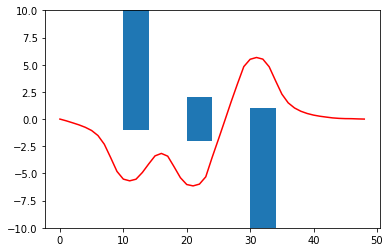

In [61]:
visualize(x).show()

In [62]:
[f1,x] = solve_ach([0,1e10,1e10],lb,ub) #Minimize the first objective (time)

Ipopt 3.13.1: max_iter=10000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.1, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:       48
Number of nonzeros in inequality constraint Jacobian.:     1782
Number of nonzeros in Lagrangian Hessian.............:      422

Total number of variables............................:       97
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       96
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total

In [63]:
print(f1)

[1.9538908379420283, 6.347046053599905, 1.1779104530789188]


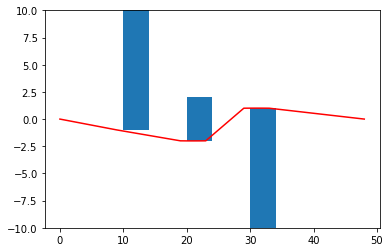

In [64]:
visualize(x).show()

In [65]:
[f2,x] = solve_ach([1e10,0,1e10],lb,ub) #Minimize the second objective (wind drag)

Ipopt 3.13.1: max_iter=10000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.1, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:       48
Number of nonzeros in inequality constraint Jacobian.:     1782
Number of nonzeros in Lagrangian Hessian.............:      422

Total number of variables............................:       97
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       96
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total

 122  4.4873026e-05 7.08e-16 4.01e-08  -5.7 7.49e-01    -  1.00e+00 1.00e+00h  1
 123  4.4884083e-05 1.03e-15 7.99e-11  -5.7 3.07e-02    -  1.00e+00 1.00e+00h  1
 124  1.8055686e-05 2.72e-06 5.52e-07  -8.6 2.12e+00    -  8.84e-01 8.46e-01h  1
 125  4.8435426e-06 3.08e-06 6.60e-07  -8.6 3.63e+00    -  9.09e-01 8.90e-01h  1
 126  7.4310430e-07 1.40e-06 3.08e-07  -8.6 3.57e+00    -  1.00e+00 9.07e-01h  1
 127  6.2440440e-08 3.87e-07 1.98e-07  -8.6 2.24e+00    -  1.00e+00 8.52e-01h  1
 128  1.1437507e-07 1.84e-08 1.08e-08  -8.6 4.36e-01    -  1.00e+00 1.00e+00h  1
 129  1.3301425e-07 1.25e-15 9.71e-10  -8.6 3.26e-02    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 129

                                   (scaled)                 (unscaled)
Objective...............:   1.3301424963598734e-07    1.3301424963598734e-07
Dual infeasibility......:   9.7050248176588067e-10    9.7050248176588067e-10
Constraint violation....:   1.2490009027033011e-15    1.2490009027033011e-15
Complementarity...

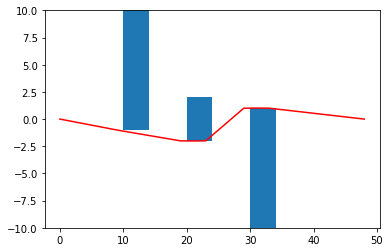

In [66]:
visualize(x).show()

In [67]:
[f3,x] = solve_ach([1e10,1e10,0],lb,ub) #Minimize the third objective (maximal course changes)

Ipopt 3.13.1: max_iter=10000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.1, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:       48
Number of nonzeros in inequality constraint Jacobian.:     1782
Number of nonzeros in Lagrangian Hessian.............:      422

Total number of variables............................:       97
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       96
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 -2.5635528e+01 2.58e+01 1.94e-02  -1.7 2.85e+02    -  4.59e-02 3.20e-05h 11
 131 -2.5182014e+01 2.60e+01 2.14e-02  -1.7 1.79e+02    -  8.35e-02 5.22e-02h  1
 132 -2.3248051e+01 2.55e+01 1.96e-02  -1.7 6.21e+01    -  6.03e-02 1.82e-01h  1
 133 -2.2510104e+01 2.37e+01 1.84e-02  -1.7 1.05e+02    -  4.32e-02 1.49e-01h  1
 134 -2.1599630e+01 2.29e+01 1.99e-02  -1.7 1.22e+02    -  1.96e-02 1.33e-01h  1
 135 -2.0613091e+01 2.25e+01 1.86e-02  -1.7 1.05e+02    -  3.24e-02 1.46e-01H  1
 136 -2.0418396e+01 2.15e+01 1.82e-02  -1.7 1.37e+02    -  5.30e-02 8.35e-02h  1
 137 -2.0019782e+01 2.16e+01 1.83e-02  -1.7 1.35e+02    -  2.37e-02 1.23e-01H  1
 138 -2.0166261e+01 2.11e+01 1.78e-02  -1.7 1.83e+02    -  2.61e-02 2.88e-02h  1
 139 -2.0331286e+01 2.13e+01 1.97e-02  -1.7 2.35e+02    -  4.51e-02 5.69e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 -2.0349118e+01 2.10e+01

 251 -5.2932023e+01 5.33e+01 1.77e-02  -1.7 2.03e+04    -  1.84e-04 6.42e-04f  1
 252 -5.3227318e+01 5.36e+01 1.77e-02  -1.7 1.23e+04    -  3.20e-04 7.20e-04f  1
 253 -5.3772604e+01 5.40e+01 1.72e-02  -1.7 1.53e+04    -  3.99e-04 7.29e-04f  1
 254 -5.4004146e+01 5.43e+01 1.70e-02  -1.7 1.11e+04    -  5.29e-04 6.92e-04f  1
 255 -5.4413992e+01 5.48e+01 1.67e-02  -1.7 1.77e+04    -  2.14e-04 6.85e-04f  1
 256 -5.4804482e+01 5.53e+01 1.77e-02  -1.7 2.14e+04    -  2.36e-04 5.42e-04f  1
 257 -5.5216533e+01 5.56e+01 1.72e-02  -1.7 2.16e+04    -  1.70e-04 5.15e-04f  1
 258 -5.5582642e+01 5.59e+01 1.91e-02  -1.7 2.29e+04    -  2.13e-04 4.73e-04f  1
 259 -5.6000074e+01 5.63e+01 1.67e-02  -1.7 2.13e+04    -  1.40e-04 5.26e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260 -5.6413585e+01 5.69e+01 1.77e-02  -1.7 2.40e+04    -  1.35e-04 4.43e-04f  1
 261 -5.6799113e+01 5.71e+01 1.72e-02  -1.7 2.54e+04    -  1.15e-04 3.76e-04f  1
 262 -5.7189292e+01 5.75e+01

 409 -7.6724059e+01 7.71e+01 1.70e-02  -1.7 4.29e+05    -  3.46e-06 3.99e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410 -7.7098856e+01 7.75e+01 2.01e-02  -1.7 4.86e+03  -5.0 1.66e-01 3.55e-03f  1
 411 -7.2870192e+01 7.39e+01 1.94e-02  -1.7 3.39e+02    -  8.07e-02 6.96e-02h  1
 412 -6.3260761e+01 6.53e+01 1.97e-02  -1.7 2.89e+02    -  5.44e-02 1.68e-01h  1
 413 -5.4735382e+01 5.66e+01 2.00e-02  -1.7 2.24e+02    -  7.31e-02 1.83e-01h  1
 414 -5.0931886e+01 5.21e+01 1.87e-02  -1.7 1.64e+02    -  1.46e-02 1.08e-01h  1
 415 -4.8816881e+01 4.99e+01 2.00e-02  -1.7 2.64e+02    -  2.41e-02 7.47e-02h  1
 416 -4.6449185e+01 4.76e+01 1.86e-02  -1.7 1.74e+02    -  1.66e-02 8.63e-02h  1
 417 -4.4951605e+01 4.54e+01 1.78e-02  -1.7 1.30e+02    -  3.37e-02 5.88e-02h  2
 418 -4.4669407e+01 4.51e+01 1.73e-02  -1.7 4.18e+02    -  3.38e-02 1.42e-02h  1
 419 -4.2495224e+01 4.36e+01 1.77e-02  -1.7 2.04e+02    -  7.30e-03 7.80e-02h  1
iter    objective    inf_pr 

 548 -2.4987901e+01 2.58e+01 1.87e-02  -1.7 2.12e+02    -  5.02e-02 4.80e-02h  1
 549 -2.5004588e+01 2.57e+01 1.84e-02  -1.7 1.31e+02    -  1.82e-02 4.87e-02h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 -2.5214898e+01 2.62e+01 1.88e-02  -1.7 2.25e+02    -  3.48e-02 5.16e-02H  1
 551 -2.5303080e+01 2.57e+01 1.82e-02  -1.7 2.12e+02    -  1.37e-02 4.22e-02f  2
 552 -2.5094496e+01 2.58e+01 1.90e-02  -1.7 2.69e+02    -  5.65e-02 4.12e-02h  1
 553 -2.4910436e+01 2.60e+01 1.79e-02  -1.7 1.50e+02    -  1.33e-02 7.06e-02h  1
 554 -2.4791958e+01 2.55e+01 1.82e-02  -1.7 2.28e+02    -  4.60e-02 5.60e-02h  1
 555 -2.4631777e+01 2.54e+01 1.71e-02  -1.7 2.60e+02    -  1.08e-02 4.57e-02H  1
 556 -2.4809164e+01 2.55e+01 1.76e-02  -1.7 4.64e+02    -  1.75e-02 2.96e-02h  1
 557 -2.4396204e+01 2.50e+01 1.77e-02  -1.7 1.35e+02    -  1.06e-02 5.50e-02h  2
 558 -2.4544150e+01 2.53e+01 1.92e-02  -1.7 3.34e+02    -  3.40e-02 3.77e-02h  1
 559 -2.4397560e+01 2.50e+01

 690 -3.8866438e+01 3.97e+01 1.89e-02  -1.7 1.56e+02    -  4.35e-02 1.10e-01h  2
 691 -3.7612283e+01 3.81e+01 1.83e-02  -1.7 1.31e+02    -  1.69e-01 5.48e-02h  1
 692 -3.6571462e+01 3.70e+01 2.12e-02  -1.7 1.53e+02    -  9.06e-02 4.63e-02h  3
 693 -3.6471360e+01 3.68e+01 1.89e-02  -1.7 1.29e+02    -  8.40e-02 5.59e-03h  5
 694 -3.6424114e+01 3.67e+01 1.73e-02  -1.7 1.45e+02    -  1.59e-01 2.44e-03h  7
 695 -3.6385204e+01 3.67e+01 1.55e-02  -1.7 1.47e+02    -  1.30e-01 1.88e-03h  7
 696 -3.6383908e+01 3.67e+01 1.43e-02  -1.7 1.57e+02    -  1.66e-01 4.74e-05h 13
 697 -2.9581825e+01 3.14e+01 2.26e-02  -1.7 1.64e+02    -  2.39e-01 2.32e-01h  1
 698 -2.4816971e+01 2.63e+01 1.93e-02  -1.7 1.06e+02    -  1.37e-01 2.25e-01h  1
 699 -2.0354966e+01 2.27e+01 2.06e-02  -1.7 8.08e+01    -  9.42e-02 3.01e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700 -1.8535179e+01 2.00e+01 1.96e-02  -1.7 4.77e+01    -  9.06e-02 1.71e-01h  1
 701 -1.7553248e+01 2.02e+01

 813 -6.7852409e+01 6.82e+01 1.72e-02  -1.7 2.75e+05    -  2.38e-06 5.95e-05f  1
 814 -6.8357767e+01 6.87e+01 1.63e-02  -1.7 2.96e+06    -  1.02e-06 5.52e-06f  1
 815 -6.8863145e+01 6.92e+01 1.74e-02  -1.7 2.26e+06    -  7.60e-07 7.26e-06f  1
 816 -6.9368181e+01 6.97e+01 1.77e-02  -1.7 3.98e+05    -  1.80e-06 4.12e-05f  1
 817 -6.9871058e+01 7.02e+01 1.72e-02  -1.7 3.58e+05    -  1.82e-06 4.58e-05f  1
 818 -7.0376075e+01 7.07e+01 1.72e-02  -1.7 4.04e+06    -  7.45e-07 4.05e-06f  1
 819 -7.0881035e+01 7.12e+01 1.72e-02  -1.7 3.06e+06    -  5.57e-07 5.35e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 820 -7.1384683e+01 7.17e+01 1.63e-02  -1.7 5.72e+05    -  1.24e-06 2.86e-05f  1
 821 -7.1887517e+01 7.22e+01 1.74e-02  -1.7 4.93e+05    -  1.30e-06 3.32e-05f  1
 822 -7.2392418e+01 7.27e+01 1.74e-02  -1.7 6.10e+06    -  4.86e-07 2.68e-06f  1
 823 -7.2897267e+01 7.32e+01 1.71e-02  -1.7 4.54e+06    -  3.71e-07 3.60e-06f  1
 824 -7.3401141e+01 7.37e+01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000 -6.3222163e+01 6.35e+01 1.60e-02  -1.7 9.86e+05    -  4.08e-06 1.37e-05f  1
1001 -6.3630425e+01 6.39e+01 1.77e-02  -1.7 8.14e+04    -  9.39e-06 1.66e-04f  1
1002 -6.4039640e+01 6.43e+01 1.68e-02  -1.7 8.99e+04    -  8.27e-06 1.50e-04f  1
1003 -6.4455384e+01 6.48e+01 1.77e-02  -1.7 1.01e+06    -  4.36e-06 1.33e-05f  1
1004 -6.4871231e+01 6.51e+01 1.68e-02  -1.7 1.22e+06    -  3.29e-06 1.11e-05f  1
1005 -6.5281862e+01 6.56e+01 1.77e-02  -1.7 1.14e+05    -  6.69e-06 1.18e-04f  1
1006 -6.5692399e+01 6.59e+01 1.68e-02  -1.7 1.11e+05    -  6.69e-06 1.21e-04f  1
1007 -6.6108296e+01 6.64e+01 1.77e-02  -1.7 1.36e+06    -  3.27e-06 9.92e-06f  1
1008 -6.6524260e+01 6.68e+01 1.67e-02  -1.7 1.57e+06    -  2.55e-06 8.60e-06f  1
1009 -6.6937070e+01 6.73e+01 1.77e-02  -1.7 1.86e+05    -  4.09e-06 7.25e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1010 -6.7348512e+01 6.76e+01

1110 -2.7649127e+01 2.83e+01 2.03e-02  -1.7 1.15e+02    -  1.01e-02 8.10e-02h  1
1111 -2.5283815e+01 2.80e+01 1.97e-02  -1.7 7.23e+01    -  2.21e-02 1.66e-01H  1
1112 -2.5332729e+01 2.76e+01 1.93e-02  -1.7 4.68e+02    -  5.27e-03 2.56e-02h  1
1113 -2.5612864e+01 2.78e+01 1.92e-02  -1.7 1.39e+03    -  4.26e-03 9.27e-03f  1
1114 -2.5776704e+01 2.77e+01 1.91e-02  -1.7 1.65e+03    -  2.11e-03 4.24e-03f  2
1115 -2.5637416e+01 2.73e+01 1.88e-02  -1.7 3.23e+02    -  3.30e-02 2.48e-02h  1
1116 -2.5020346e+01 2.61e+01 1.98e-02  -1.7 1.16e+02    -  1.05e-02 1.25e-01h  1
1117 -2.5081482e+01 2.60e+01 2.07e-02  -1.7 1.03e+03    -  1.11e-02 7.67e-03f  1
1118 -2.5056340e+01 2.57e+01 2.12e-02  -1.7 4.54e+02    -  1.34e-02 2.40e-02f  1
1119 -2.3894572e+01 2.57e+01 2.10e-02  -1.7 8.08e+01    -  1.64e-02 1.34e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 -2.3278415e+01 2.40e+01 1.99e-02  -1.7 5.48e+01    -  3.40e-02 1.11e-01h  2
1121 -2.3168830e+01 2.38e+01

1240 -3.4403416e+01 3.47e+01 1.88e-02  -1.7 5.40e+02    -  2.49e-02 1.36e-02h  1
1241 -3.3727502e+01 3.42e+01 1.97e-02  -1.7 1.52e+02    -  1.41e-02 3.59e-02h  2
1242 -3.3639907e+01 3.41e+01 1.86e-02  -1.7 4.38e+02    -  1.43e-02 2.70e-02h  1
1243 -3.3479133e+01 3.37e+01 1.93e-02  -1.7 3.95e+02    -  4.34e-03 1.82e-02h  2
1244 -3.3460579e+01 3.37e+01 1.97e-02  -1.7 5.37e+02    -  3.72e-02 1.33e-02h  1
1245 -3.1666402e+01 3.30e+01 1.96e-02  -1.7 1.07e+02    -  2.25e-02 9.66e-02h  1
1246 -3.1224387e+01 3.20e+01 1.90e-02  -1.7 1.26e+02    -  1.77e-02 3.83e-02h  3
1247 -3.1114744e+01 3.15e+01 1.95e-02  -1.7 2.57e+02    -  4.33e-02 2.36e-02h  1
1248 -3.0307851e+01 3.07e+01 1.90e-02  -1.7 7.31e+01    -  4.77e-02 4.36e-02h  3
1249 -2.9621648e+01 2.99e+01 1.97e-02  -1.7 8.14e+01    -  1.42e-01 4.07e-02h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250 -2.8478340e+01 2.91e+01 2.03e-02  -1.7 8.92e+01    -  1.29e-01 6.53e-02h  2
1251 -2.8127218e+01 2.86e+01

1367 -2.9316522e+01 3.06e+01 1.79e-02  -1.7 4.59e+02    -  1.37e-02 2.53e-02h  1
1368 -3.0079742e+01 3.13e+01 1.72e-02  -1.7 2.89e+02    -  1.29e-02 5.63e-02f  1
1369 -3.0559717e+01 3.12e+01 1.74e-02  -1.7 4.81e+02    -  3.10e-03 2.89e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1370 -3.0954562e+01 3.15e+01 1.69e-02  -1.7 1.95e+03    -  2.94e-03 7.71e-03f  1
1371 -3.1321794e+01 3.19e+01 1.68e-02  -1.7 1.37e+03    -  8.74e-04 1.43e-02f  1
1372 -3.1605200e+01 3.22e+01 1.70e-02  -1.7 8.42e+02    -  3.20e-03 2.33e-02f  1
1373 -3.1929918e+01 3.29e+01 1.80e-02  -1.7 3.71e+02    -  2.19e-03 3.71e-02f  1
1374 -3.2127560e+01 3.30e+01 1.69e-02  -1.7 2.27e+03    -  4.61e-03 5.36e-03f  1
1375 -3.2577063e+01 3.32e+01 1.76e-02  -1.7 1.34e+03    -  2.71e-03 1.17e-02f  1
1376 -3.2526138e+01 3.33e+01 1.78e-02  -1.7 2.04e+02    -  9.47e-03 3.33e-02h  2
1377 -3.2667234e+01 3.31e+01 1.72e-02  -1.7 5.73e+02    -  6.38e-02 1.95e-02h  1
1378 -3.2176540e+01 3.35e+01

1508 -5.5730392e+01 5.64e+01 1.84e-02  -1.7 3.07e+04    -  6.58e-05 5.39e-04f  1
1509 -5.6269876e+01 5.69e+01 1.84e-02  -1.7 2.84e+04    -  9.76e-05 6.14e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510 -5.6832092e+01 5.74e+01 1.84e-02  -1.7 2.13e+04    -  2.43e-05 8.21e-04f  1
1511 -5.7366522e+01 5.76e+01 1.74e-02  -1.7 3.35e+03    -  1.94e-04 3.38e-03f  1
1512 -5.7741985e+01 5.82e+01 1.74e-02  -1.7 1.12e+04    -  5.99e-04 9.74e-04f  1
1513 -5.8384906e+01 5.88e+01 1.83e-02  -1.7 1.56e+04    -  2.37e-04 1.11e-03f  1
1514 -5.9030899e+01 5.95e+01 1.73e-02  -1.7 9.33e+03    -  1.36e-04 1.85e-03f  1
1515 -5.9819359e+01 6.04e+01 1.91e-02  -1.7 7.97e+03    -  8.56e-05 2.17e-03f  1
1516 -6.0342053e+01 6.09e+01 1.83e-02  -1.7 3.12e+04    -  1.60e-05 5.46e-04f  1
1517 -6.0871430e+01 6.14e+01 1.83e-02  -1.7 1.29e+05    -  2.50e-05 1.32e-04f  1
1518 -6.1420783e+01 6.19e+01 1.91e-02  -1.7 1.95e+04    -  1.89e-05 8.85e-04f  1
1519 -6.2012082e+01 6.23e+01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640 -1.2479768e+02 1.25e+02 1.74e-02  -1.7 4.04e+06    -  2.57e-07 4.16e-06f  1
1641 -1.2531682e+02 1.26e+02 1.74e-02  -1.7 1.29e+07    -  2.38e-07 1.30e-06f  1
1642 -1.2583464e+02 1.26e+02 1.84e-02  -1.7 9.82e+05    -  5.80e-07 1.71e-05f  1
1643 -1.2635238e+02 1.27e+02 1.83e-02  -1.7 1.35e+06    -  5.21e-07 1.25e-05f  1
1644 -1.2687160e+02 1.27e+02 1.72e-02  -1.7 5.13e+06    -  2.01e-07 3.28e-06f  1
1645 -1.2739070e+02 1.28e+02 1.67e-02  -1.7 1.72e+07    -  1.76e-07 9.76e-07f  1
1646 -1.2790826e+02 1.28e+02 1.92e-02  -1.7 1.26e+06    -  4.49e-07 1.34e-05f  1
1647 -1.2842636e+02 1.29e+02 1.73e-02  -1.7 1.85e+06    -  3.75e-07 9.07e-06f  1
1648 -1.2894524e+02 1.29e+02 1.73e-02  -1.7 6.82e+06    -  1.50e-07 2.47e-06f  1
1649 -1.2946435e+02 1.30e+02 1.73e-02  -1.7 2.51e+07    -  1.19e-07 6.70e-07f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650 -1.2998231e+02 1.30e+02

1781 -1.1306630e+02 1.13e+02 1.68e-02  -1.7 1.44e+06    -  2.48e-06 1.02e-05f  1
1782 -1.1352153e+02 1.14e+02 1.73e-02  -1.7 1.52e+06    -  2.15e-06 9.67e-06f  1
1783 -1.1398575e+02 1.14e+02 1.82e-02  -1.7 2.30e+05    -  3.29e-06 6.38e-05f  1
1784 -1.1445315e+02 1.15e+02 1.73e-02  -1.7 1.46e+05    -  5.02e-06 1.01e-04f  1
1785 -1.1491133e+02 1.15e+02 1.61e-02  -1.7 1.96e+06    -  1.88e-06 7.49e-06f  1
1786 -1.1536592e+02 1.16e+02 1.73e-02  -1.7 1.96e+06    -  1.69e-06 7.51e-06f  1
1787 -1.1582550e+02 1.16e+02 1.52e-02  -1.7 3.02e+05    -  2.54e-06 4.88e-05f  1
1788 -1.1629601e+02 1.17e+02 1.91e-02  -1.7 1.81e+05    -  4.06e-06 8.11e-05f  1
1789 -1.1675261e+02 1.17e+02 1.91e-02  -1.7 2.45e+06    -  1.53e-06 5.99e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790 -1.1720923e+02 1.18e+02 1.91e-02  -1.7 2.36e+06    -  1.41e-06 6.22e-06f  1
1791 -1.1768135e+02 1.18e+02 1.50e-02  -1.7 3.74e+05    -  2.07e-06 3.93e-05f  1
1792 -1.1814258e+02 1.18e+02

1925 -1.7871957e+02 1.79e+02 1.79e-02  -1.7 5.63e+06    -  7.06e-07 2.60e-06f  1
1926 -1.7917237e+02 1.80e+02 1.79e-02  -1.7 4.94e+06    -  6.88e-07 2.97e-06f  1
1927 -1.7962613e+02 1.80e+02 1.82e-02  -1.7 8.24e+05    -  9.66e-07 1.78e-05f  1
1928 -1.8008161e+02 1.80e+02 1.91e-02  -1.7 4.18e+05    -  1.80e-06 3.51e-05f  1
1929 -1.8053453e+02 1.81e+02 1.91e-02  -1.7 5.70e+06    -  6.98e-07 2.57e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930 -1.8098750e+02 1.81e+02 1.91e-02  -1.7 5.00e+06    -  6.79e-07 2.93e-06f  1
1931 -1.8144232e+02 1.82e+02 1.68e-02  -1.7 8.33e+05    -  9.55e-07 1.76e-05f  1
1932 -1.8189775e+02 1.82e+02 1.82e-02  -1.7 4.23e+05    -  1.78e-06 3.47e-05f  1
1933 -1.8235060e+02 1.83e+02 1.82e-02  -1.7 5.77e+06    -  6.89e-07 2.54e-06f  1
1934 -1.8280349e+02 1.83e+02 1.82e-02  -1.7 5.06e+06    -  6.71e-07 2.90e-06f  1
1935 -1.8325808e+02 1.83e+02 1.91e-02  -1.7 8.43e+05    -  9.44e-07 1.74e-05f  1
1936 -1.8371335e+02 1.84e+02

2084 -2.5075948e+02 2.51e+02 1.73e-02  -1.7 7.42e+05    -  1.01e-06 1.97e-05f  1
2085 -2.5121165e+02 2.51e+02 1.68e-02  -1.7 9.92e+06    -  3.99e-07 1.48e-06f  1
2086 -2.5166382e+02 2.52e+02 1.73e-02  -1.7 8.90e+06    -  3.82e-07 1.64e-06f  1
2087 -2.5211644e+02 2.52e+02 1.82e-02  -1.7 1.40e+06    -  5.66e-07 1.05e-05f  1
2088 -2.5256944e+02 2.53e+02 1.91e-02  -1.7 7.56e+05    -  9.95e-07 1.94e-05f  1
2089 -2.5302154e+02 2.53e+02 1.91e-02  -1.7 1.01e+07    -  3.92e-07 1.45e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2090 -2.5347364e+02 2.54e+02 1.91e-02  -1.7 9.06e+06    -  3.75e-07 1.62e-06f  1
2091 -2.5392583e+02 2.54e+02 1.79e-02  -1.7 1.42e+06    -  5.58e-07 1.03e-05f  1
2092 -2.5437810e+02 2.55e+02 1.73e-02  -1.7 7.69e+05    -  9.77e-07 1.90e-05f  1
2093 -2.5483023e+02 2.55e+02 1.68e-02  -1.7 1.03e+07    -  3.85e-07 1.43e-06f  1
2094 -2.5528238e+02 2.56e+02 1.73e-02  -1.7 9.23e+06    -  3.69e-07 1.59e-06f  1
2095 -2.5573493e+02 2.56e+02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2240 -3.2126564e+02 3.22e+02 1.82e-02  -1.7 1.99e+06    -  3.77e-07 7.37e-06f  1
2241 -3.2171747e+02 3.22e+02 1.82e-02  -1.7 2.44e+07    -  1.57e-07 6.00e-07f  1
2242 -3.2216931e+02 3.22e+02 1.82e-02  -1.7 2.39e+07    -  1.42e-07 6.13e-07f  1
2243 -3.2262112e+02 3.23e+02 1.91e-02  -1.7 3.06e+06    -  2.55e-07 4.78e-06f  1
2244 -3.2307258e+02 3.23e+02 1.85e-02  -1.7 2.06e+06    -  3.62e-07 7.09e-06f  1
2245 -3.2352441e+02 3.24e+02 1.85e-02  -1.7 2.52e+07    -  1.52e-07 5.80e-07f  1
2246 -3.2397623e+02 3.24e+02 1.73e-02  -1.7 2.48e+07    -  1.37e-07 5.90e-07f  1
2247 -3.2442802e+02 3.25e+02 1.79e-02  -1.7 3.15e+06    -  2.48e-07 4.65e-06f  1
2248 -3.2487949e+02 3.25e+02 1.85e-02  -1.7 2.15e+06    -  3.48e-07 6.81e-06f  1
2249 -3.2533132e+02 3.26e+02 1.85e-02  -1.7 2.61e+07    -  1.46e-07 5.60e-07f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2250 -3.2578314e+02 3.26e+02

2363 -3.7682813e+02 3.77e+02 1.77e-02  -1.7 1.56e+07    -  4.90e-08 9.36e-07f  1
2364 -3.7727991e+02 3.78e+02 1.77e-02  -1.7 6.71e+08    -  3.95e-10 2.18e-08f  1
2365 -3.7773168e+02 3.78e+02 1.77e-02  -1.7 2.47e+08    -  1.37e-08 5.93e-08f  1
2366 -3.7818346e+02 3.79e+02 1.77e-02  -1.7 2.87e+10    -  5.29e-12 5.10e-10f  1
2367 -3.7863516e+02 3.79e+02 1.85e-02  -1.7 1.64e+07    -  4.67e-08 8.90e-07f  1
2368 -3.7908694e+02 3.79e+02 1.85e-02  -1.7 7.76e+08    -  3.18e-10 1.89e-08f  1
2369 -3.7953871e+02 3.80e+02 1.85e-02  -1.7 2.58e+08    -  1.31e-08 5.67e-08f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2370 -3.7999025e+02 3.80e+02 1.91e-02  -1.7 3.75e+06  -7.8 9.10e-04 3.90e-06f  1
2371 -3.8002236e+02 3.80e+02 1.85e-02  -1.7 9.13e+03    -  1.35e-03 8.03e-04f  1
2372 -3.7958473e+02 3.80e+02 1.91e-02  -1.7 5.84e+03    -  1.90e-04 2.69e-03h  1
2373 -3.7993558e+02 3.80e+02 1.91e-02  -1.7 4.35e+04    -  8.33e-05 3.58e-04f  1
2374 -3.8024034e+02 3.81e+02

2516 -1.3690682e+02 1.38e+02 1.96e-02  -1.7 7.20e+02    -  3.28e-02 8.31e-02h  1
2517 -1.2762328e+02 1.29e+02 1.86e-02  -1.7 6.85e+02    -  3.31e-02 8.03e-02h  2
2518 -1.2182897e+02 1.23e+02 1.81e-02  -1.7 6.16e+02    -  8.33e-02 5.87e-02h  1
2519 -1.1094959e+02 1.13e+02 1.78e-02  -1.7 5.97e+02    -  6.61e-02 1.09e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2520 -1.0414948e+02 1.05e+02 1.80e-02  -1.7 5.07e+02    -  3.88e-02 7.84e-02h  1
2521 -1.0113014e+02 1.02e+02 1.82e-02  -1.7 4.53e+02    -  2.24e-02 4.12e-02h  1
2522 -9.6444723e+01 9.76e+01 1.71e-02  -1.7 4.35e+02    -  3.00e-02 6.59e-02h  1
2523 -8.9278987e+01 9.09e+01 1.85e-02  -1.7 4.22e+02    -  3.71e-02 1.00e-01h  1
2524 -8.7116771e+01 8.79e+01 1.72e-02  -1.7 3.57e+02    -  2.42e-02 3.53e-02h  1
2525 -8.5868443e+01 8.65e+01 1.69e-02  -1.7 5.50e+02    -  1.72e-02 2.44e-02h  1
2526 -8.2085842e+01 8.29e+01 1.73e-02  -1.7 3.89e+02    -  1.66e-02 5.88e-02h  2
2527 -8.1529285e+01 8.21e+01

2659 -9.4339818e+01 9.45e+01 1.53e-02  -1.7 2.01e+05    -  1.68e-05 6.24e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2660 -9.4660069e+01 9.50e+01 2.01e-02  -1.7 1.72e+04    -  4.40e-05 7.29e-04f  1
2661 -9.5042884e+01 9.52e+01 1.65e-02  -1.7 2.84e+05    -  2.62e-05 4.41e-05f  1
2662 -9.5424512e+01 9.57e+01 2.01e-02  -1.7 2.17e+05    -  2.07e-05 5.77e-05f  1
2663 -9.5805938e+01 9.60e+01 1.62e-02  -1.7 2.03e+05    -  1.71e-05 6.18e-05f  1
2664 -9.6125331e+01 9.64e+01 2.01e-02  -1.7 1.72e+04    -  4.41e-05 7.31e-04f  1
2665 -9.6508278e+01 9.67e+01 1.74e-02  -1.7 2.84e+05    -  2.59e-05 4.41e-05f  1
2666 -9.6890035e+01 9.72e+01 2.01e-02  -1.7 2.19e+05    -  2.06e-05 5.72e-05f  1
2667 -9.7271685e+01 9.75e+01 1.74e-02  -1.7 2.04e+05    -  1.71e-05 6.14e-05f  1
2668 -9.7593470e+01 9.79e+01 2.01e-02  -1.7 1.72e+04    -  4.40e-05 7.28e-04f  1
2669 -9.7976670e+01 9.82e+01 1.82e-02  -1.7 2.85e+05    -  2.56e-05 4.40e-05f  1
iter    objective    inf_pr 

2805 -1.4659629e+02 1.47e+02 1.84e-02  -1.7 2.18e+05    -  2.29e-05 5.72e-05f  1
2806 -1.4697382e+02 1.47e+02 2.02e-02  -1.7 2.32e+05    -  2.33e-05 5.38e-05f  1
2807 -1.4735160e+02 1.48e+02 1.84e-02  -1.7 2.32e+05    -  3.19e-05 5.37e-05f  1
2808 -1.4760890e+02 1.48e+02 2.02e-02  -1.7 1.34e+04    -  5.64e-05 9.30e-04f  1
2809 -1.4798615e+02 1.48e+02 1.72e-02  -1.7 2.25e+05    -  2.24e-05 5.55e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2810 -1.4836368e+02 1.49e+02 2.02e-02  -1.7 2.38e+05    -  2.29e-05 5.25e-05f  1
2811 -1.4874142e+02 1.49e+02 1.72e-02  -1.7 2.37e+05    -  3.42e-05 5.26e-05f  1
2812 -1.4899259e+02 1.49e+02 2.02e-02  -1.7 1.31e+04    -  5.77e-05 9.53e-04f  1
2813 -1.4936940e+02 1.50e+02 1.66e-02  -1.7 2.20e+05    -  2.24e-05 5.67e-05f  1
2814 -1.4974646e+02 1.50e+02 2.02e-02  -1.7 2.36e+05    -  2.31e-05 5.28e-05f  1
2815 -1.5012372e+02 1.50e+02 1.52e-02  -1.7 2.35e+05    -  3.12e-05 5.29e-05f  1
2816 -1.5037421e+02 1.51e+02

2947 -4.3935108e+01 4.43e+01 1.88e-02  -1.7 1.82e+03    -  4.37e-04 6.79e-03f  1
2948 -4.4299840e+01 4.45e+01 1.80e-02  -1.7 1.79e+04    -  1.64e-04 6.85e-04f  1
2949 -4.4671416e+01 4.50e+01 1.88e-02  -1.7 3.27e+04    -  2.24e-04 3.77e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2950 -4.4905912e+01 4.51e+01 1.75e-02  -1.7 2.03e+03    -  3.58e-04 6.21e-03f  1
2951 -4.5154566e+01 4.55e+01 1.87e-02  -1.7 1.95e+03    -  4.07e-04 6.36e-03f  1
2952 -4.5521189e+01 4.57e+01 1.87e-02  -1.7 1.92e+04    -  1.56e-04 6.44e-04f  1
2953 -4.5894087e+01 4.63e+01 1.87e-02  -1.7 3.47e+04    -  2.07e-04 3.57e-04f  1
2954 -4.6124722e+01 4.63e+01 1.73e-02  -1.7 2.16e+03    -  3.39e-04 5.87e-03f  1
2955 -4.6361765e+01 4.67e+01 1.86e-02  -1.7 2.14e+03    -  3.77e-04 5.80e-03f  1
2956 -4.6721969e+01 4.69e+01 1.80e-02  -1.7 2.11e+04    -  1.59e-04 5.75e-04f  1
2957 -4.7087921e+01 4.75e+01 1.86e-02  -1.7 3.48e+04    -  2.05e-04 3.50e-04f  1
2958 -4.7301828e+01 4.75e+01

3061 -8.0743912e+01 8.11e+01 1.89e-02  -1.7 1.17e+05    -  6.41e-05 1.03e-04f  1
3062 -8.1106761e+01 8.13e+01 1.68e-02  -1.7 6.37e+04    -  2.93e-05 1.91e-04f  1
3063 -8.1355801e+01 8.17e+01 1.89e-02  -1.7 6.35e+03    -  1.24e-04 1.91e-03f  1
3064 -8.1721628e+01 8.19e+01 1.77e-02  -1.7 9.76e+04    -  4.11e-05 1.24e-04f  1
3065 -8.2089098e+01 8.24e+01 1.89e-02  -1.7 1.20e+05    -  6.28e-05 1.01e-04f  1
3066 -8.2450770e+01 8.26e+01 1.77e-02  -1.7 6.08e+04    -  2.73e-05 2.00e-04f  1
3067 -8.2700001e+01 8.30e+01 1.89e-02  -1.7 6.53e+03    -  1.21e-04 1.86e-03f  1
3068 -8.3066085e+01 8.32e+01 1.88e-02  -1.7 9.98e+04    -  3.99e-05 1.21e-04f  1
3069 -8.3433790e+01 8.38e+01 1.89e-02  -1.7 1.24e+05    -  6.15e-05 9.80e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3070 -8.3794773e+01 8.39e+01 1.84e-02  -1.7 5.77e+04    -  2.59e-05 2.10e-04f  1
3071 -8.4044805e+01 8.44e+01 1.89e-02  -1.7 6.69e+03    -  1.18e-04 1.81e-03f  1
3072 -8.4410964e+01 8.46e+01

3193 -8.1952765e+01 8.23e+01 1.62e-02  -1.7 2.87e+05    -  4.46e-06 5.64e-05f  1
3194 -8.2486903e+01 8.28e+01 1.91e-02  -1.7 9.29e+04    -  8.17e-06 1.74e-04f  1
3195 -8.2981841e+01 8.33e+01 1.76e-02  -1.7 5.66e+04    -  1.08e-05 2.86e-04f  1
3196 -8.3480812e+01 8.38e+01 1.76e-02  -1.7 8.20e+05    -  4.99e-06 1.97e-05f  1
3197 -8.3979117e+01 8.43e+01 1.75e-02  -1.7 3.33e+05    -  3.88e-06 4.86e-05f  1
3198 -8.4466117e+01 8.48e+01 1.72e-02  -1.7 1.04e+05    -  7.32e-06 1.56e-04f  1
3199 -8.4960314e+01 8.53e+01 1.75e-02  -1.7 6.49e+04    -  9.48e-06 2.49e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3200 -8.5461718e+01 8.58e+01 1.75e-02  -1.7 9.26e+05    -  4.41e-06 1.75e-05f  1
3201 -8.5966651e+01 8.63e+01 1.62e-02  -1.7 3.82e+05    -  3.39e-06 4.23e-05f  1
3202 -8.6489581e+01 8.68e+01 1.76e-02  -1.7 1.15e+05    -  6.57e-06 1.40e-04f  1
3203 -8.6981754e+01 8.73e+01 1.87e-02  -1.7 7.43e+04    -  8.30e-06 2.18e-04f  1
3204 -8.7483965e+01 8.78e+01

3343 -1.5677901e+02 1.57e+02 1.64e-02  -1.7 8.76e+05    -  7.13e-07 1.84e-05f  1
3344 -1.5727638e+02 1.58e+02 1.60e-02  -1.7 9.65e+06    -  4.17e-07 1.67e-06f  1
3345 -1.5777350e+02 1.58e+02 1.60e-02  -1.7 4.92e+06    -  2.64e-07 3.28e-06f  1
3346 -1.5826863e+02 1.59e+02 1.72e-02  -1.7 9.88e+05    -  7.61e-07 1.63e-05f  1
3347 -1.5876699e+02 1.59e+02 1.76e-02  -1.7 9.51e+05    -  6.57e-07 1.69e-05f  1
3348 -1.5926576e+02 1.60e+02 1.76e-02  -1.7 1.05e+07    -  3.83e-07 1.53e-06f  1
3349 -1.5976574e+02 1.60e+02 1.76e-02  -1.7 5.36e+06    -  2.42e-07 3.01e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3350 -1.6026105e+02 1.61e+02 1.91e-02  -1.7 1.08e+06    -  6.96e-07 1.49e-05f  1
3351 -1.6075627e+02 1.61e+02 1.67e-02  -1.7 1.04e+06    -  6.01e-07 1.55e-05f  1
3352 -1.6125365e+02 1.62e+02 1.67e-02  -1.7 1.15e+07    -  3.49e-07 1.40e-06f  1
3353 -1.6175082e+02 1.62e+02 1.72e-02  -1.7 5.88e+06    -  2.20e-07 2.74e-06f  1
3354 -1.6224923e+02 1.63e+02

3508 -7.5866404e+01 7.63e+01 1.87e-02  -1.7 7.41e+02    -  3.67e-03 1.23e-02h  2
3509 -7.5603948e+01 7.60e+01 1.82e-02  -1.7 3.95e+02    -  4.84e-02 4.06e-03h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3510 -7.5422689e+01 7.58e+01 1.76e-02  -1.7 3.80e+02    -  5.08e-02 2.85e-03h  5
3511 -5.9086794e+01 6.12e+01 2.19e-02  -1.7 4.07e+02    -  2.38e-01 2.43e-01h  1
3512 -5.7972694e+01 5.98e+01 1.98e-02  -1.7 2.89e+02    -  1.26e-01 2.33e-02h  3
3513 -5.7956301e+01 5.98e+01 1.81e-02  -1.7 2.71e+02    -  1.06e-01 3.60e-04h 10
3514 -5.7933426e+01 5.97e+01 1.77e-02  -1.7 2.34e+02    -  7.09e-02 6.03e-04h  9
3515 -5.7931590e+01 5.97e+01 1.85e-02  -1.7 3.03e+02    -  3.28e-02 5.29e-05h 11
3516 -5.6745540e+01 5.80e+01 1.80e-02  -1.7 2.45e+02    -  2.96e-02 2.96e-02s 20
3517 -5.5048089e+01 5.57e+01 2.03e-02  -1.7 2.30e+02    -  4.82e-02 0.00e+00S 20
3518 -5.0773127e+01 5.26e+01 2.13e-02  -1.7 2.50e+02    -  8.98e-02 1.20e-01h  1
3519 -4.5267165e+01 4.70e+01

3660 -3.9655662e+01 4.02e+01 1.76e-02  -1.7 3.10e+03    -  2.87e-04 5.30e-03f  1
3661 -4.0227701e+01 4.07e+01 1.75e-02  -1.7 8.93e+03    -  4.47e-04 1.82e-03f  1
3662 -4.0847334e+01 4.13e+01 1.91e-02  -1.7 3.08e+03    -  1.93e-04 4.54e-03f  1
3663 -4.1242163e+01 4.18e+01 1.91e-02  -1.7 1.13e+04    -  9.85e-04 1.15e-03f  1
3664 -4.1813310e+01 4.22e+01 1.75e-02  -1.7 7.99e+03    -  3.91e-04 1.82e-03f  1
3665 -4.2159354e+01 4.27e+01 1.84e-02  -1.7 3.84e+03    -  5.42e-04 3.13e-03f  1
3666 -4.2969675e+01 4.35e+01 1.89e-02  -1.7 4.34e+03    -  1.70e-04 4.22e-03f  1
3667 -4.3464468e+01 4.38e+01 1.74e-02  -1.7 2.57e+03    -  4.11e-04 5.92e-03f  1
3668 -4.3989900e+01 4.44e+01 1.91e-02  -1.7 4.02e+03    -  2.90e-04 2.71e-03f  1
3669 -4.4519284e+01 4.49e+01 1.84e-02  -1.7 1.21e+04    -  1.12e-04 1.49e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3670 -4.4841078e+01 4.53e+01 1.76e-02  -1.7 2.72e+03    -  6.15e-04 4.33e-03f  1
3671 -4.5446359e+01 4.58e+01

3782 -6.8724013e+01 6.92e+01 1.84e-02  -1.7 3.65e+02    -  4.08e-03 2.76e-02h  1
3783 -6.8806744e+01 6.92e+01 1.80e-02  -1.7 2.15e+03    -  1.47e-03 4.74e-03f  1
3784 -6.8852086e+01 6.92e+01 1.83e-02  -1.7 4.81e+03    -  1.51e-03 2.14e-03f  1
3785 -6.9063971e+01 6.94e+01 1.74e-02  -1.7 5.06e+03    -  9.68e-04 2.10e-03f  1
3786 -6.7531379e+01 6.81e+01 1.85e-02  -1.7 3.59e+02    -  4.09e-03 3.12e-02h  1
3787 -6.6617663e+01 6.70e+01 1.81e-02  -1.7 4.44e+02    -  1.75e-03 2.52e-02h  1
3788 -6.6670214e+01 6.70e+01 1.84e-02  -1.7 4.69e+03    -  1.65e-03 2.26e-03f  1
3789 -6.6850861e+01 6.71e+01 1.80e-02  -1.7 4.02e+03    -  1.12e-03 2.72e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3790 -6.5774372e+01 6.62e+01 1.86e-02  -1.7 4.43e+02    -  1.96e-03 2.47e-02h  1
3791 -6.4824506e+01 6.52e+01 1.81e-02  -1.7 4.59e+02    -  3.00e-03 2.29e-02h  1
3792 -6.4819382e+01 6.51e+01 1.85e-02  -1.7 2.90e+03    -  4.27e-03 1.84e-03f  2
3793 -6.4654616e+01 6.50e+01

3939 -2.5116503e+01 2.56e+01 1.72e-02  -1.7 3.60e+02    -  1.67e-02 2.62e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3940 -2.5117897e+01 2.58e+01 1.91e-02  -1.7 2.46e+02    -  4.09e-03 4.28e-02f  1
3941 -2.5235739e+01 2.57e+01 1.71e-02  -1.7 4.70e+02    -  1.32e-02 1.52e-02h  1
3942 -2.5661330e+01 2.65e+01 1.80e-02  -1.7 4.62e+02    -  1.04e-02 2.99e-02f  1
3943 -2.5831774e+01 2.65e+01 1.76e-02  -1.7 4.55e+02    -  1.21e-02 3.25e-02h  1
3944 -2.5864019e+01 2.63e+01 1.70e-02  -1.7 2.27e+02    -  1.10e-02 3.05e-02h  2
3945 -2.6042634e+01 2.67e+01 1.79e-02  -1.7 4.88e+02    -  1.92e-02 2.57e-02h  1
3946 -2.6363418e+01 2.71e+01 1.92e-02  -1.7 4.38e+02    -  5.12e-03 3.78e-02f  1
3947 -2.6667954e+01 2.74e+01 2.04e-02  -1.7 5.48e+02    -  2.00e-03 3.51e-02f  1
3948 -2.6869709e+01 2.73e+01 1.67e-02  -1.7 5.31e+02    -  2.91e-03 1.89e-02h  1
3949 -2.6952764e+01 2.74e+01 2.03e-02  -1.7 1.78e+03    -  5.89e-03 6.08e-03f  1
iter    objective    inf_pr 

4114 -2.1813592e+01 2.20e+01 1.91e-02  -1.7 4.38e+02    -  1.86e-02 1.12e-02h  2
4115 -2.1674795e+01 2.20e+01 1.79e-02  -1.7 2.45e+02    -  5.01e-02 2.17e-02h  2
4116 -2.1742955e+01 2.19e+01 1.85e-02  -1.7 4.32e+02    -  1.88e-02 1.23e-02h  2
4117 -2.1745834e+01 2.21e+01 1.77e-02  -1.7 3.36e+02    -  1.99e-02 1.58e-02h  2
4118 -2.1971551e+01 2.23e+01 1.83e-02  -1.7 7.75e+02    -  1.24e-02 1.28e-02h  1
4119 -2.2063913e+01 2.22e+01 1.77e-02  -1.7 6.34e+02    -  6.43e-03 1.18e-02f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4120 -2.2137044e+01 2.23e+01 1.74e-02  -1.7 9.01e+02    -  2.46e-02 4.25e-03h  2
4121 -2.2091182e+01 2.22e+01 1.76e-02  -1.7 3.38e+02    -  1.47e-02 8.70e-03h  3
4122 -2.2121067e+01 2.23e+01 1.87e-02  -1.7 6.35e+02    -  2.70e-02 5.25e-03h  2
4123 -2.2103417e+01 2.22e+01 1.76e-02  -1.7 3.69e+02    -  2.13e-02 7.98e-03h  3
4124 -2.2214540e+01 2.25e+01 1.86e-02  -1.7 8.32e+02    -  1.81e-02 7.66e-03h  1
4125 -2.2278966e+01 2.26e+01

4261 -5.5911184e+01 5.66e+01 2.05e-02  -1.7 4.44e+02    -  7.00e-03 2.20e-02h  1
4262 -5.5253096e+01 5.61e+01 2.25e-02  -1.7 8.33e+02    -  1.28e-02 1.40e-02h  1
4263 -5.4451182e+01 5.49e+01 2.10e-02  -1.7 5.22e+02    -  1.39e-03 2.63e-02h  1
4264 -4.8097846e+01 4.97e+01 2.21e-02  -1.7 2.78e+02    -  2.07e-02 1.48e-01h  1
4265 -4.6076395e+01 4.68e+01 2.05e-02  -1.7 1.89e+02    -  5.15e-03 6.70e-02h  1
4266 -4.5946912e+01 4.67e+01 2.24e-02  -1.7 1.27e+03    -  3.21e-03 8.58e-03h  1
4267 -4.6088108e+01 4.67e+01 2.03e-02  -1.7 1.99e+03    -  3.62e-03 5.56e-03f  1
4268 -4.3180313e+01 4.41e+01 2.15e-02  -1.7 2.03e+02    -  9.16e-03 8.81e-02h  1
4269 -4.3014421e+01 4.34e+01 1.87e-02  -1.7 7.42e+02    -  1.92e-03 1.99e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4270 -4.3039698e+01 4.36e+01 2.26e-02  -1.7 2.39e+03    -  2.45e-03 4.80e-03f  1
4271 -4.3149570e+01 4.34e+01 2.16e-02  -1.7 1.63e+03    -  2.77e-03 7.47e-03f  1
4272 -3.9856421e+01 4.11e+01

4417 -6.0676148e+01 6.10e+01 2.24e-02  -1.7 5.46e+03    -  1.46e-04 2.31e-03f  1
4418 -6.1055627e+01 6.12e+01 1.94e-02  -1.7 8.13e+04    -  4.22e-05 1.54e-04f  1
4419 -6.1436775e+01 6.18e+01 2.24e-02  -1.7 1.04e+05    -  6.98e-05 1.21e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4420 -6.1800772e+01 6.20e+01 1.54e-02  -1.7 2.80e+04    -  3.39e-05 4.49e-04f  1
4421 -6.2049718e+01 6.24e+01 2.25e-02  -1.7 5.30e+03    -  1.50e-04 2.37e-03f  1
4422 -6.2428238e+01 6.26e+01 1.86e-02  -1.7 7.92e+04    -  4.30e-05 1.58e-04f  1
4423 -6.2808543e+01 6.32e+01 2.24e-02  -1.7 1.02e+05    -  7.16e-05 1.24e-04f  1
4424 -6.3169529e+01 6.33e+01 1.55e-02  -1.7 2.76e+04    -  3.45e-05 4.55e-04f  1
4425 -6.3410766e+01 6.38e+01 2.25e-02  -1.7 5.16e+03    -  1.54e-04 2.44e-03f  1
4426 -6.3789175e+01 6.39e+01 1.75e-02  -1.7 7.70e+04    -  4.35e-05 1.63e-04f  1
4427 -6.4169358e+01 6.45e+01 2.25e-02  -1.7 9.95e+04    -  7.37e-05 1.26e-04f  1
4428 -6.4530457e+01 6.47e+01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4560 -2.0526270e+01 2.08e+01 1.92e-02  -1.7 2.04e+02    -  3.12e-02 2.20e-02h  2
4561 -2.0566072e+01 2.07e+01 1.72e-02  -1.7 3.42e+02    -  2.68e-02 1.05e-02h  2
4562 -2.0581405e+01 2.09e+01 1.91e-02  -1.7 3.24e+02    -  2.24e-02 1.62e-02h  2
4563 -2.0714993e+01 2.10e+01 1.86e-02  -1.7 5.22e+02    -  2.01e-02 1.60e-02h  1
4564 -2.0855526e+01 2.15e+01 1.89e-02  -1.7 3.93e+02    -  1.04e-02 3.46e-02f  1
4565 -2.1138169e+01 2.14e+01 1.82e-02  -1.7 4.38e+02    -  2.28e-03 2.95e-02f  1
4566 -2.1490856e+01 2.19e+01 1.81e-02  -1.7 2.40e+03    -  2.14e-03 5.37e-03f  1
4567 -2.1840891e+01 2.21e+01 1.78e-02  -1.7 2.44e+03    -  1.63e-03 5.92e-03f  1
4568 -2.1402314e+01 2.20e+01 1.94e-02  -1.7 1.97e+02    -  6.87e-03 5.38e-02h  1
4569 -2.1507303e+01 2.19e+01 1.93e-02  -1.7 6.24e+02    -  8.04e-03 1.04e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4570 -2.1507390e+01 2.19e+01

4716 -2.4321825e+01 2.46e+01 1.74e-02  -1.7 4.49e+03    -  7.49e-04 3.43e-03f  1
4717 -2.4402439e+01 2.50e+01 1.92e-02  -1.7 6.97e+02    -  1.44e-03 2.27e-02f  1
4718 -2.4792403e+01 2.51e+01 1.92e-02  -1.7 3.88e+03    -  8.64e-04 3.67e-03f  1
4719 -2.5192811e+01 2.57e+01 1.91e-02  -1.7 7.43e+03    -  9.35e-04 1.89e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4720 -2.5413448e+01 2.57e+01 1.70e-02  -1.7 2.35e+03    -  8.21e-04 6.33e-03f  1
4721 -2.5355937e+01 2.58e+01 1.93e-02  -1.7 6.05e+02    -  5.00e-03 1.88e-02h  1
4722 -2.5687446e+01 2.59e+01 1.75e-02  -1.7 1.58e+03    -  3.33e-03 9.04e-03f  1
4723 -2.6076180e+01 2.65e+01 1.79e-02  -1.7 3.08e+03    -  2.11e-03 4.63e-03f  1
4724 -2.5904139e+01 2.63e+01 1.95e-02  -1.7 5.50e+02    -  1.69e-03 2.99e-02h  1
4725 -2.5962784e+01 2.62e+01 1.73e-02  -1.7 9.25e+02    -  1.71e-03 8.18e-03f  2
4726 -2.6006100e+01 2.62e+01 1.94e-02  -1.7 1.16e+03    -  1.43e-02 4.34e-03h  2
4727 -2.6181097e+01 2.66e+01

4881 -5.8800063e+01 5.91e+01 1.90e-02  -1.7 1.77e+05    -  3.30e-06 7.97e-05f  1
4882 -5.9232106e+01 5.95e+01 1.71e-02  -1.7 2.73e+05    -  2.65e-06 5.16e-05f  1
4883 -5.9666659e+01 6.00e+01 1.73e-02  -1.7 2.12e+07    -  8.10e-09 6.65e-07f  1
4884 -6.0101118e+01 6.03e+01 1.71e-02  -1.7 9.43e+06    -  4.11e-07 1.49e-06f  1
4885 -6.0535485e+01 6.09e+01 1.73e-02  -1.7 6.00e+06  -7.7 4.41e-07 2.35e-06f  1
4886 -6.0968738e+01 6.12e+01 1.56e-02  -1.7 6.24e+05    -  1.12e-06 2.25e-05f  1
4887 -6.1401665e+01 6.17e+01 1.73e-02  -1.7 5.53e+05    -  7.52e-07 2.55e-05f  1
4888 -6.1835909e+01 6.21e+01 1.53e-02  -1.7 1.85e+07    -  2.89e-08 7.62e-07f  1
4889 -6.2269741e+01 6.26e+01 1.73e-02  -1.7 2.08e+06  -7.3 3.25e-06 6.77e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4890 -6.2703746e+01 6.29e+01 1.48e-02  -1.7 2.98e+06    -  2.32e-06 4.72e-06f  1
4891 -6.3116656e+01 6.35e+01 1.73e-02  -1.7 4.05e+04    -  1.52e-05 3.47e-04f  1
4892 -6.3545970e+01 6.38e+01

5057 -2.3363964e+01 2.40e+01 1.80e-02  -1.7 1.71e+02    -  9.83e-03 3.29e-02f  2
5058 -2.3501838e+01 2.39e+01 1.83e-02  -1.7 1.83e+02    -  5.44e-02 2.97e-02h  1
5059 -2.3338499e+01 2.41e+01 1.77e-02  -1.7 1.18e+02    -  1.87e-02 4.69e-02h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5060 -2.3426249e+01 2.38e+01 1.85e-02  -1.7 2.34e+02    -  5.15e-02 3.03e-02h  2
5061 -2.3464009e+01 2.37e+01 1.79e-02  -1.7 1.32e+02    -  6.97e-02 2.14e-02h  2
5062 -2.3319960e+01 2.38e+01 1.88e-02  -1.7 1.51e+02    -  6.58e-02 3.24e-02h  2
5063 -2.3313494e+01 2.37e+01 1.82e-02  -1.7 2.10e+02    -  5.70e-02 3.14e-02h  2
5064 -2.3346953e+01 2.38e+01 1.83e-02  -1.7 2.08e+02    -  4.27e-02 2.75e-02h  2
5065 -2.3635919e+01 2.40e+01 1.71e-02  -1.7 6.28e+02    -  1.35e-02 1.64e-02h  1
5066 -2.3580722e+01 2.40e+01 1.78e-02  -1.7 2.91e+02    -  2.61e-03 3.04e-02f  2
5067 -2.3756718e+01 2.41e+01 1.71e-02  -1.7 7.74e+02    -  3.43e-02 9.88e-03h  1
5068 -2.3564854e+01 2.39e+01

5197 -6.0128388e+01 6.03e+01 1.95e-02  -1.7 9.79e+04    -  7.53e-06 1.38e-04f  1
5198 -6.0545250e+01 6.09e+01 1.95e-02  -1.7 1.46e+06    -  3.33e-06 9.29e-06f  1
5199 -6.0962167e+01 6.12e+01 1.95e-02  -1.7 1.42e+06    -  2.61e-06 9.52e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5200 -6.1377820e+01 6.18e+01 1.86e-02  -1.7 4.04e+05    -  1.90e-06 3.34e-05f  1
5201 -6.1789720e+01 6.20e+01 1.95e-02  -1.7 1.38e+05    -  5.37e-06 9.83e-05f  1
5202 -6.2206752e+01 6.26e+01 1.95e-02  -1.7 2.82e+06    -  2.91e-07 4.80e-06f  1
5203 -6.2623815e+01 6.28e+01 1.95e-02  -1.7 3.05e+06    -  1.18e-06 4.43e-06f  1
5204 -6.3041054e+01 6.34e+01 1.95e-02  -1.7 1.27e+07    -  7.40e-08 1.06e-06f  1
5205 -6.3454562e+01 6.36e+01 1.80e-02  -1.7 2.00e+05    -  3.72e-06 6.77e-05f  1
5206 -6.3871662e+01 6.42e+01 1.86e-02  -1.7 6.62e+06    -  4.55e-08 2.04e-06f  1
5207 -6.4288686e+01 6.45e+01 1.54e-02  -1.7 4.59e+06    -  7.94e-07 2.94e-06f  1
5208 -6.4705401e+01 6.51e+01

5363 -9.0879521e+01 9.11e+01 1.53e-02  -1.7 2.10e+06    -  4.29e-06 5.88e-06f  1
5364 -9.1259274e+01 9.16e+01 1.78e-02  -1.7 1.43e+06    -  3.06e-06 8.63e-06f  1
5365 -9.1638813e+01 9.18e+01 1.53e-02  -1.7 1.09e+06    -  1.65e-06 1.13e-05f  1
5366 -9.2011379e+01 9.23e+01 1.78e-02  -1.7 1.38e+05    -  5.52e-06 8.96e-05f  1
5367 -9.2391407e+01 9.26e+01 1.74e-02  -1.7 2.20e+06    -  4.08e-06 5.60e-06f  1
5368 -9.2771183e+01 9.31e+01 1.78e-02  -1.7 1.50e+06    -  2.91e-06 8.22e-06f  1
5369 -9.3150760e+01 9.33e+01 1.38e-02  -1.7 1.15e+06    -  1.58e-06 1.07e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5370 -9.3523438e+01 9.38e+01 1.78e-02  -1.7 1.44e+05    -  5.28e-06 8.57e-05f  1
5371 -9.3903464e+01 9.41e+01 1.74e-02  -1.7 2.30e+06    -  3.90e-06 5.35e-06f  1
5372 -9.4283249e+01 9.46e+01 1.78e-02  -1.7 1.57e+06    -  2.79e-06 7.86e-06f  1
5373 -9.4662837e+01 9.49e+01 1.74e-02  -1.7 1.21e+06    -  1.52e-06 1.02e-05f  1
5374 -9.5035789e+01 9.53e+01

5541 -1.5835810e+02 1.59e+02 1.81e-02  -1.7 5.42e+06    -  1.44e-07 2.27e-06f  1
5542 -1.5873846e+02 1.59e+02 1.81e-02  -1.7 1.34e+08    -  2.55e-09 9.19e-08f  1
5543 -1.5911881e+02 1.59e+02 1.81e-02  -1.7 1.40e+08    -  3.72e-08 8.78e-08f  1
5544 -1.5949918e+02 1.60e+02 1.81e-02  -1.7 6.61e+08    -  3.57e-10 1.86e-08f  1
5545 -1.5987923e+02 1.60e+02 1.71e-02  -1.7 5.86e+06    -  1.34e-07 2.10e-06f  1
5546 -1.6025959e+02 1.61e+02 1.79e-02  -1.7 1.71e+08    -  1.56e-09 7.20e-08f  1
5547 -1.6063994e+02 1.61e+02 1.71e-02  -1.7 1.48e+08    -  3.57e-08 8.35e-08f  1
5548 -1.6102031e+02 1.61e+02 1.79e-02  -1.7 1.28e+09    -  1.30e-10 9.62e-09f  1
5549 -1.6140036e+02 1.62e+02 1.81e-02  -1.7 5.95e+06    -  1.33e-07 2.07e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5550 -1.6178072e+02 1.62e+02 1.81e-02  -1.7 1.92e+08    -  1.25e-09 6.43e-08f  1
5551 -1.6216108e+02 1.62e+02 1.81e-02  -1.7 1.46e+08    -  3.63e-08 8.43e-08f  1
5552 -1.6254144e+02 1.63e+02

5701 -4.3799213e+01 4.43e+01 1.57e-02  -1.7 9.90e+03    -  2.33e-04 1.34e-03f  1
5702 -4.4521336e+01 4.50e+01 1.86e-02  -1.7 5.65e+03    -  4.07e-04 2.96e-03f  1
5703 -4.5362593e+01 4.59e+01 1.68e-02  -1.7 8.86e+03    -  4.32e-04 1.89e-03f  1
5704 -4.6093334e+01 4.67e+01 1.87e-02  -1.7 2.43e+03    -  2.80e-04 7.37e-03f  1
5705 -4.6732012e+01 4.71e+01 1.85e-02  -1.7 1.13e+04    -  2.82e-04 1.25e-03f  1
5706 -4.7436305e+01 4.80e+01 1.87e-02  -1.7 6.23e+03    -  5.78e-04 2.56e-03f  1
5707 -4.7991923e+01 4.85e+01 1.66e-02  -1.7 2.33e+04    -  1.68e-04 6.83e-04f  1
5708 -4.8605859e+01 4.90e+01 1.87e-02  -1.7 1.02e+04    -  8.20e-05 1.59e-03f  1
5709 -4.9089024e+01 4.95e+01 1.70e-02  -1.7 1.44e+04    -  5.33e-05 1.12e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5710 -4.9608073e+01 5.00e+01 1.87e-02  -1.7 6.63e+04    -  3.27e-05 2.43e-04f  1
5711 -5.0112714e+01 5.04e+01 1.70e-02  -1.7 1.27e+05    -  2.35e-05 1.27e-04f  1
5712 -5.0736915e+01 5.13e+01

5876 -1.1857248e+02 1.19e+02 1.88e-02  -1.7 1.49e+03    -  7.38e-04 9.70e-03h  1
5877 -1.1493927e+02 1.16e+02 1.95e-02  -1.7 4.86e+02    -  2.66e-03 4.49e-02h  1
5878 -1.1514829e+02 1.16e+02 1.92e-02  -1.7 5.12e+03    -  1.69e-03 2.26e-03f  1
5879 -1.1517287e+02 1.16e+02 1.94e-02  -1.7 3.22e+03    -  1.38e-03 3.82e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5880 -1.1514164e+02 1.16e+02 1.91e-02  -1.7 1.83e+03    -  6.36e-04 6.72e-03h  1
5881 -1.1303443e+02 1.14e+02 1.93e-02  -1.7 4.89e+02    -  3.88e-03 2.85e-02h  1
5882 -1.1295818e+02 1.14e+02 1.87e-02  -1.7 2.76e+03    -  2.29e-03 3.23e-03h  1
5883 -1.1288841e+02 1.13e+02 1.91e-02  -1.7 2.61e+03    -  1.61e-03 5.27e-03h  1
5884 -1.1270693e+02 1.13e+02 1.71e-02  -1.7 1.78e+03    -  8.03e-04 7.69e-03h  1
5885 -1.1201669e+02 1.13e+02 1.72e-02  -1.7 1.01e+03    -  2.15e-03 1.19e-02h  1
5886 -1.1187837e+02 1.12e+02 1.93e-02  -1.7 3.06e+03    -  4.07e-03 2.99e-03h  1
5887 -1.1138351e+02 1.12e+02

6004 -5.4295710e+01 5.47e+01 1.97e-02  -1.7 2.84e+03    -  6.66e-04 6.20e-03f  1
6005 -5.4786129e+01 5.51e+01 1.71e-02  -1.7 9.49e+03    -  1.92e-04 1.87e-03f  1
6006 -5.4483695e+01 5.51e+01 1.99e-02  -1.7 9.53e+02    -  6.83e-04 1.95e-02h  1
6007 -5.4930315e+01 5.53e+01 1.98e-02  -1.7 4.79e+03    -  1.18e-04 3.71e-03f  1
6008 -5.5410068e+01 5.59e+01 1.98e-02  -1.7 1.15e+04    -  2.06e-04 1.45e-03f  1
6009 -5.5891364e+01 5.62e+01 1.71e-02  -1.7 1.21e+04    -  1.39e-04 1.40e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6010 -5.6078936e+01 5.68e+01 1.99e-02  -1.7 1.39e+03    -  4.94e-04 1.23e-02f  1
6011 -5.6379231e+01 5.68e+01 1.81e-02  -1.7 2.22e+03    -  2.57e-04 7.80e-03f  1
6012 -5.6854178e+01 5.73e+01 1.69e-02  -1.7 1.85e+04    -  1.28e-04 8.77e-04f  1
6013 -5.7330800e+01 5.77e+01 1.68e-02  -1.7 2.00e+04    -  1.09e-04 8.18e-04f  1
6014 -5.7643227e+01 5.81e+01 1.84e-02  -1.7 2.73e+03    -  2.54e-04 6.04e-03f  1
6015 -5.7974622e+01 5.83e+01

6150 -2.5555886e+01 2.63e+01 1.97e-02  -1.7 4.24e+02    -  1.19e-02 2.71e-02h  1
6151 -2.5569035e+01 2.61e+01 1.81e-02  -1.7 5.76e+02    -  2.00e-02 1.68e-02h  1
6152 -2.5672831e+01 2.62e+01 1.80e-02  -1.7 6.26e+02    -  8.45e-03 2.35e-02f  1
6153 -2.5564206e+01 2.61e+01 1.99e-02  -1.7 2.48e+02    -  4.91e-03 3.69e-02h  2
6154 -2.5767699e+01 2.64e+01 1.84e-02  -1.7 3.50e+02    -  2.31e-02 2.90e-02h  1
6155 -2.4924954e+01 2.63e+01 2.02e-02  -1.7 1.50e+02    -  1.20e-02 1.02e-01h  1
6156 -2.5299777e+01 2.64e+01 2.00e-02  -1.7 9.06e+02    -  1.16e-02 1.02e-02f  1
6157 -2.5527783e+01 2.63e+01 1.97e-02  -1.7 3.89e+02    -  1.95e-02 3.36e-02f  1
6158 -2.5707890e+01 2.63e+01 1.99e-02  -1.7 2.53e+02    -  4.58e-03 4.60e-02f  1
6159 -2.5702155e+01 2.63e+01 1.97e-02  -1.7 5.59e+02    -  1.37e-02 1.06e-02h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6160 -2.5860997e+01 2.63e+01 1.93e-02  -1.7 7.42e+02    -  1.19e-02 1.16e-02h  1
6161 -2.6117321e+01 2.66e+01

6295 -2.1186751e+01 2.24e+01 1.74e-02  -1.7 3.02e+02    -  1.04e-02 5.83e-02f  1
6296 -2.1899422e+01 2.33e+01 1.77e-02  -1.7 1.94e+02    -  1.97e-02 8.13e-02f  1
6297 -2.2406557e+01 2.33e+01 1.74e-02  -1.7 5.96e+02    -  1.07e-02 2.40e-02f  1
6298 -2.3116707e+01 2.38e+01 1.86e-02  -1.7 5.99e+02    -  4.71e-03 3.28e-02f  1
6299 -2.3550620e+01 2.40e+01 1.76e-02  -1.7 9.45e+02    -  2.50e-03 1.81e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6300 -2.3997131e+01 2.45e+01 1.79e-02  -1.7 1.52e+03    -  2.71e-03 1.29e-02f  1
6301 -2.4467621e+01 2.50e+01 1.70e-02  -1.7 1.13e+03    -  8.10e-04 1.71e-02f  1
6302 -2.5004038e+01 2.54e+01 1.79e-02  -1.7 1.55e+03    -  2.07e-03 1.26e-02f  1
6303 -2.5280286e+01 2.58e+01 1.70e-02  -1.7 9.85e+02    -  6.66e-04 1.90e-02f  1
6304 -2.5779299e+01 2.62e+01 1.83e-02  -1.7 2.54e+03    -  1.72e-03 7.15e-03f  1
6305 -2.6291788e+01 2.67e+01 1.71e-02  -1.7 2.68e+03    -  4.45e-04 7.30e-03f  1
6306 -2.6390399e+01 2.71e+01

6446 -5.4913894e+01 5.52e+01 1.87e-02  -1.7 2.50e+04    -  2.75e-05 6.08e-04f  1
6447 -5.5380492e+01 5.57e+01 1.74e-02  -1.7 3.48e+05    -  1.25e-05 4.36e-05f  1
6448 -5.5846556e+01 5.61e+01 1.87e-02  -1.7 2.51e+05    -  8.85e-06 6.06e-05f  1
6449 -5.6299659e+01 5.66e+01 1.74e-02  -1.7 4.60e+04    -  1.68e-05 3.30e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6450 -5.6743332e+01 5.70e+01 1.93e-02  -1.7 3.15e+04    -  2.18e-05 4.82e-04f  1
6451 -5.7209941e+01 5.75e+01 1.93e-02  -1.7 4.30e+05    -  1.01e-05 3.53e-05f  1
6452 -5.7675899e+01 5.80e+01 1.87e-02  -1.7 3.15e+05    -  7.08e-06 4.82e-05f  1
6453 -5.8130598e+01 5.84e+01 1.74e-02  -1.7 5.53e+04    -  1.39e-05 2.74e-04f  1
6454 -5.8578060e+01 5.89e+01 1.93e-02  -1.7 3.94e+04    -  1.75e-05 3.85e-04f  1
6455 -5.9044459e+01 5.93e+01 1.93e-02  -1.7 5.28e+05    -  8.21e-06 2.87e-05f  1
6456 -5.9510458e+01 5.98e+01 1.93e-02  -1.7 3.92e+05    -  5.70e-06 3.86e-05f  1
6457 -5.9966289e+01 6.03e+01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6600 -2.3948806e+01 2.42e+01 1.79e-02  -1.7 1.02e+03    -  1.38e-03 1.30e-02f  1
6601 -2.4058016e+01 2.46e+01 1.93e-02  -1.7 1.89e+03    -  3.86e-03 6.95e-03f  1
6602 -2.4361966e+01 2.47e+01 1.79e-02  -1.7 1.25e+03    -  1.55e-03 1.29e-02f  1
6603 -2.4079963e+01 2.46e+01 1.89e-02  -1.7 9.13e+01    -  1.42e-02 3.27e-02h  3
6604 -2.4108210e+01 2.45e+01 1.87e-02  -1.7 5.77e+02    -  1.83e-02 9.85e-03h  2
6605 -2.4120795e+01 2.43e+01 1.67e-02  -1.7 3.64e+02    -  2.56e-02 1.17e-02h  2
6606 -2.2009833e+01 2.37e+01 2.05e-02  -1.7 7.71e+01    -  2.27e-01 1.47e-01h  1
6607 -2.0541466e+01 2.18e+01 1.91e-02  -1.7 8.17e+01    -  1.10e-01 1.44e-01h  1
6608 -1.9244888e+01 2.12e+01 1.89e-02  -1.7 6.60e+01    -  4.84e-02 1.67e-01H  1
6609 -1.9108042e+01 2.01e+01 1.82e-02  -1.7 1.07e+02    -  4.52e-02 9.97e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6610 -1.9517033e+01 2.06e+01

6731 -1.7931526e+01 1.83e+01 2.26e-02  -1.7 1.74e+02    -  3.36e-02 3.27e-02h  2
6732 -1.8101676e+01 1.86e+01 1.89e-02  -1.7 3.32e+02    -  3.49e-02 3.02e-02h  1
6733 -1.8124732e+01 1.84e+01 1.92e-02  -1.7 2.25e+02    -  1.78e-02 3.71e-02f  2
6734 -1.8164597e+01 1.84e+01 1.85e-02  -1.7 3.55e+02    -  5.99e-02 1.32e-02h  2
6735 -1.8018067e+01 1.83e+01 2.16e-02  -1.7 1.99e+02    -  2.83e-02 3.15e-02h  2
6736 -1.8135987e+01 1.84e+01 1.87e-02  -1.7 4.37e+02    -  2.78e-02 1.20e-02h  2
6737 -1.8195134e+01 1.84e+01 2.09e-02  -1.7 3.67e+02    -  2.34e-02 1.62e-02h  2
6738 -1.8421937e+01 1.88e+01 1.78e-02  -1.7 7.08e+02    -  1.08e-02 1.55e-02h  1
6739 -1.8387284e+01 1.87e+01 1.90e-02  -1.7 2.93e+02    -  2.66e-03 2.85e-02f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6740 -1.8420778e+01 1.87e+01 2.12e-02  -1.7 7.00e+02    -  2.60e-02 6.41e-03h  2
6741 -1.8615380e+01 1.90e+01 1.83e-02  -1.7 5.91e+02    -  1.31e-02 1.98e-02h  1
6742 -1.8648340e+01 1.97e+01

6886 -3.2911862e+01 3.35e+01 1.92e-02  -1.7 4.10e+02    -  8.20e-03 2.95e-02h  1
6887 -3.2930767e+01 3.34e+01 2.05e-02  -1.7 5.12e+02    -  3.08e-03 2.95e-02f  1
6888 -3.2954930e+01 3.35e+01 1.91e-02  -1.7 5.24e+02    -  7.51e-03 2.76e-02f  1
6889 -3.3213612e+01 3.36e+01 1.76e-02  -1.7 1.34e+03    -  2.06e-03 1.47e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6890 -3.2955778e+01 3.35e+01 1.76e-02  -1.7 5.66e+02    -  3.10e-03 2.92e-02h  1
6891 -3.3217390e+01 3.37e+01 2.05e-02  -1.7 1.07e+03    -  4.21e-03 1.61e-02f  1
6892 -3.2755246e+01 3.32e+01 1.77e-02  -1.7 6.29e+02    -  1.17e-03 3.13e-02h  1
6893 -3.2633341e+01 3.30e+01 1.70e-02  -1.7 5.77e+02    -  1.46e-02 1.27e-02h  2
6894 -3.2679202e+01 3.29e+01 1.79e-02  -1.7 9.84e+02    -  1.04e-02 6.10e-03h  2
6895 -3.2787534e+01 3.32e+01 1.75e-02  -1.7 1.07e+03    -  8.71e-03 1.00e-02h  1
6896 -3.2939779e+01 3.32e+01 1.78e-02  -1.7 1.26e+03    -  1.66e-03 1.10e-02f  1
6897 -3.3289155e+01 3.36e+01

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7020 -2.2851646e+01 2.35e+01 1.83e-02  -1.7 5.20e+02    -  1.06e-02 2.49e-02f  1
7021 -2.3011065e+01 2.35e+01 1.85e-02  -1.7 5.08e+02    -  5.17e-03 3.35e-02f  1
7022 -2.3269360e+01 2.35e+01 1.74e-02  -1.7 1.66e+03    -  3.79e-03 5.90e-03f  2
7023 -2.3233809e+01 2.35e+01 1.96e-02  -1.7 3.84e+02    -  5.40e-02 1.53e-02h  2
7024 -2.2887549e+01 2.39e+01 1.85e-02  -1.7 2.19e+02    -  5.00e-02 5.81e-02H  1
7025 -2.2978749e+01 2.34e+01 1.84e-02  -1.7 2.45e+02    -  1.73e-02 3.89e-02f  2
7026 -2.3033494e+01 2.33e+01 1.84e-02  -1.7 2.96e+02    -  2.61e-02 2.08e-02h  2
7027 -2.2997062e+01 2.32e+01 1.67e-02  -1.7 3.63e+02    -  2.20e-02 1.78e-02h  2
7028 -2.3061546e+01 2.33e+01 1.69e-02  -1.7 7.13e+02    -  2.80e-02 9.31e-03h  2
7029 -2.3088841e+01 2.33e+01 1.65e-02  -1.7 6.14e+02    -  2.13e-02 1.07e-02h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7030 -2.3379730e+01 2.38e+01

7146 -2.2545830e+01 2.27e+01 1.72e-02  -1.7 1.38e+03    -  6.71e-03 4.43e-03h  2
7147 -2.2775868e+01 2.31e+01 1.89e-02  -1.7 1.63e+03    -  6.44e-03 7.35e-03w  1
7148 -2.3123657e+01 2.35e+01 1.92e-02  -1.7 1.36e+03    -  2.10e-03 1.30e-02w  1
7149 -2.3514664e+01 2.38e+01 1.78e-02  -1.7 1.99e+03    -  3.91e-04 8.82e-03w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7150 -2.2660849e+01 2.28e+01 1.81e-02  -1.7 1.88e+03    -  6.44e-03 3.68e-03h  1
7151 -2.2794765e+01 2.30e+01 1.91e-02  -1.7 2.19e+03    -  4.49e-03 2.74e-03h  2
7152 -2.2868810e+01 2.30e+01 1.71e-02  -1.7 2.79e+03    -  2.87e-03 1.06e-03h  3
7153 -2.2873818e+01 2.30e+01 1.93e-02  -1.7 9.79e+02    -  5.17e-02 2.58e-03h  3
7154 -2.2744154e+01 2.31e+01 1.84e-02  -1.7 3.01e+02    -  3.57e-02 1.92e-02h  2
7155 -2.2679959e+01 2.29e+01 1.94e-02  -1.7 2.87e+02    -  3.05e-02 2.24e-02h  2
7156 -2.2759479e+01 2.30e+01 1.73e-02  -1.7 5.93e+02    -  2.13e-02 1.02e-02h  2
7157 -2.2780951e+01 2.30e+01

7272 -2.1965909e+01 2.24e+01 1.85e-02  -1.7 1.24e+02    -  9.16e-02 4.36e-02h  2
7273 -2.1897630e+01 2.26e+01 1.89e-02  -1.7 1.05e+02    -  6.94e-02 5.04e-02h  2
7274 -2.2122897e+01 2.26e+01 1.75e-02  -1.7 1.75e+02    -  6.88e-02 3.06e-02h  2
7275 -2.2165420e+01 2.28e+01 1.86e-02  -1.7 1.84e+02    -  6.16e-02 3.90e-02h  2
7276 -2.2529653e+01 2.31e+01 1.77e-02  -1.7 4.93e+02    -  1.99e-02 2.54e-02h  1
7277 -2.2769805e+01 2.40e+01 1.94e-02  -1.7 2.83e+02    -  3.74e-03 6.30e-02f  1
7278 -2.2965498e+01 2.40e+01 1.91e-02  -1.7 8.89e+02    -  2.09e-02 1.34e-02h  1
7279 -2.3582838e+01 2.42e+01 1.87e-02  -1.7 4.69e+02    -  8.03e-03 3.28e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7280 -2.4072355e+01 2.50e+01 1.79e-02  -1.7 4.20e+02    -  3.16e-03 3.65e-02f  1
7281 -2.4684890e+01 2.53e+01 1.79e-02  -1.7 4.29e+02    -  3.22e-03 3.08e-02f  1
7282 -2.5095350e+01 2.55e+01 1.75e-02  -1.7 2.34e+03    -  1.93e-03 5.89e-03f  1
7283 -2.5527138e+01 2.60e+01

7367 -2.2244737e+01 2.25e+01 1.85e-02  -1.7 3.73e+02    -  1.66e-02 1.99e-02h  2
7368 -2.2266933e+01 2.25e+01 1.99e-02  -1.7 4.28e+02    -  1.96e-02 1.25e-02h  2
7369 -2.2328893e+01 2.26e+01 1.75e-02  -1.7 5.42e+02    -  1.24e-02 1.13e-02h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7370 -2.2433977e+01 2.26e+01 1.69e-02  -1.7 9.80e+02    -  1.05e-02 5.86e-03h  2
7371 -2.2524844e+01 2.27e+01 1.74e-02  -1.7 1.11e+03    -  7.75e-03 5.43e-03h  2
7372 -2.2813239e+01 2.32e+01 1.68e-02  -1.7 2.10e+03    -  3.68e-03 5.57e-03h  1
7373 -2.2934634e+01 2.31e+01 1.74e-02  -1.7 8.50e+02    -  8.13e-04 1.03e-02f  2
7374 -2.2969537e+01 2.32e+01 1.86e-02  -1.7 1.20e+03    -  3.06e-02 3.91e-03h  2
7375 -2.3046294e+01 2.32e+01 1.72e-02  -1.7 6.90e+02    -  1.05e-02 9.40e-03h  2
7376 -2.3154970e+01 2.33e+01 1.80e-02  -1.7 9.33e+02    -  8.35e-03 5.84e-03h  2
7377 -2.3403855e+01 2.37e+01 1.98e-02  -1.7 1.63e+03    -  6.00e-03 7.29e-03h  1
7378 -2.3767180e+01 2.42e+01

7475 -3.4763226e+01 3.51e+01 1.84e-02  -1.7 4.14e+03    -  1.60e-04 4.16e-03f  1
7476 -3.5201720e+01 3.55e+01 1.95e-02  -1.7 4.30e+03    -  1.42e-04 4.04e-03f  1
7477 -3.5712870e+01 3.61e+01 1.71e-02  -1.7 3.90e+04    -  5.07e-05 4.32e-04f  1
7478 -3.6224218e+01 3.65e+01 1.71e-02  -1.7 4.20e+04    -  4.65e-05 4.02e-04f  1
7479 -3.6690361e+01 3.71e+01 1.81e-02  -1.7 6.99e+03    -  9.47e-05 2.44e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7480 -3.7147390e+01 3.74e+01 1.74e-02  -1.7 6.45e+03    -  9.90e-05 2.65e-03f  1
7481 -3.7657954e+01 3.80e+01 1.74e-02  -1.7 5.94e+04    -  3.28e-05 2.83e-04f  1
7482 -3.8170008e+01 3.84e+01 1.74e-02  -1.7 6.91e+04    -  3.02e-05 2.43e-04f  1
7483 -3.8646162e+01 3.90e+01 1.81e-02  -1.7 1.07e+04    -  6.16e-05 1.58e-03f  1
7484 -3.9111547e+01 3.94e+01 1.71e-02  -1.7 9.92e+03    -  6.60e-05 1.70e-03f  1
7485 -3.9622897e+01 4.00e+01 1.70e-02  -1.7 8.83e+04    -  2.15e-05 1.89e-04f  1
7486 -4.0135031e+01 4.04e+01

7591 -4.5507723e+01 4.58e+01 1.64e-02  -1.7 1.10e+04    -  3.26e-04 1.30e-03f  1
7592 -4.6023586e+01 4.66e+01 1.73e-02  -1.7 2.69e+03    -  1.28e-03 5.04e-03f  1
7593 -4.6475487e+01 4.68e+01 1.97e-02  -1.7 4.84e+03    -  1.01e-03 2.81e-03f  1
7594 -4.6773609e+01 4.71e+01 1.67e-02  -1.7 8.24e+03    -  1.25e-03 1.14e-03f  1
7595 -4.7347772e+01 4.78e+01 1.75e-02  -1.7 3.87e+03    -  1.29e-03 3.11e-03f  1
7596 -4.7669285e+01 4.81e+01 1.97e-02  -1.7 8.49e+03    -  6.34e-04 1.24e-03f  1
7597 -4.8162415e+01 4.84e+01 1.73e-02  -1.7 4.76e+03    -  3.12e-04 2.61e-03f  1
7598 -4.8277200e+01 4.86e+01 1.68e-02  -1.7 2.93e+03    -  6.88e-04 2.26e-03f  1
7599 -4.8898747e+01 4.94e+01 1.71e-02  -1.7 8.70e+03    -  5.71e-04 1.64e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7600 -4.9571355e+01 5.00e+01 1.70e-02  -1.7 6.08e+03    -  2.39e-04 2.33e-03f  1
7601 -5.0153186e+01 5.06e+01 1.97e-02  -1.7 4.36e+03    -  2.87e-04 3.12e-03f  1
7602 -5.0472132e+01 5.09e+01

7711 -9.8245145e+01 9.85e+01 1.97e-02  -1.7 1.61e+05    -  4.66e-06 8.64e-05f  1
7712 -9.8674711e+01 9.90e+01 1.74e-02  -1.7 1.32e+06    -  2.69e-06 1.06e-05f  1
7713 -9.9104416e+01 9.93e+01 1.74e-02  -1.7 2.04e+06    -  2.11e-06 6.84e-06f  1
7714 -9.9526537e+01 9.99e+01 1.76e-02  -1.7 1.13e+05    -  6.69e-06 1.24e-04f  1
7715 -9.9952258e+01 1.00e+02 1.71e-02  -1.7 1.67e+05    -  4.49e-06 8.34e-05f  1
7716 -1.0038169e+02 1.01e+02 1.71e-02  -1.7 1.37e+06    -  2.59e-06 1.02e-05f  1
7717 -1.0081146e+02 1.01e+02 1.68e-02  -1.7 2.11e+06    -  2.03e-06 6.59e-06f  1
7718 -1.0123513e+02 1.02e+02 1.97e-02  -1.7 1.17e+05    -  6.43e-06 1.19e-04f  1
7719 -1.0166043e+02 1.02e+02 1.74e-02  -1.7 1.74e+05    -  4.33e-06 8.03e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7720 -1.0208984e+02 1.02e+02 1.74e-02  -1.7 1.42e+06    -  2.49e-06 9.79e-06f  1
7721 -1.0251951e+02 1.03e+02 1.66e-02  -1.7 2.20e+06    -  1.95e-06 6.34e-06f  1
7722 -1.0294167e+02 1.03e+02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7830 -1.4913885e+02 1.49e+02 1.71e-02  -1.7 3.72e+06    -  2.00e-07 3.74e-06f  1
7831 -1.4956766e+02 1.50e+02 1.66e-02  -1.7 1.77e+06    -  4.27e-07 7.86e-06f  1
7832 -1.4999722e+02 1.50e+02 1.71e-02  -1.7 3.03e+07    -  1.24e-07 4.59e-07f  1
7833 -1.5042678e+02 1.51e+02 1.66e-02  -1.7 3.02e+07    -  1.37e-07 4.60e-07f  1
7834 -1.5085637e+02 1.51e+02 1.71e-02  -1.7 5.68e+07    -  1.10e-08 2.45e-07f  1
7835 -1.5128533e+02 1.52e+02 1.72e-02  -1.7 2.47e+06    -  3.07e-07 5.64e-06f  1
7836 -1.5171493e+02 1.52e+02 1.72e-02  -1.7 7.82e+07    -  4.22e-09 1.78e-07f  1
7837 -1.5214451e+02 1.52e+02 1.72e-02  -1.7 5.62e+07    -  7.36e-08 2.47e-07f  1
7838 -1.5257046e+02 1.53e+02 1.98e-02  -1.7 4.33e+05  -6.9 9.91e-03 3.21e-05f  1
7839 -1.5100004e+02 1.52e+02 1.85e-02  -1.7 8.42e+02    -  1.42e-02 1.48e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7840 -1.4634034e+02 1.47e+02

7928 -1.4587814e+02 1.46e+02 1.76e-02  -1.7 1.50e+05    -  5.08e-06 8.35e-05f  1
7929 -1.4626240e+02 1.47e+02 1.81e-02  -1.7 1.27e+06    -  3.10e-06 9.82e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7930 -1.4664720e+02 1.47e+02 1.62e-02  -1.7 2.08e+06    -  2.74e-06 5.99e-06f  1
7931 -1.4701482e+02 1.47e+02 1.81e-02  -1.7 9.97e+04    -  7.54e-06 1.25e-04f  1
7932 -1.4738977e+02 1.48e+02 1.76e-02  -1.7 1.67e+05    -  4.55e-06 7.47e-05f  1
7933 -1.4777414e+02 1.48e+02 1.81e-02  -1.7 1.40e+06    -  2.82e-06 8.92e-06f  1
7934 -1.4815898e+02 1.48e+02 1.75e-02  -1.7 2.30e+06    -  2.49e-06 5.43e-06f  1
7935 -1.4852787e+02 1.49e+02 1.81e-02  -1.7 1.07e+05    -  7.01e-06 1.16e-04f  1
7936 -1.4890382e+02 1.49e+02 1.76e-02  -1.7 1.82e+05    -  4.17e-06 6.85e-05f  1
7937 -1.4928824e+02 1.50e+02 1.81e-02  -1.7 1.51e+06    -  2.62e-06 8.28e-06f  1
7938 -1.4967310e+02 1.50e+02 1.76e-02  -1.7 2.48e+06    -  2.32e-06 5.04e-06f  1
7939 -1.5004270e+02 1.50e+02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8040 -1.8830027e+02 1.88e+02 1.62e-02  -1.7 2.36e+05    -  3.23e-06 5.29e-05f  1
8041 -1.8868428e+02 1.89e+02 1.81e-02  -1.7 1.88e+06    -  2.12e-06 6.65e-06f  1
8042 -1.8906874e+02 1.89e+02 1.66e-02  -1.7 3.07e+06    -  1.87e-06 4.06e-06f  1
8043 -1.8943661e+02 1.90e+02 1.81e-02  -1.7 1.33e+05    -  5.68e-06 9.37e-05f  1
8044 -1.8981236e+02 1.90e+02 1.76e-02  -1.7 2.36e+05    -  3.23e-06 5.29e-05f  1
8045 -1.9019633e+02 1.90e+02 1.81e-02  -1.7 1.88e+06    -  2.12e-06 6.64e-06f  1
8046 -1.9058079e+02 1.91e+02 1.62e-02  -1.7 3.07e+06    -  1.87e-06 4.06e-06f  1
8047 -1.9094849e+02 1.91e+02 1.81e-02  -1.7 1.33e+05    -  5.68e-06 9.37e-05f  1
8048 -1.9132385e+02 1.92e+02 1.76e-02  -1.7 2.36e+05    -  3.22e-06 5.29e-05f  1
8049 -1.9170781e+02 1.92e+02 1.81e-02  -1.7 1.88e+06    -  2.12e-06 6.64e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8050 -1.9209225e+02 1.92e+02

8160 -2.3354419e+02 2.34e+02 1.66e-02  -1.7 2.39e+05    -  3.18e-06 5.21e-05f  1
8161 -2.3392750e+02 2.34e+02 1.82e-02  -1.7 1.91e+06    -  2.11e-06 6.54e-06f  1
8162 -2.3431140e+02 2.35e+02 1.62e-02  -1.7 3.10e+06    -  1.85e-06 4.02e-06f  1
8163 -2.3467500e+02 2.35e+02 1.82e-02  -1.7 1.34e+05    -  5.63e-06 9.28e-05f  1
8164 -2.3504799e+02 2.35e+02 1.91e-02  -1.7 2.39e+05    -  3.18e-06 5.21e-05f  1
8165 -2.3543128e+02 2.36e+02 1.91e-02  -1.7 1.91e+06    -  2.11e-06 6.54e-06f  1
8166 -2.3581515e+02 2.36e+02 1.91e-02  -1.7 3.10e+06    -  1.85e-06 4.02e-06f  1
8167 -2.3617842e+02 2.36e+02 1.82e-02  -1.7 1.34e+05    -  5.63e-06 9.28e-05f  1
8168 -2.3655130e+02 2.37e+02 1.75e-02  -1.7 2.39e+05    -  3.18e-06 5.21e-05f  1
8169 -2.3693461e+02 2.37e+02 1.82e-02  -1.7 1.91e+06    -  2.11e-06 6.53e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8170 -2.3731848e+02 2.38e+02 1.75e-02  -1.7 3.10e+06    -  1.85e-06 4.02e-06f  1
8171 -2.3768222e+02 2.38e+02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8280 -2.7854113e+02 2.79e+02 1.91e-02  -1.7 2.41e+05    -  3.15e-06 5.16e-05f  1
8281 -2.7892381e+02 2.79e+02 1.91e-02  -1.7 1.92e+06    -  2.11e-06 6.48e-06f  1
8282 -2.7930715e+02 2.79e+02 1.91e-02  -1.7 3.11e+06    -  1.84e-06 4.01e-06f  1
8283 -2.7966655e+02 2.80e+02 1.82e-02  -1.7 1.35e+05    -  5.63e-06 9.25e-05f  1
8284 -2.8003713e+02 2.80e+02 1.68e-02  -1.7 2.41e+05    -  3.15e-06 5.16e-05f  1
8285 -2.8041975e+02 2.81e+02 1.82e-02  -1.7 1.92e+06    -  2.11e-06 6.48e-06f  1
8286 -2.8080305e+02 2.81e+02 1.68e-02  -1.7 3.11e+06    -  1.84e-06 4.01e-06f  1
8287 -2.8116204e+02 2.81e+02 1.82e-02  -1.7 1.35e+05    -  5.63e-06 9.25e-05f  1
8288 -2.8153243e+02 2.82e+02 1.76e-02  -1.7 2.41e+05    -  3.15e-06 5.16e-05f  1
8289 -2.8191503e+02 2.82e+02 1.82e-02  -1.7 1.92e+06    -  2.11e-06 6.48e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8290 -2.8229831e+02 2.82e+02

8394 -3.2107598e+02 3.21e+02 1.91e-02  -1.7 3.10e+06    -  1.84e-06 4.01e-06f  1
8395 -3.2143082e+02 3.22e+02 1.82e-02  -1.7 1.34e+05    -  5.64e-06 9.26e-05f  1
8396 -3.2179897e+02 3.22e+02 1.75e-02  -1.7 2.42e+05    -  3.14e-06 5.14e-05f  1
8397 -3.2218101e+02 3.22e+02 1.82e-02  -1.7 1.93e+06    -  2.12e-06 6.45e-06f  1
8398 -3.2256378e+02 3.23e+02 1.68e-02  -1.7 3.10e+06    -  1.84e-06 4.01e-06f  1
8399 -3.2291865e+02 3.23e+02 1.82e-02  -1.7 1.34e+05    -  5.64e-06 9.26e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8400 -3.2328668e+02 3.23e+02 1.75e-02  -1.7 2.42e+05    -  3.14e-06 5.14e-05f  1
8401 -3.2366866e+02 3.24e+02 1.82e-02  -1.7 1.93e+06    -  2.12e-06 6.45e-06f  1
8402 -3.2405142e+02 3.24e+02 1.66e-02  -1.7 3.10e+06    -  1.84e-06 4.02e-06f  1
8403 -3.2440592e+02 3.25e+02 1.82e-02  -1.7 1.34e+05    -  5.64e-06 9.26e-05f  1
8404 -3.2477377e+02 3.25e+02 1.75e-02  -1.7 2.42e+05    -  3.14e-06 5.14e-05f  1
8405 -3.2515573e+02 3.25e+02

8503 -3.6149314e+02 3.62e+02 1.91e-02  -1.7 1.34e+05    -  5.67e-06 9.30e-05f  1
8504 -3.6185895e+02 3.62e+02 1.76e-02  -1.7 2.42e+05    -  3.14e-06 5.14e-05f  1
8505 -3.6224036e+02 3.63e+02 1.83e-02  -1.7 1.93e+06    -  2.14e-06 6.45e-06f  1
8506 -3.6262261e+02 3.63e+02 1.68e-02  -1.7 3.08e+06    -  1.85e-06 4.03e-06f  1
8507 -3.6297317e+02 3.63e+02 1.83e-02  -1.7 1.34e+05    -  5.68e-06 9.30e-05f  1
8508 -3.6333860e+02 3.64e+02 1.76e-02  -1.7 2.42e+05    -  3.14e-06 5.14e-05f  1
8509 -3.6371997e+02 3.64e+02 1.83e-02  -1.7 1.93e+06    -  2.14e-06 6.45e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8510 -3.6410220e+02 3.64e+02 1.76e-02  -1.7 3.08e+06    -  1.85e-06 4.04e-06f  1
8511 -3.6445239e+02 3.65e+02 1.91e-02  -1.7 1.34e+05    -  5.68e-06 9.30e-05f  1
8512 -3.6481799e+02 3.65e+02 1.68e-02  -1.7 2.42e+05    -  3.14e-06 5.14e-05f  1
8513 -3.6519934e+02 3.65e+02 1.83e-02  -1.7 1.93e+06    -  2.14e-06 6.45e-06f  1
8514 -3.6558156e+02 3.66e+02

8709 -4.3733656e+02 4.38e+02 1.83e-02  -1.7 1.91e+06    -  2.19e-06 6.48e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8710 -4.3771783e+02 4.38e+02 1.69e-02  -1.7 3.03e+06    -  1.87e-06 4.10e-06f  1
8711 -4.3806033e+02 4.38e+02 1.83e-02  -1.7 1.32e+05    -  5.77e-06 9.43e-05f  1
8712 -4.3842133e+02 4.39e+02 1.68e-02  -1.7 2.40e+05    -  3.16e-06 5.17e-05f  1
8713 -4.3880156e+02 4.39e+02 1.83e-02  -1.7 1.91e+06    -  2.19e-06 6.48e-06f  1
8714 -4.3918282e+02 4.39e+02 1.68e-02  -1.7 3.03e+06    -  1.87e-06 4.10e-06f  1
8715 -4.3952543e+02 4.40e+02 1.91e-02  -1.7 1.32e+05    -  5.77e-06 9.43e-05f  1
8716 -4.3988648e+02 4.40e+02 1.71e-02  -1.7 2.40e+05    -  3.16e-06 5.17e-05f  1
8717 -4.4026666e+02 4.41e+02 1.83e-02  -1.7 1.91e+06    -  2.19e-06 6.48e-06f  1
8718 -4.4064788e+02 4.41e+02 1.71e-02  -1.7 3.03e+06    -  1.87e-06 4.10e-06f  1
8719 -4.4098982e+02 4.41e+02 1.91e-02  -1.7 1.31e+05    -  5.78e-06 9.44e-05f  1
iter    objective    inf_pr 

8829 -4.8114893e+02 4.81e+02 1.84e-02  -1.7 1.90e+06    -  2.22e-06 6.52e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8830 -4.8152963e+02 4.82e+02 1.69e-02  -1.7 2.99e+06    -  1.89e-06 4.15e-06f  1
8831 -4.8186708e+02 4.82e+02 1.91e-02  -1.7 1.30e+05    -  5.85e-06 9.54e-05f  1
8832 -4.8222510e+02 4.82e+02 1.68e-02  -1.7 2.38e+05    -  3.18e-06 5.21e-05f  1
8833 -4.8260463e+02 4.83e+02 1.84e-02  -1.7 1.90e+06    -  2.22e-06 6.52e-06f  1
8834 -4.8298529e+02 4.83e+02 1.62e-02  -1.7 2.99e+06    -  1.89e-06 4.15e-06f  1
8835 -4.8332218e+02 4.84e+02 1.91e-02  -1.7 1.30e+05    -  5.85e-06 9.54e-05f  1
8836 -4.8368030e+02 4.84e+02 1.68e-02  -1.7 2.38e+05    -  3.19e-06 5.21e-05f  1
8837 -4.8405981e+02 4.84e+02 1.84e-02  -1.7 1.90e+06    -  2.23e-06 6.52e-06f  1
8838 -4.8444046e+02 4.85e+02 1.68e-02  -1.7 2.99e+06    -  1.89e-06 4.15e-06f  1
8839 -4.8477780e+02 4.85e+02 1.84e-02  -1.7 1.30e+05    -  5.86e-06 9.55e-05f  1
iter    objective    inf_pr 

8942 -5.2217056e+02 5.22e+02 1.91e-02  -1.7 2.95e+06    -  1.91e-06 4.20e-06f  1
8943 -5.2250322e+02 5.23e+02 1.84e-02  -1.7 1.28e+05    -  5.94e-06 9.66e-05f  1
8944 -5.2285873e+02 5.23e+02 1.62e-02  -1.7 2.36e+05    -  3.21e-06 5.25e-05f  1
8945 -5.2323759e+02 5.24e+02 1.84e-02  -1.7 1.88e+06    -  2.26e-06 6.58e-06f  1
8946 -5.2361767e+02 5.24e+02 1.62e-02  -1.7 2.94e+06    -  1.91e-06 4.21e-06f  1
8947 -5.2394976e+02 5.24e+02 1.91e-02  -1.7 1.28e+05    -  5.94e-06 9.66e-05f  1
8948 -5.2430507e+02 5.24e+02 1.69e-02  -1.7 2.36e+05    -  3.21e-06 5.25e-05f  1
8949 -5.2468391e+02 5.25e+02 1.84e-02  -1.7 1.88e+06    -  2.26e-06 6.58e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8950 -5.2506398e+02 5.25e+02 1.69e-02  -1.7 2.94e+06    -  1.91e-06 4.21e-06f  1
8951 -5.2539601e+02 5.26e+02 1.84e-02  -1.7 1.28e+05    -  5.94e-06 9.67e-05f  1
8952 -5.2575136e+02 5.26e+02 1.73e-02  -1.7 2.36e+05    -  3.22e-06 5.25e-05f  1
8953 -5.2613021e+02 5.26e+02

9059 -5.6432761e+02 5.65e+02 1.86e-02  -1.7 1.26e+05    -  6.03e-06 9.80e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9060 -5.6468005e+02 5.65e+02 1.76e-02  -1.7 2.33e+05    -  3.25e-06 5.31e-05f  1
9061 -5.6505827e+02 5.65e+02 1.84e-02  -1.7 1.86e+06    -  2.30e-06 6.64e-06f  1
9062 -5.6543778e+02 5.66e+02 1.73e-02  -1.7 2.90e+06    -  1.94e-06 4.27e-06f  1
9063 -5.6576495e+02 5.66e+02 1.86e-02  -1.7 1.26e+05    -  6.03e-06 9.81e-05f  1
9064 -5.6611748e+02 5.66e+02 1.76e-02  -1.7 2.33e+05    -  3.25e-06 5.31e-05f  1
9065 -5.6649565e+02 5.67e+02 1.84e-02  -1.7 1.86e+06    -  2.30e-06 6.65e-06f  1
9066 -5.6687514e+02 5.67e+02 1.69e-02  -1.7 2.90e+06    -  1.94e-06 4.27e-06f  1
9067 -5.6720206e+02 5.67e+02 1.84e-02  -1.7 1.26e+05    -  6.04e-06 9.81e-05f  1
9068 -5.6755434e+02 5.68e+02 1.76e-02  -1.7 2.33e+05    -  3.25e-06 5.31e-05f  1
9069 -5.6793250e+02 5.68e+02 1.84e-02  -1.7 1.86e+06    -  2.31e-06 6.65e-06f  1
iter    objective    inf_pr 

9259 -6.3578207e+02 6.36e+02 1.91e-02  -1.7 1.22e+05    -  6.22e-06 1.01e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9260 -6.3612933e+02 6.36e+02 1.76e-02  -1.7 2.27e+05    -  3.33e-06 5.43e-05f  1
9261 -6.3650632e+02 6.37e+02 1.85e-02  -1.7 1.82e+06    -  2.39e-06 6.80e-06f  1
9262 -6.3688478e+02 6.37e+02 1.58e-02  -1.7 2.81e+06    -  1.99e-06 4.40e-06f  1
9263 -6.3720214e+02 6.37e+02 1.86e-02  -1.7 1.22e+05    -  6.23e-06 1.01e-04f  1
9264 -6.3754943e+02 6.38e+02 1.76e-02  -1.7 2.27e+05    -  3.33e-06 5.43e-05f  1
9265 -6.3792641e+02 6.38e+02 1.85e-02  -1.7 1.82e+06    -  2.39e-06 6.80e-06f  1
9266 -6.3830488e+02 6.38e+02 1.76e-02  -1.7 2.81e+06    -  1.99e-06 4.40e-06f  1
9267 -6.3862232e+02 6.39e+02 1.85e-02  -1.7 1.22e+05    -  6.23e-06 1.01e-04f  1
9268 -6.3896935e+02 6.39e+02 1.86e-02  -1.7 2.27e+05    -  3.33e-06 5.44e-05f  1
9269 -6.3934629e+02 6.40e+02 1.86e-02  -1.7 1.81e+06    -  2.39e-06 6.80e-06f  1
iter    objective    inf_pr 

9371 -6.7541898e+02 6.76e+02 1.91e-02  -1.7 1.20e+05    -  6.35e-06 1.03e-04f  1
9372 -6.7576335e+02 6.76e+02 1.73e-02  -1.7 2.24e+05    -  3.38e-06 5.51e-05f  1
9373 -6.7613960e+02 6.76e+02 1.85e-02  -1.7 1.79e+06    -  2.44e-06 6.90e-06f  1
9374 -6.7651746e+02 6.77e+02 1.62e-02  -1.7 2.75e+06    -  2.03e-06 4.48e-06f  1
9375 -6.7682915e+02 6.77e+02 1.86e-02  -1.7 1.20e+05    -  6.35e-06 1.03e-04f  1
9376 -6.7717335e+02 6.77e+02 1.76e-02  -1.7 2.24e+05    -  3.38e-06 5.51e-05f  1
9377 -6.7754959e+02 6.78e+02 1.85e-02  -1.7 1.79e+06    -  2.44e-06 6.90e-06f  1
9378 -6.7792743e+02 6.78e+02 1.69e-02  -1.7 2.75e+06    -  2.03e-06 4.48e-06f  1
9379 -6.7823910e+02 6.79e+02 1.86e-02  -1.7 1.20e+05    -  6.36e-06 1.03e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9380 -6.7858310e+02 6.79e+02 1.76e-02  -1.7 2.24e+05    -  3.38e-06 5.52e-05f  1
9381 -6.7895932e+02 6.79e+02 1.85e-02  -1.7 1.79e+06    -  2.44e-06 6.90e-06f  1
9382 -6.7933716e+02 6.80e+02

9481 -7.1408719e+02 7.14e+02 1.86e-02  -1.7 1.76e+06    -  2.49e-06 7.00e-06f  1
9482 -7.1446446e+02 7.15e+02 1.48e-02  -1.7 2.70e+06    -  2.07e-06 4.57e-06f  1
9483 -7.1477043e+02 7.15e+02 1.86e-02  -1.7 1.18e+05    -  6.48e-06 1.05e-04f  1
9484 -7.1511143e+02 7.15e+02 1.76e-02  -1.7 2.20e+05    -  3.44e-06 5.60e-05f  1
9485 -7.1548698e+02 7.16e+02 1.86e-02  -1.7 1.76e+06    -  2.49e-06 7.01e-06f  1
9486 -7.1586424e+02 7.16e+02 1.73e-02  -1.7 2.70e+06    -  2.07e-06 4.57e-06f  1
9487 -7.1617023e+02 7.16e+02 1.86e-02  -1.7 1.18e+05    -  6.48e-06 1.05e-04f  1
9488 -7.1651119e+02 7.17e+02 1.91e-02  -1.7 2.20e+05    -  3.44e-06 5.61e-05f  1
9489 -7.1688673e+02 7.17e+02 1.91e-02  -1.7 1.76e+06    -  2.49e-06 7.01e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9490 -7.1726399e+02 7.17e+02 1.68e-02  -1.7 2.69e+06    -  2.07e-06 4.57e-06f  1
9491 -7.1756975e+02 7.18e+02 1.86e-02  -1.7 1.17e+05    -  6.49e-06 1.05e-04f  1
9492 -7.1791074e+02 7.18e+02

9574 -7.4657355e+02 7.47e+02 1.76e-02  -1.7 2.65e+06    -  2.10e-06 4.65e-06f  1
9575 -7.4687497e+02 7.47e+02 1.86e-02  -1.7 1.16e+05    -  6.60e-06 1.07e-04f  1
9576 -7.4721334e+02 7.47e+02 1.73e-02  -1.7 2.17e+05    -  3.49e-06 5.68e-05f  1
9577 -7.4758826e+02 7.48e+02 1.86e-02  -1.7 1.73e+06    -  2.54e-06 7.11e-06f  1
9578 -7.4796500e+02 7.48e+02 1.69e-02  -1.7 2.65e+06    -  2.10e-06 4.65e-06f  1
9579 -7.4826602e+02 7.49e+02 1.86e-02  -1.7 1.16e+05    -  6.60e-06 1.07e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9580 -7.4860451e+02 7.49e+02 1.91e-02  -1.7 2.17e+05    -  3.49e-06 5.69e-05f  1
9581 -7.4897943e+02 7.49e+02 1.86e-02  -1.7 1.73e+06    -  2.54e-06 7.11e-06f  1
9582 -7.4935615e+02 7.50e+02 1.67e-02  -1.7 2.64e+06    -  2.11e-06 4.66e-06f  1
9583 -7.4965674e+02 7.50e+02 1.86e-02  -1.7 1.15e+05    -  6.61e-06 1.07e-04f  1
9584 -7.4999482e+02 7.50e+02 1.77e-02  -1.7 2.16e+05    -  3.50e-06 5.69e-05f  1
9585 -7.5036971e+02 7.51e+02

9672 -7.8049006e+02 7.81e+02 1.72e-02  -1.7 2.13e+05    -  3.55e-06 5.77e-05f  1
9673 -7.8086437e+02 7.81e+02 1.86e-02  -1.7 1.70e+06    -  2.60e-06 7.22e-06f  1
9674 -7.8124059e+02 7.81e+02 1.70e-02  -1.7 2.59e+06    -  2.14e-06 4.74e-06f  1
9675 -7.8153629e+02 7.82e+02 1.91e-02  -1.7 1.13e+05    -  6.74e-06 1.09e-04f  1
9676 -7.8187149e+02 7.82e+02 1.68e-02  -1.7 2.13e+05    -  3.55e-06 5.78e-05f  1
9677 -7.8224576e+02 7.83e+02 1.86e-02  -1.7 1.70e+06    -  2.60e-06 7.22e-06f  1
9678 -7.8262196e+02 7.83e+02 1.68e-02  -1.7 2.59e+06    -  2.15e-06 4.75e-06f  1
9679 -7.8291754e+02 7.83e+02 1.91e-02  -1.7 1.13e+05    -  6.74e-06 1.09e-04f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9680 -7.8325296e+02 7.83e+02 1.76e-02  -1.7 2.13e+05    -  3.55e-06 5.78e-05f  1
9681 -7.8362719e+02 7.84e+02 1.86e-02  -1.7 1.70e+06    -  2.60e-06 7.23e-06f  1
9682 -7.8400335e+02 7.84e+02 1.76e-02  -1.7 2.59e+06    -  2.15e-06 4.75e-06f  1
9683 -7.8429870e+02 7.85e+02

9782 -8.1839507e+02 8.19e+02 1.63e-02  -1.7 2.53e+06    -  2.19e-06 4.85e-06f  1
9783 -8.1868420e+02 8.19e+02 1.87e-02  -1.7 1.11e+05    -  6.90e-06 1.11e-04f  1
9784 -8.1901620e+02 8.19e+02 1.87e-02  -1.7 2.09e+05    -  3.62e-06 5.89e-05f  1
9785 -8.1938974e+02 8.20e+02 1.87e-02  -1.7 1.67e+06    -  2.67e-06 7.36e-06f  1
9786 -8.1976529e+02 8.20e+02 1.70e-02  -1.7 2.53e+06    -  2.19e-06 4.86e-06f  1
9787 -8.2005436e+02 8.20e+02 1.87e-02  -1.7 1.11e+05    -  6.90e-06 1.11e-04f  1
9788 -8.2038613e+02 8.21e+02 1.91e-02  -1.7 2.09e+05    -  3.62e-06 5.89e-05f  1
9789 -8.2075963e+02 8.21e+02 1.87e-02  -1.7 1.67e+06    -  2.67e-06 7.36e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9790 -8.2113515e+02 8.21e+02 1.68e-02  -1.7 2.53e+06    -  2.20e-06 4.86e-06f  1
9791 -8.2142385e+02 8.22e+02 1.87e-02  -1.7 1.10e+05    -  6.91e-06 1.11e-04f  1
9792 -8.2175569e+02 8.22e+02 1.77e-02  -1.7 2.08e+05    -  3.63e-06 5.90e-05f  1
9793 -8.2212914e+02 8.22e+02

9884 -8.5313286e+02 8.53e+02 1.87e-02  -1.7 2.05e+05    -  3.69e-06 6.01e-05f  1
9885 -8.5350566e+02 8.54e+02 1.87e-02  -1.7 1.64e+06    -  2.74e-06 7.50e-06f  1
9886 -8.5388060e+02 8.54e+02 1.70e-02  -1.7 2.47e+06    -  2.24e-06 4.97e-06f  1
9887 -8.5416323e+02 8.54e+02 1.87e-02  -1.7 1.08e+05    -  7.07e-06 1.14e-04f  1
9888 -8.5449161e+02 8.55e+02 1.91e-02  -1.7 2.04e+05    -  3.70e-06 6.01e-05f  1
9889 -8.5486438e+02 8.55e+02 1.87e-02  -1.7 1.64e+06    -  2.74e-06 7.51e-06f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
9890 -8.5523929e+02 8.55e+02 1.68e-02  -1.7 2.47e+06    -  2.25e-06 4.97e-06f  1
9891 -8.5552172e+02 8.56e+02 1.87e-02  -1.7 1.08e+05    -  7.08e-06 1.14e-04f  1
9892 -8.5585018e+02 8.56e+02 1.91e-02  -1.7 2.04e+05    -  3.70e-06 6.01e-05f  1
9893 -8.5622293e+02 8.57e+02 1.91e-02  -1.7 1.63e+06    -  2.74e-06 7.51e-06f  1
9894 -8.5659782e+02 8.57e+02 1.91e-02  -1.7 2.47e+06    -  2.25e-06 4.98e-06f  1
9895 -8.5688052e+02 8.57e+02


Number of Iterations....: 10000

                                   (scaled)                 (unscaled)
Objective...............:  -8.9236332835606845e+02   -8.9236332835606845e+02
Dual infeasibility......:   1.7645611586110846e-02    1.7645611586110846e-02
Constraint violation....:   8.9254085482925984e+02    8.9254085482925984e+02
Complementarity.........:   3.1786520549874797e-02    3.1786520549874797e-02
Overall NLP error.......:   8.9254085482925984e+02    8.9254085482925984e+02


Number of objective function evaluations             = 12397
Number of objective gradient evaluations             = 10001
Number of equality constraint evaluations            = 12397
Number of inequality constraint evaluations          = 12397
Number of equality constraint Jacobian evaluations   = 10001
Number of inequality constraint Jacobian evaluations = 10001
Number of Lagrangian Hessian evaluations             = 10000
Total CPU secs in IPOPT (w/o function evaluations)   =      7.903
Total CPU secs 

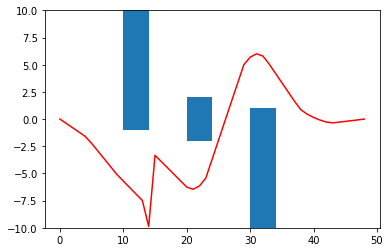

In [68]:
visualize(x).show()

In [69]:
print(f1)
print(f2)
print(f3)

[1.9538908379420283, 6.347046053599905, 1.1779104530789188]
[1.9612719971215782, 6.356528855334018, 1.1788081532055616]
[5.744333604959863, 226.51557279608184, 24.1752263501014]


In [70]:
# Print payoff table
print("Payoff table")
for i in range(3):
    print([values[j][i] for j in range(3)])

Payoff table
[1.9538705667378038, 1.9538705310550135, 139.34916157656357]
[6.346621984647167, 6.346619459285959, 70463.26929265796]
[1.1777788014157207, 1.1777777820870714, 130.72155894954554]


**What is happening here?**
* The third objective (maximal course changes) is not differentiable due to absolute values
  * *Can not be optimized with a solver that uses gradient information!*
* The first and second objective (time and wind drag) do not seem to be in conflict
  * Optimizing one optimizes also the other one